Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!
  
  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github


# CoronaVirus Prediction

### Number of Day to Predict 21

In [1]:
%autosave 360

Autosaving every 360 seconds


In [2]:
num_days_R_prediction=21
num_BackTrack_Days=2

In [3]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [4]:
%%R
max_days_prediction<-num_days_R_prediction

In [5]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=12 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=50
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
## DROP_N=175 => 15/07
#
drop_n_dataset_days=235
#

### Load Data from Github - John Hopkins Institute 

In [6]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [7]:
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
249                                           NaN             Timor-Leste   
250                                           NaN                    Togo   
251                                           NaN     Trinidad and Tobago   
252                                           NaN                 Tunisia   
253                                           NaN                  Turkey   
254                                           NaN           United States   
255                                           NaN                  Uganda   
256                                           NaN                 Ukraine   
257                                           NaN    United Arab Emirates   
258                                      Anguilla          United Kingdom   
259                                       Bermuda          United Kingdom   
260                        British Virgin Islands          United Kingdom   
261                                Cayman Islands          United Kingdom   
262                               Channel Islands          United Kingdom   
263                   Falkland Islands (Malvinas)          United Kingdom   
264                                     Gibraltar          United Kingdom   
265                                   Isle of Man          United Kingdom   
266                                    Montserrat          United Kingdom   
267  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
268                      Turks and Caicos Islands          United Kingdom   
269                            

## Get Population

In [8]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [9]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
255                                           NaN             Timor-Leste   
256                                           NaN                    Togo   
257                                           NaN     Trinidad and Tobago   
258                                           NaN                 Tunisia   
259                                           NaN                  Turkey   
260                                           NaN           United States   
261                                           NaN                  Uganda   
262                                           NaN                 Ukraine   
263                                           NaN    United Arab Emirates   
264                                      Anguilla          United Kingdom   
265                                       Bermuda          United Kingdom   
266                        British Virgin Islands          United Kingdom   
267                                Cayman Islands          United Kingdom   
268                               Channel Islands          United Kingdom   
269                   Falkland Islands (Malvinas)          United Kingdom   
270                                     Gibraltar          United Kingdom   
271                                   Isle of Man          United Kingdom   
272                                    Montserrat          United Kingdom   
273  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
274                      Turks and Caicos Islands          United Kingdom   
275                            

In [10]:
# merge region death
death.iloc[185:195,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN             Malta  35.937500   14.375400        0        0   
186            NaN  Marshall Islands   7.131500  171.184500        0        0   
187            NaN        Mauritania  21.007900  -10.940800        0        0   
188            NaN         Mauritius -20.348404   57.552152        0        0   
189            NaN            Mexico  23.634500 -102.552800        0        0   
190            NaN        Micronesia   7.425600  150.550800        0        0   
191            NaN           Moldova  47.411600   28.369900        0        0   
192            NaN            Monaco  43.733300    7.416700        0        0   
193            NaN          Mongolia  46.862500  103.846700        0        0   
194            NaN        Montenegro  42.708678   19.374390        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  10/10/21  10/11/21  10/12/21  \
185        0        0        0        0  ...       459       459       459   
186        0        0        0        0  ...         0         0         0   
187        0        0        0        0  ...       785       785       785   
188        0        0        0        0  ...       106       110       115   
189        0        0        0        0  ...    282086    282227    282773   
190        0        0        0        0  ...         0         0         0   
191        0        0        0        0  ...      7024      7048      7076   
192        0        0        0        0  ...        35        35        35   
193        0        0        0        0  ...      1450      1450      1482   
194        0        0        0        0  ...      1986      1992      2000   

     10/13/21  10/14/21  10/15/21  10/16/21  10/17/21   Population   \
185       459       459       459       459       459       441,543   
186         0         0         0         0         0           NaN   
187       785       786       787       788       788     4,649,658   
188       123       123       129       129       129     1,273,985   
189    283193    283574    284008    284321    284381   128,640,794   
190         0         0         0         0         0           NaN   
191      7105      7137      7172      7206      7241     4,035,942   
192        35        35        35        35        35        39,183   
193      1497      1497      1527      1527      1556     3,278,290   
194      2005      2010      2018      2020      2023       622 500   

                   region  
185             Malta_nan  
186  Marshall Islands_nan  
187        Mauritania_nan  
188         Mauritius_nan  
189            Mexico_nan  
190        Micronesia_nan  
191           Moldova_nan  
192            Monaco_nan  
193          Mongolia_nan  
194        Montenegro_nan  

[10 rows x 641 columns]

In [11]:
# merge region recover
recover.iloc[175:185,:]

Province/State Country/Region        Lat       Long  \
175                               NaN         Monaco  43.733300    7.41670   
176                               NaN       Mongolia  46.862500  103.84670   
177                               NaN     Montenegro  42.708678   19.37439   
178                               NaN        Morocco  31.791700   -7.09260   
179                               NaN     Mozambique -18.665700   35.52960   
180                               NaN        Namibia -22.957600   18.49040   
181                               NaN          Nepal  28.166700   84.25000   
182                             Aruba    Netherlands  12.521100  -69.96830   
183  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.23850   
184                           Curacao    Netherlands  12.169600  -68.99000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/10/21  \
175        0        0        0        0        0        0  ...         0   
176        0        0        0        0        0        0  ...         0   
177        0        0        0        0        0        0  ...         0   
178        0        0        0        0        0        0  ...         0   
179        0        0        0        0        0        0  ...         0   
180        0        0        0        0        0        0  ...         0   
181        0        0        0        0        0        0  ...         0   
182        0        0        0        0        0        0  ...         0   
183        0        0        0        0        0        0  ...         0   
184        0        0        0        0        0        0  ...         0   

     10/11/21  10/12/21  10/13/21  10/14/21  10/15/21  10/16/21  10/17/21  \
175         0         0         0         0         0         0         0   
176         0         0         0         0         0         0         0   
177         0         0         0         0         0         0         0   
178         0         0         0         0         0         0         0   
179         0         0         0         0         0         0         0   
180         0         0         0         0         0         0         0   
181         0         0         0         0         0         0         0   
182         0         0         0         0         0         0         0   
183         0         0         0         0         0         0         0   
184         0         0         0         0         0         0         0   

      Population                                         region  
175        39,183                                    Monaco_nan  
176     3,278,290                                  Mongolia_nan  
177       622 500                                Montenegro_nan  
178    36,817,128                                   Morocco_nan  
179    31,542,919                                Mozambique_nan  
180     2,540,905                                   Namibia_nan  
181    29,300,000                                     Nepal_nan  
182       116,600                             Netherlands_Aruba  
183        26,000  Netherlands_Bonaire, Sint Eustatius and Saba  
184       158,665                           Netherlands_Curacao  

[10 rows x 641 columns]

In [12]:
confirmed.iloc[185:195,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN             Malta  35.937500   14.375400        0        0   
186            NaN  Marshall Islands   7.131500  171.184500        0        0   
187            NaN        Mauritania  21.007900  -10.940800        0        0   
188            NaN         Mauritius -20.348404   57.552152        0        0   
189            NaN            Mexico  23.634500 -102.552800        0        0   
190            NaN        Micronesia   7.425600  150.550800        0        0   
191            NaN           Moldova  47.411600   28.369900        0        0   
192            NaN            Monaco  43.733300    7.416700        0        0   
193            NaN          Mongolia  46.862500  103.846700        0        0   
194            NaN        Montenegro  42.708678   19.374390        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  10/10/21  10/11/21  10/12/21  \
185        0        0        0        0  ...     37347     37358     37375   
186        0        0        0        0  ...         4         4         4   
187        0        0        0        0  ...     36414     36432     36465   
188        0        0        0        0  ...     16189     16291     16437   
189        0        0        0        0  ...   3723235   3725242   3732429   
190        0        0        0        0  ...         1         1         1   
191        0        0        0        0  ...    306647    307182    308724   
192        0        0        0        0  ...      3335      3336      3337   
193        0        0        0        0  ...    326738    326738    330869   
194        0        0        0        0  ...    135298    135533    135981   

     10/13/21  10/14/21  10/15/21  10/16/21  10/17/21   Population   \
185     37393     37412     37437     37445     37453       441,543   
186         4         4         4         4         4           NaN   
187     36509     36550     36591     36645     36677     4,649,658   
188     16472     16472     16621     16621     16621     1,273,985   
189   3738749   3744574   3749860   3755063   3757056   128,640,794   
190         1         1         1         1         1           NaN   
191    310776    312442    313849    315414    316529     4,035,942   
192      3337      3354      3357      3358      3358        39,183   
193    332789    332789    336508    336508    339536     3,278,290   
194    136322    136681    137046    137401    137769       622 500   

                   region  
185             Malta_nan  
186  Marshall Islands_nan  
187        Mauritania_nan  
188         Mauritius_nan  
189            Mexico_nan  
190        Micronesia_nan  
191           Moldova_nan  
192            Monaco_nan  
193          Mongolia_nan  
194        Montenegro_nan  

[10 rows x 641 columns]

In [13]:
confirmed.iloc[220:230,:]

Province/State                    Country/Region        Lat        Long  \
220            NaN                          Portugal  39.399900   -8.224500   
221            NaN                             Qatar  25.354800   51.183900   
222            NaN                           Romania  45.943200   24.966800   
223            NaN                            Russia  61.524010  105.318756   
224            NaN                            Rwanda  -1.940300   29.873900   
225            NaN             Saint Kitts and Nevis  17.357822  -62.782998   
226            NaN                       Saint Lucia  13.909400  -60.978900   
227            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
228            NaN                             Samoa -13.759000 -172.104600   
229            NaN                        San Marino  43.942400   12.457800   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/10/21  \
220        0        0        0        0        0        0  ...   1075312   
221        0        0        0        0        0        0  ...    237424   
222        0        0        0        0        0        0  ...   1356640   
223        0        0        0        0        0        0  ...   7658923   
224        0        0        0        0        0        0  ...     98697   
225        0        0        0        0        0        0  ...      2361   
226        0        0        0        0        0        0  ...     11970   
227        0        0        0        0        0        0  ...      4096   
228        0        0        0        0        0        0  ...         3   
229        0        0        0        0        0        0  ...      5466   

     10/11/21  10/12/21  10/13/21  10/14/21  10/15/21  10/16/21  10/17/21  \
220   1075639   1076358   1077186   1077963   1078729   1079341   1079806   
221    237483    237579    237662    237741    237798    237867    237929   
222   1365788   1382531   1398264   1414647   1430475   1445714   1457260   
223   7687559   7714973   7742899   7773388   7804750   7837101   7870529   
224     98745     98840     98926     98987     99067     99128     99145   
225      2412      2435      2466      2511      2525      2546      2550   
226     12017     12054     12095     12129     12129     12206     12228   
227      4096      4096      4096      4096      4096      4418      4623   
228         3         3         3         3         3         3         3   
229      5470      5470      5470      5470      5473      5473      5473   

      Population                                 region  
220    10,290,000                          Portugal_nan  
221     2,870,256                             Qatar_nan  
222    19,530,000                           Romania_nan  
223   144,500,000                            Russia_nan  
224    12,952,218                            Rwanda_nan  
225        53,673             Saint Kitts and Nevis_nan  
226       184,106                       Saint Lucia_nan  
227       110,940  Saint Vincent and the Grenadines_nan  
228           NaN                             Samoa_nan  
229        33,916                        San Marino_nan  

[10 rows x 641 columns]

## Create Time Series + Plots

In [14]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [16]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

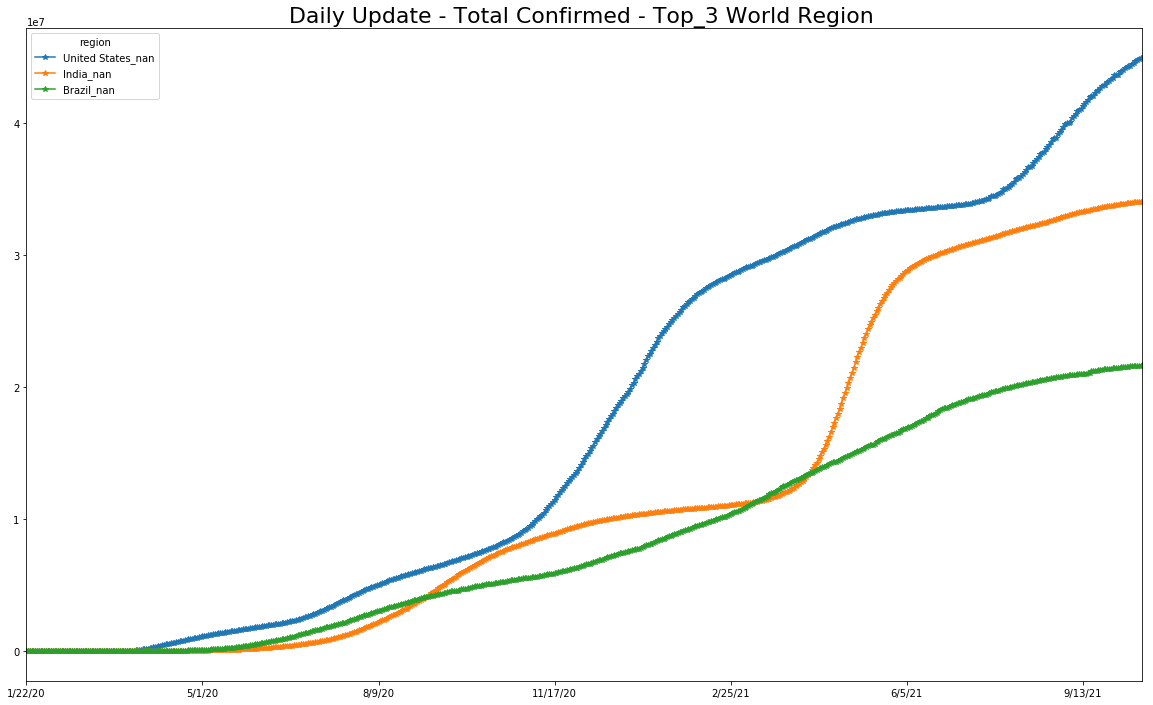

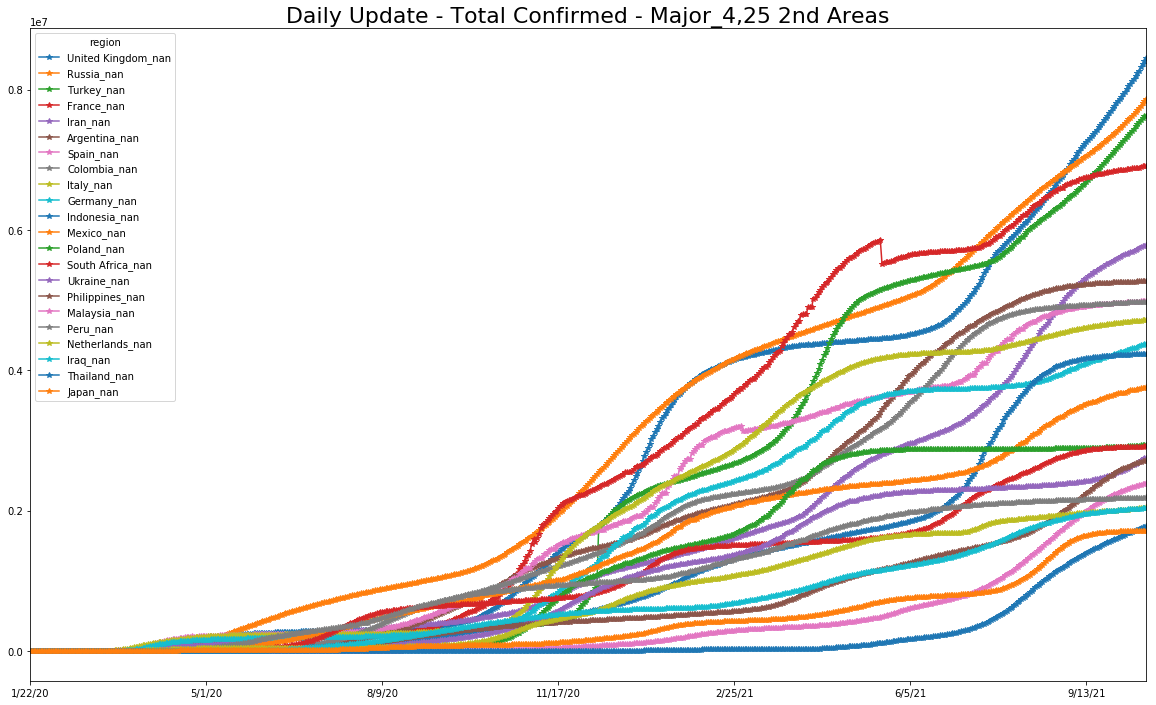

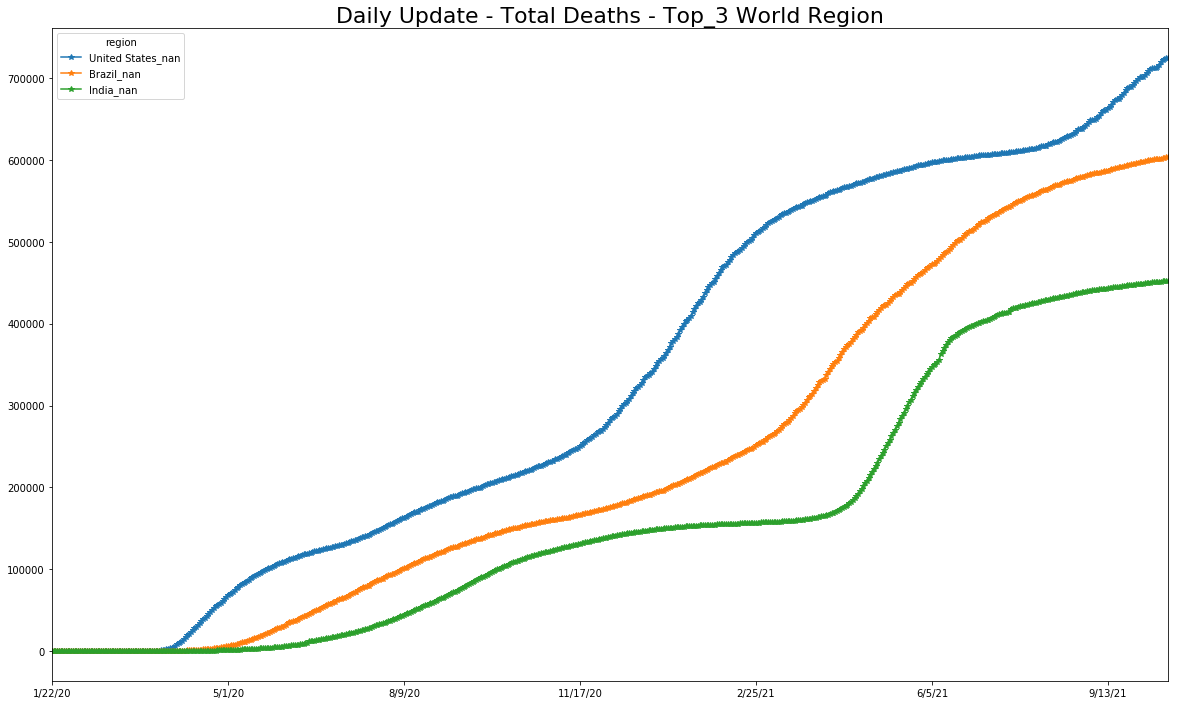

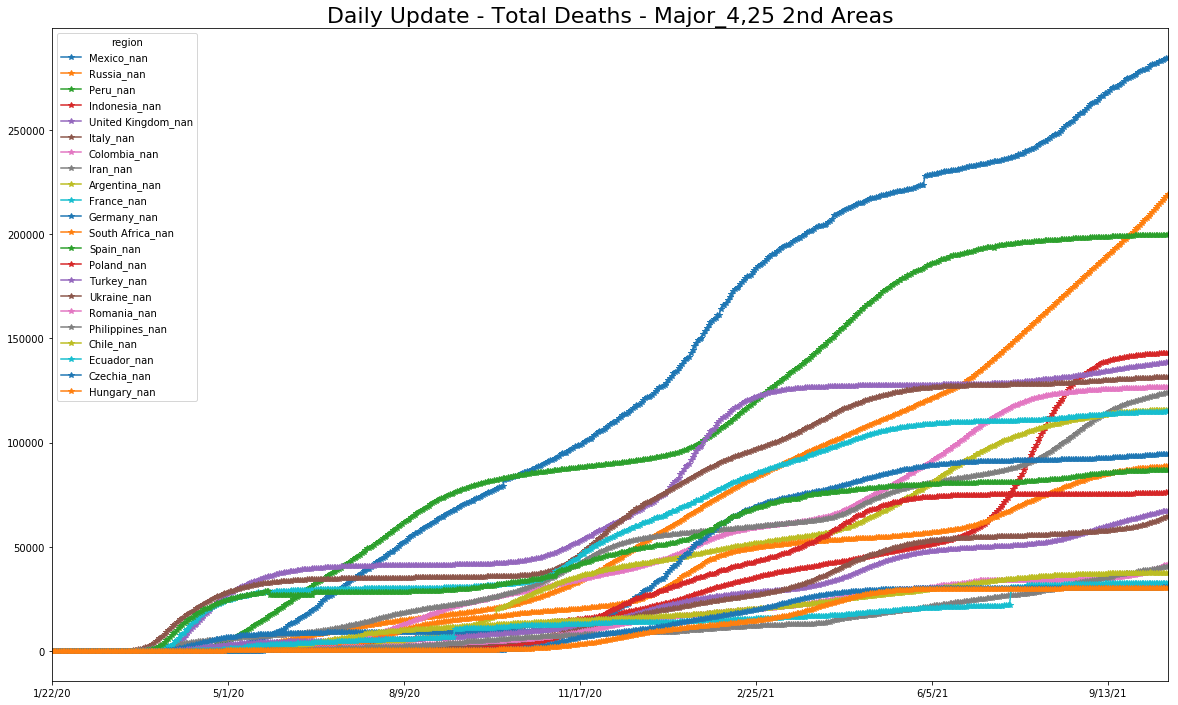

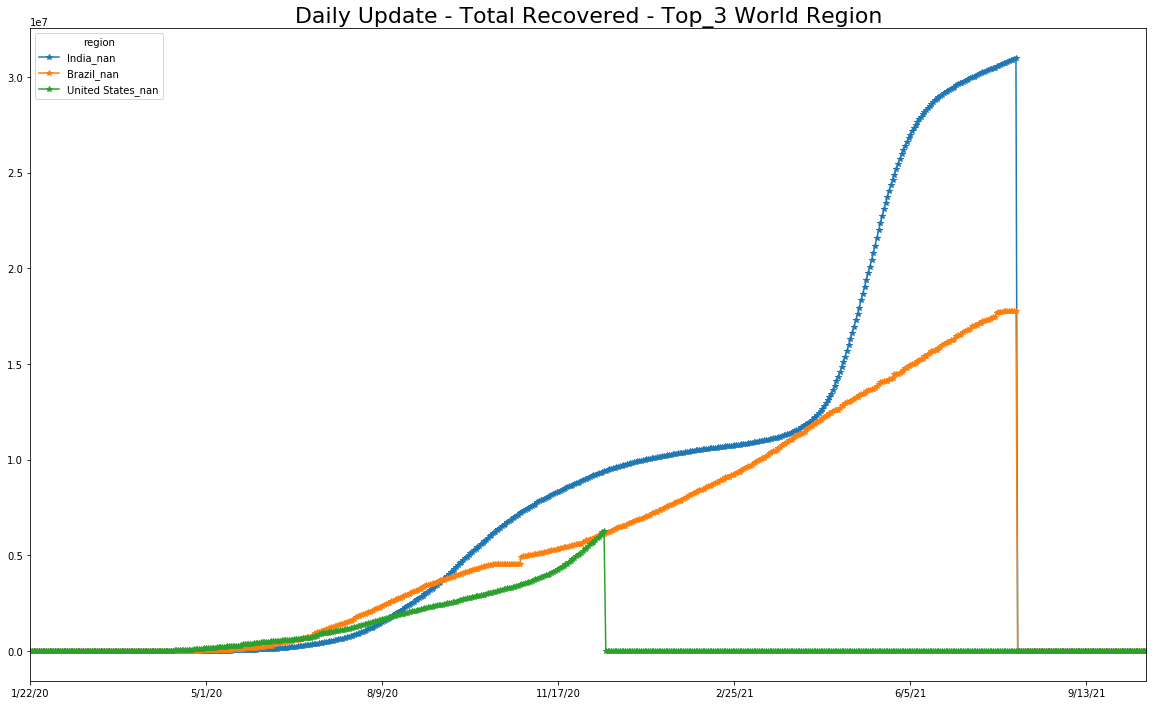

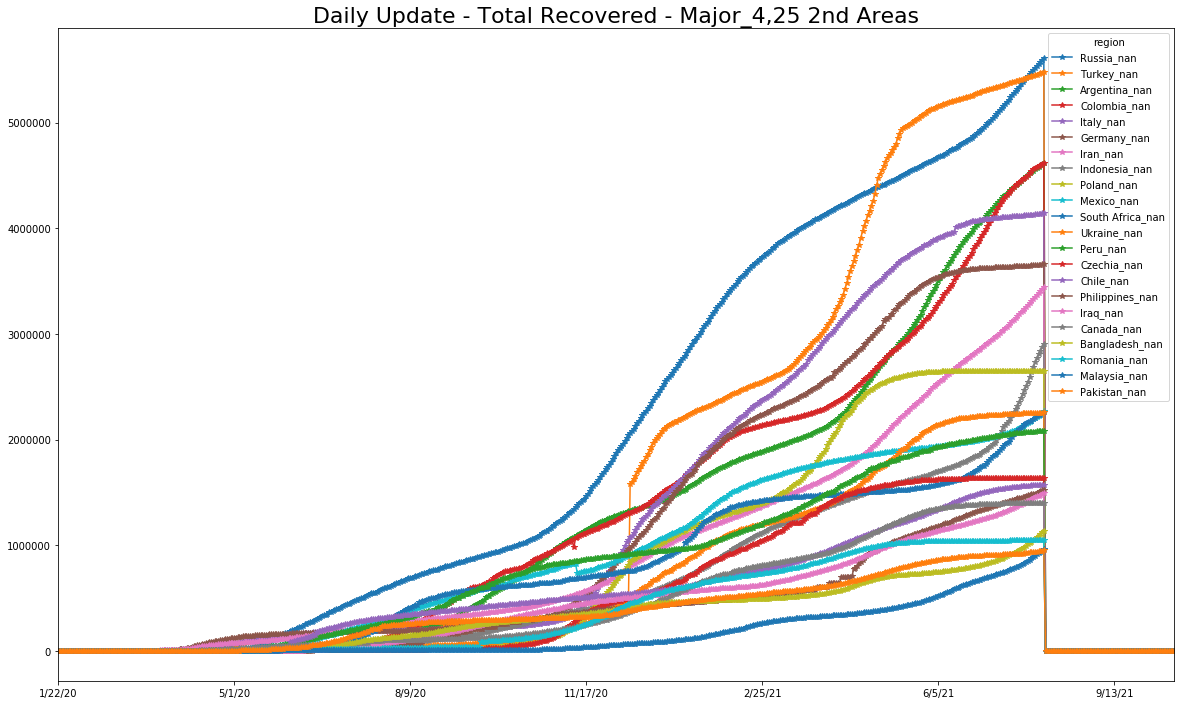

In [17]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [18]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime

#
api_key="29d9e51c56b94621b16297bcdeee9c4d" # hxj@mail.xcom
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [19]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [20]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2021/10/18


In [21]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [22]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [23]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [24]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
9/13/20            38802        11353        48254         1344        3388   
9/14/20            38858        11520        48496         1438        3439   
9/15/20            38901        11672        48734         1438        3569   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
9/13/20                       95         555537        45862   
9/14/20                       95         565446        45969   
9/15/20                       95         577338        46119   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
9/13/20                                     113                       4170   
9/14/20                                     113                       4177   
9/15/20                                     113                       4185   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
9/13/20  ...            6522112         1808           47287            0   
9/14/20  ...            6555360         1812           47836            0   
9/15/20  ...            6594822         1827           48429            0   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
9/13/20          60540         1063                   30574       2011   
9/14/20          61569         1063                   31362       2013   
9/15/20          62655         1063                   32250       2016   

region   Zambia_nan  Zimbabwe_nan  
9/13/20       13539          7526  
9/14/20       13720          7531  
9/15/20       13819          7576  

[3 rows x 279 columns]

In [25]:
ts[-4:]

region    Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
10/14/21           155682       176667       205005        15326       62385   
10/15/21           155688       177108       205106        15338       62606   
10/16/21           155739       177536       205199        15338       62789   
10/17/21           155764       177971       205286        15338       62842   

region    Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
10/14/21                     3830        5270003       276666   
10/15/21                     3858        5271361       278431   
10/16/21                     3888        5272151       280294   
10/17/21                     3888        5272551       281991   

region    Australia_Australian Capital Territory  Australia_New South Wales  \
10/14/21                                    1518                      70781   
10/15/21                                    1538                      71099   
10/16/21                                    1571                      71399   
10/17/21                                    1588                      71658   

region    ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
10/14/21  ...           44767906       390575          179711            4   
10/15/21  ...           44884598       390762          180162            4   
10/16/21  ...           44916423       390915          180566            4   
10/17/21  ...           44933336       391044          180958            4   

region    Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
10/14/21         388743       853842                  446294       9467   
10/15/21         390045       857639                  447032       9495   
10/16/21         390045       860860                  447032       9512   
10/17/21         392762       864053                  447032       9526   

region    Zambia_nan  Zimbabwe_nan  
10/14/21      209431        132251  
10/15/21      209477        132285  
10/16/21      209505        132333  
10/17/21      209521        132368  

[4 rows x 279 columns]

In [26]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [27]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [28]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [29]:
p=%R pred_all

In [30]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [31]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [32]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [33]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [34]:
w_in_model.tail(2)

date       region   min   max
8379 2020-05-10  Vietnam_nan  26.9  33.0
8380 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1      2020-09-14  Afghanistan_nan      38858             0             0   
2      2020-09-15  Afghanistan_nan      38901            56             0   
3      2020-09-16  Afghanistan_nan      38941            43             0   
4      2020-09-17  Afghanistan_nan      38958            40           139   
5      2020-09-18  Afghanistan_nan      38969            17           100   
6      2020-09-19  Afghanistan_nan      39005            11            68   
7      2020-09-20  Afghanistan_nan      39130            36            64   
8      2020-09-21  Afghanistan_nan      39160           125           172   
9      2020-09-22  Afghanistan_nan      39182            30           191   
10     2020-09-23  Afghanistan_nan      39231            22           177   
11     2020-09-24  Afghanistan_nan      39256            49           101   
12     2020-09-25  Afghanistan_nan      39272            25            96   
13     2020-09-26  Afghanistan_nan      39278            16            90   
14     2020-09-27  Afghanistan_nan      39313             6            47   
15     2020-09-28  Afghanistan_nan      39325            35            57   
16     2020-09-29  Afghanistan_nan      39340            12            53   
17     2020-09-30  Afghanistan_nan      39354            15            62   
18     2020-10-01  Afghanistan_nan      39371            14            41   
19     2020-10-02  Afghanistan_nan      39376            17            46   
20     2020-10-03  Afghanistan_nan      39383             5            36   
21     2020-10-04  Afghanistan_nan      39427             7            29   
22     2020-10-05  Afghanistan_nan      39508            44            56   
23     2020-10-06  Afghanistan_nan      39572            81           132   
24     2020-10-07  Afghanistan_nan      39634            64           189   
25     2020-10-08  Afghanistan_nan      39702            62           207   
26     2020-10-09  Afghanistan_nan      39779            68           194   
27     2020-10-10  Afghanistan_nan      39789            77           207   
28     2020-10-11  Afghanistan_nan      39885            10           155   
29     2020-10-12  Afghanistan_nan      39956            96           183   
30     2020-10-13  Afghanistan_nan      40014            71           177   
...           ...              ...        ...           ...           ...   
114255 2021-09-19     Zimbabwe_nan     127938           107           656   
114256 2021-09-20     Zimbabwe_nan     128186           199           570   
114257 2021-09-21     Zimbabwe_nan     128186           248           554   
114258 2021-09-22     Zimbabwe_nan     128804             0           447   
114259 2021-09-23     Zimbabwe_nan     129134           618           866   
114260 2021-09-24     Zimbabwe_nan     129134           330           948   
114261 2021-09-25     Zimbabwe_nan     129505             0           948   
114262 2021-09-26     Zimbabwe_nan     129625           371           701   
114263 2021-09-27     Zimbabwe_nan     129919           120           491   
114264 2021-09-28     Zimbabwe_nan     130272           294           785   
114265 2021-09-29     Zimbabwe_nan     130485           353           767   
114266 2021-09-30     Zimbabwe_nan     130820           213           860   
114267 2021-10-01     Zimbabwe_nan     131028           335           901   
114268 2021-10-02     Zimbabwe_nan     131094           208           756   
114269 2021-10-03     Zimbabwe_nan     131129            66           609   
114270 2021-10-04     Zimbabwe_nan     131129            35           309   
114271 2021-10-05     Zimbabwe_nan     131205             0           101   
114272 2021-10-06     Zimbabwe_nan     131434            76           111   
114273 2021-10-07     Zimbabwe_nan     131523           229           305   
114274 2021-10-08     Zimbabwe_nan     131705            89           394   
114275 20

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
114284 2021-10-18  Zimbabwe_nan          0            35           117   

        7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
114284           572         100.026456         100.088476         100.434012   

        last_day  kalman_prediction  population  infected_rate  min  max  
114284    132368           132487.0    14862924       0.000089  NaN  NaN

In [40]:
## JOAO - FIX Drop Duplicates
train=train.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
## JOAO - FIX Drop empty region='nan_nan'
train=train[train['region']!='nan_nan']
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
114284 2021-10-18  Zimbabwe_nan          0            35           117   

        7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
114284           572         100.026456         100.088476         100.434012   

        last_day  kalman_prediction  population  infected_rate  min  max  
114284    132368           132487.0    14862924       0.000089  NaN  NaN

In [41]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
### Assumption : Each affected person can contact up to 9 others that not report or are assimptomatic COVID19 cases.
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=np.clip(ratiod['infected_rate']*900,0.0,1.0)
#
ratiod['delta : pred new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : pred new_cases per 1M hab']=ratiod['delta : pred new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
111876  2021-10-16  Zimbabwe_nan     132333            34           269   
111877  2021-10-17  Zimbabwe_nan     132368            48           225   
111878  2021-10-18  Zimbabwe_nan          0            35           117   

        7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
111876           580         100.025716         100.203771         100.440386   
111877           571         100.036293         100.170323         100.433365   
111878           572         100.026456         100.088476         100.434012   

        confirmed_yesterday  ...  population  infected_rate  min  max  \
111876               132285  ...    14862924       0.000089  NaN  NaN   
111877               132333  ...    14862924       0.000089  NaN  NaN   
111878               132368  ...    14862924       0.000089  NaN  NaN   

        population_percentage : infected_rate confirmed  \
111876                                         0.008900   
111877                                         0.008904   
111878                                         0.008906   

        population_percentage : factor 9/10 infected_rate confirmed  \
111876                                           0.080104             
111877                                           0.080133             
111878                                           0.080154             

        delta : pred new_cases  delta : pred new_cases per 1M hab  \
111876                   115.0                           7.737374   
111877                   121.0                           8.141063   
111878                   119.0                           8.006500   

        delta : roling 7day AVG  \
111876                82.857143   
111877                81.571429   
111878                81.714286   

        delta : aprox 14-day case notification rate per 100k hab  
111876                                           7.804655         
111877                                           7.683549         
111878                                           7.697005         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse         mae
269  United States_nan  5.080506e+12  2.253998e+06  142835.855


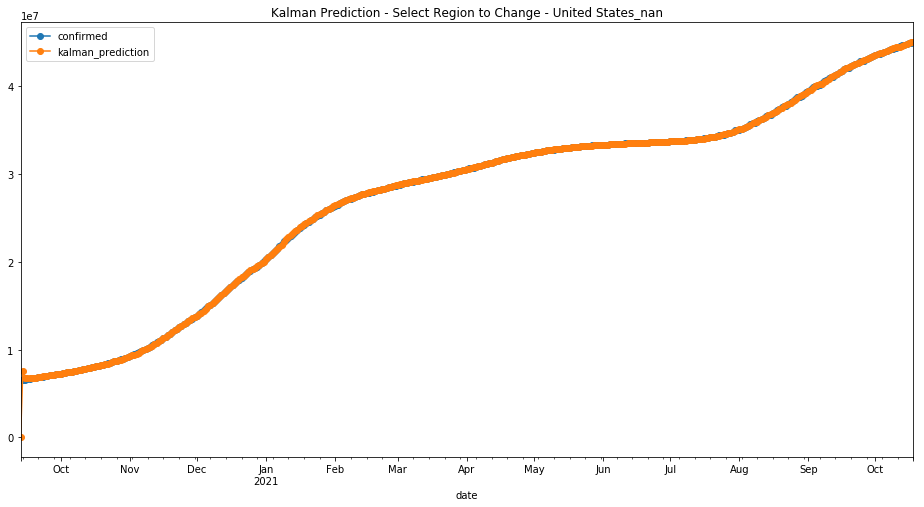

In [42]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse         mae
217  Russia_nan  1.560193e+11  394992.84425  21838.0875


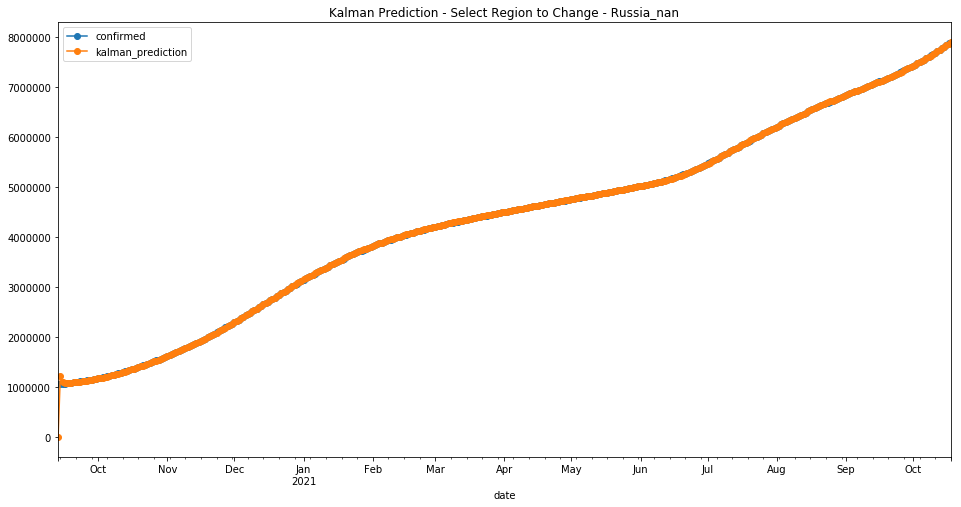

In [43]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse       mae
30  Brazil_nan  1.174315e+12  1.083658e+06  75095.11


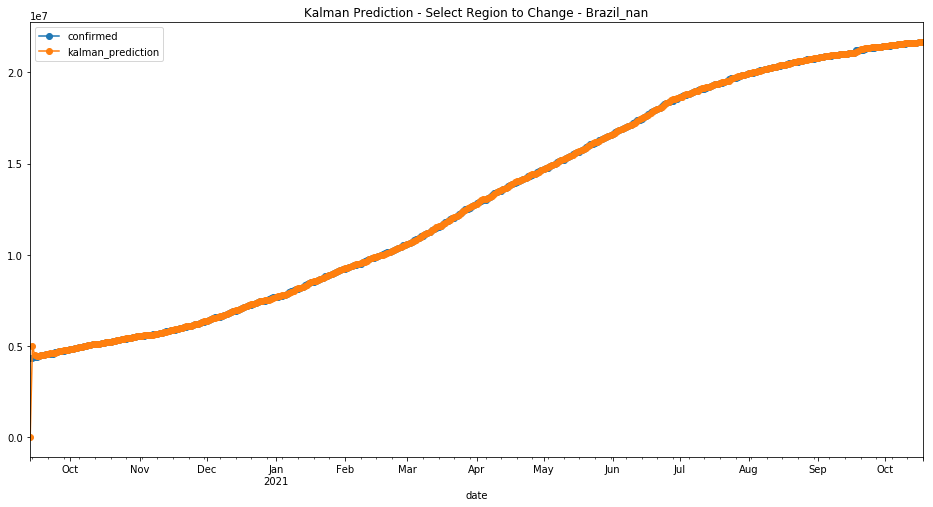

In [44]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse           rmse         mae
268  United Kingdom_nan  1.802022e+11  424502.259518  26173.2525


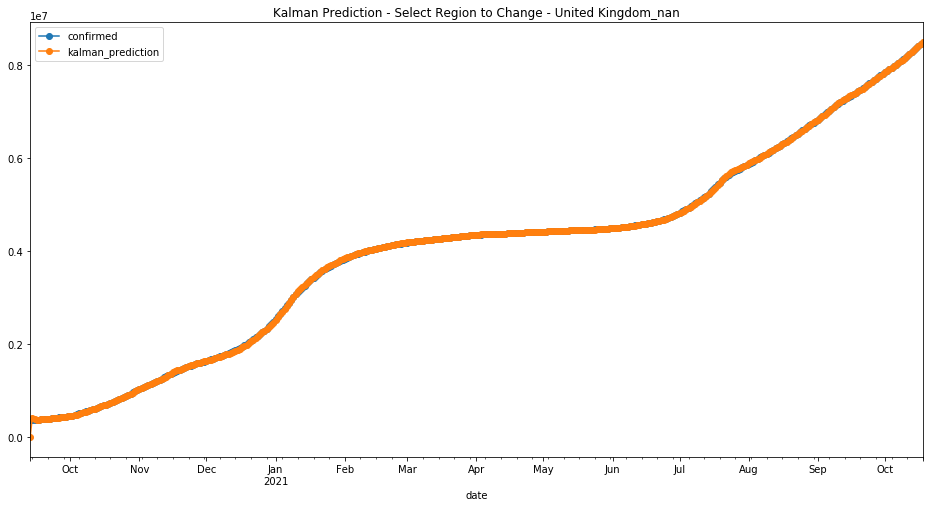

In [45]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [46]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbihr30rc
  JVM stdout: /tmp/tmpbihr30rc/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbihr30rc/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    2 years, 11 months and 21 days !!!
H2O cluster name:           H2O_from_python_unknownUser_b2wntu
H2O cluster total nodes:    1
H2O cluster free memory:    3.541 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.7 final
--------------------------  ----------------------------------------

In [47]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2021-10-06
last_train_date= 2021-10-17
first_bootstrap_date= 2021-10-09
boost_bootstrap_date= 2021-10-14
first_test_date= 2021-10-08
last_test_date= 2021-10-18
first_valid_date= 2021-10-16


In [48]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [49]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [50]:
pred2.iloc[:25]

0  confirmed       date           region
0   155581.0     155466 2021-10-09  Afghanistan_nan
1   155602.0     155508 2021-10-10  Afghanistan_nan
2   155642.0     155540 2021-10-11  Afghanistan_nan
3   155674.0     155599 2021-10-12  Afghanistan_nan
4   155733.0     155627 2021-10-13  Afghanistan_nan
5   155759.0     155682 2021-10-14  Afghanistan_nan
6   155821.0     155688 2021-10-15  Afghanistan_nan
7   155819.0     155739 2021-10-16  Afghanistan_nan
8   155877.0     155764 2021-10-17  Afghanistan_nan
9   155894.0          0 2021-10-18  Afghanistan_nan
10  174704.0     174643 2021-10-09      Albania_nan
11  175198.0     174968 2021-10-10      Albania_nan
12  175503.0     175163 2021-10-11      Albania_nan
13  175651.0     175664 2021-10-12      Albania_nan
14  176177.0     176172 2021-10-13      Albania_nan
15  176632.0     176667 2021-10-14      Albania_nan
16  177122.0     177108 2021-10-15      Albania_nan
17  177562.0     177536 2021-10-16      Albania_nan
18  178009.0     177971 2021-10-17      Albania_nan
19  178448.0          0 2021-10-18      Albania_nan
20  204612.0     204490 2021-10-09      Algeria_nan
21  204705.0     204597 2021-10-10      Algeria_nan
22  204808.0     204695 2021-10-11      Algeria_nan
23  204899.0     204790 2021-10-12      Algeria_nan
24  204990.0     204900 2021-10-13      Algeria_nan

In [51]:
pred2.iloc[175:195]

0  confirmed       date          region
175  496352.0     496780 2021-10-14  Azerbaijan_nan
176  497812.0     498630 2021-10-15  Azerbaijan_nan
177  499825.0     498630 2021-10-16  Azerbaijan_nan
178  499668.0     502207 2021-10-17  Azerbaijan_nan
179  503877.0          0 2021-10-18  Azerbaijan_nan
180   21717.0      21580 2021-10-09     Bahamas_nan
181   21725.0      21580 2021-10-10     Bahamas_nan
182   21719.0      21580 2021-10-11     Bahamas_nan
183   21713.0      21580 2021-10-12     Bahamas_nan
184   21694.0      21580 2021-10-13     Bahamas_nan
185   21685.0      21580 2021-10-14     Bahamas_nan
186   21672.0      21580 2021-10-15     Bahamas_nan
187   21664.0      21580 2021-10-16     Bahamas_nan
188   21656.0      21580 2021-10-17     Bahamas_nan
189   21651.0          0 2021-10-18     Bahamas_nan
190  275562.0     275597 2021-10-09     Bahrain_nan
191  275619.0     275654 2021-10-10     Bahrain_nan
192  275680.0     275734 2021-10-11     Bahrain_nan
193  275762.0     275803 2021-10-12     Bahrain_nan
194  275831.0     275862 2021-10-13     Bahrain_nan

In [52]:
pred2.iloc[220:240]

0  confirmed       date       region
220   555755.0     555793 2021-10-09  Belarus_nan
221   557762.0     557772 2021-10-10  Belarus_nan
222   559743.0     559715 2021-10-11  Belarus_nan
223   561684.0     561753 2021-10-12  Belarus_nan
224   563741.0     563813 2021-10-13  Belarus_nan
225   565800.0     565865 2021-10-14  Belarus_nan
226   567859.0     567938 2021-10-15  Belarus_nan
227   569949.0     570006 2021-10-16  Belarus_nan
228   572030.0     571987 2021-10-17  Belarus_nan
229   574015.0          0 2021-10-18  Belarus_nan
230  1263270.0    1261102 2021-10-09  Belgium_nan
231  1262960.0    1261102 2021-10-10  Belgium_nan
232  1262993.0    1266562 2021-10-11  Belgium_nan
233  1269082.0    1269002 2021-10-12  Belgium_nan
234  1270554.0    1272669 2021-10-13  Belgium_nan
235  1274901.0    1276221 2021-10-14  Belgium_nan
236  1278581.0    1279869 2021-10-15  Belgium_nan
237  1282633.0    1279869 2021-10-16  Belgium_nan
238  1282287.0    1279869 2021-10-17  Belgium_nan
239  1282484.0          0 2021-10-18  Belgium_nan

In [53]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  3214036713.9081087
# MSE on the validation data =  35795800412614.19
# R^2 on the training data =  0.999918643357197
# R^2 on the validation data =  0.4278159194448087


In [55]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1634536404383_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 3214036713.9081087
RMSE: 56692.47493193527
MAE: 6371.694494023657
RMSLE: 0.22160512238088426
Mean Residual Deviance: 3214036713.9081087

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 35795800412614.19
RMSE: 5982959.168556492
MAE: 1606678.7183777064
RMSLE: 7.947717080632107
Mean Residual Deviance: 35795800412614.19
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse    validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  -----------------  ------------------  ---------------------
     2021-10-18 05:53:32  0.092 sec   0.0                nan                 nan                 nan                  nan                nan                 nan
     2021-10-18 05:53:32  0.594 sec   1.0                132599.98640580062  23369.647030219297  17582756394.818512   6031852.630453723  1605823.974103498   36383246155511.49
     2021-10-18 05:53:33  0.850 sec   2.0                132546.3761531763   21676.447531622212  17568541831.339302   6014979.426689291  1605682.832890141   36179977503495.44
     2021-10-18 05:53:33  1.278 sec   3.0                174814.58920554258  23060.39019370442   30560140599.1026     6009573.034223645  1603689.16182821    36114968053667.984
     2021-10-18 05:53:33  1.396 sec   4.0                154198.11023618747  20468.053951914168  23777057200.411423   6015135.642277484  1603516.9854370668  36181856794996.96
---  ---                  ---         ---                ---                 ---                 ---                  ---                ---                 ---
     2021-10-18 05:53:56  24.394 sec  295.0              58509.67720133757   6707.167462136668   3423382326.2047215   5982270.780504712  1606932.678766335   35787563691280.45
     2021-10-18 05:54:00  28.401 sec  339.0              57788.449093440926  6583.747550490975   3339504848.625213    5987165.577171854  1606336.1548553074  35846151648471.58
     2021-10-18 05:54:04  32.439 sec  395.0              57174.49730220598   6496.448425409277   3268923141.7599587   5985339.289124364  1605663.95606369    35824286405935.74
     2021-10-18 05:54:08  36.499 sec  451.0              57136.385004314536  6445.37640531587    3264566491.361259    5984441.284276836  1607376.8887298487  35813537484956.98
     2021-10-18 05:54:12  40.052 sec  500.0              56692.47493193527   6371.694494023657   3214036713.9081087   5982959.168556492  1606678.7183777064  35795800412614.19


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
kalman_prediction  9.59332e+19            1                    0.361395
last_day           8.25555e+19            0.860552             0.310999
region             4.21437e+19            0.439302             0.158761
7_day_change       1.81046e+19            0.188721             0.0682029
3_day_change       9.65076e+18            0.100599             0.0363559
1_day_change       6.62154e+18            0.0690224            0.0249443
infected_rate      2.696e+18              0.0281029            0.0101562
max                2.37511e+18            0.024758             0.00894741
7_day_change_rate  1.89735e+18            0.0197778            0.00714758
min                1.84408e+18            0.0192225            0.00694692
3_day_change_rate  1.30681e+18            0.0136221            0.00492295
1_day_change_rate  3.24044e+17            0.00337781           0.00122072

In [56]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         9.593321e+19           1.000000    0.361395
1            last_day         8.255554e+19           0.860552    0.310999
2              region         4.214365e+19           0.439302    0.158761
3        7_day_change         1.810463e+19           0.188721    0.068203
4        3_day_change         9.650763e+18           0.100599    0.036356
5        1_day_change         6.621538e+18           0.069022    0.024944
6       infected_rate         2.696002e+18           0.028103    0.010156
7                 max         2.375113e+18           0.024758    0.008947
8   7_day_change_rate         1.897345e+18           0.019778    0.007148
9                 min         1.844078e+18           0.019223    0.006947
10  3_day_change_rate         1.306810e+18           0.013622    0.004923
11  1_day_change_rate         3.240443e+17           0.003378    0.001221

In [57]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


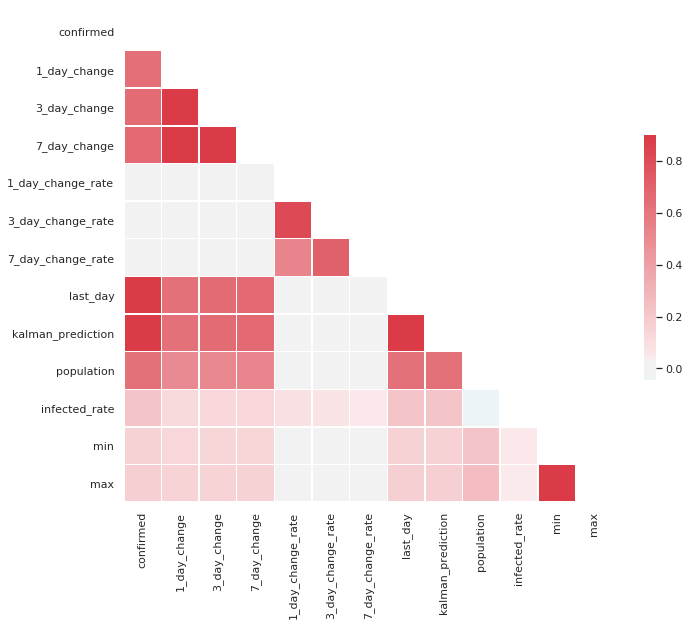

In [58]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [59]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.631057
3_day_change         0.659050
7_day_change         0.673379
1_day_change_rate    0.025722
3_day_change_rate    0.019649
7_day_change_rate    0.010006
last_day             0.996698
kalman_prediction    0.996778
population           0.624433
infected_rate        0.218418
min                  0.156999
max                  0.176878
Name: confirmed, dtype: float64


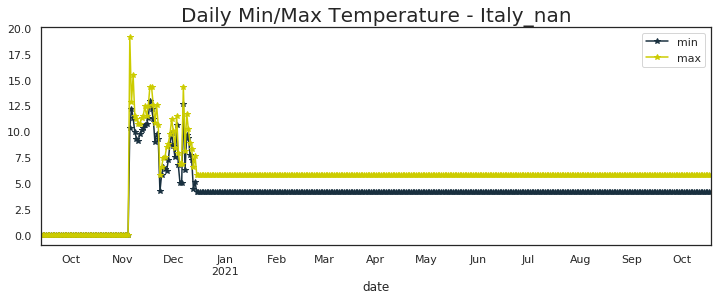

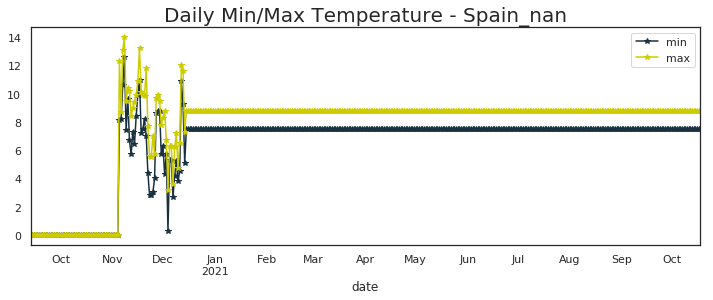

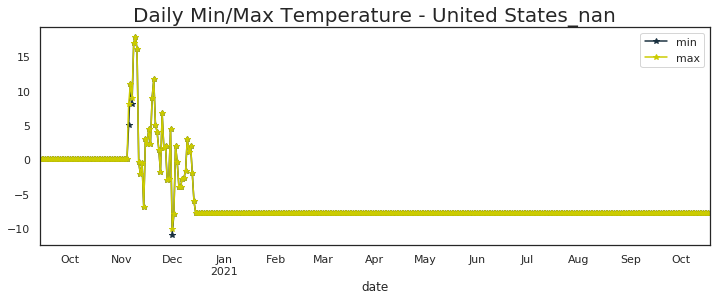

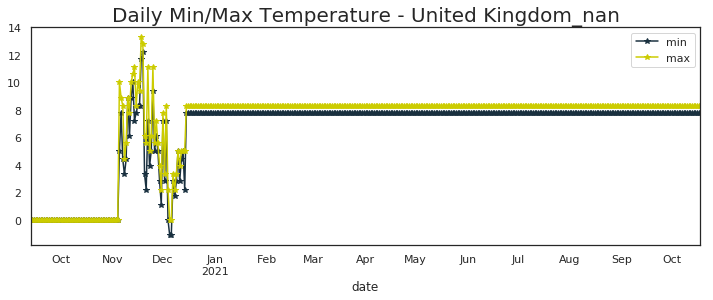

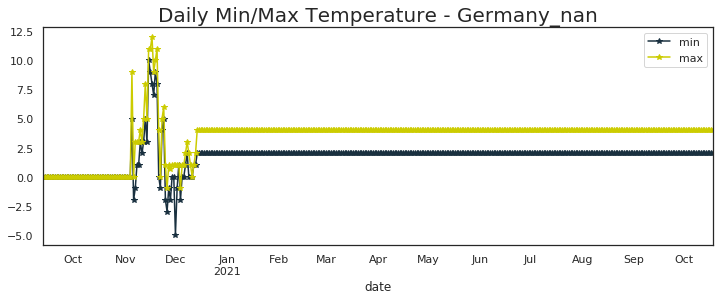

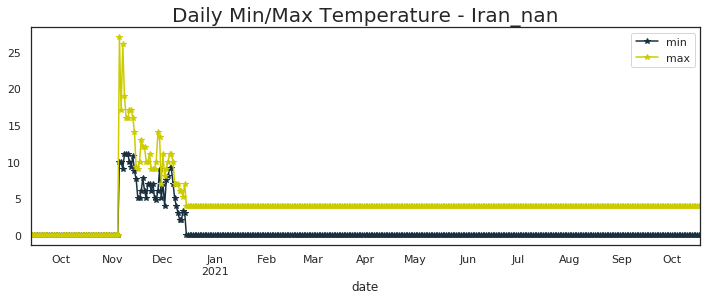

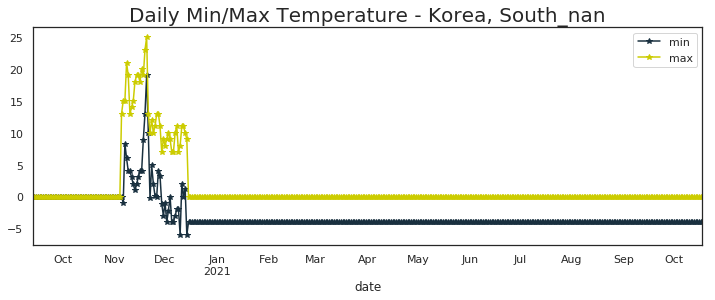

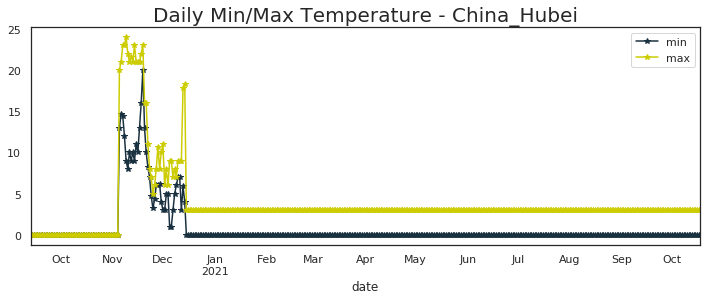

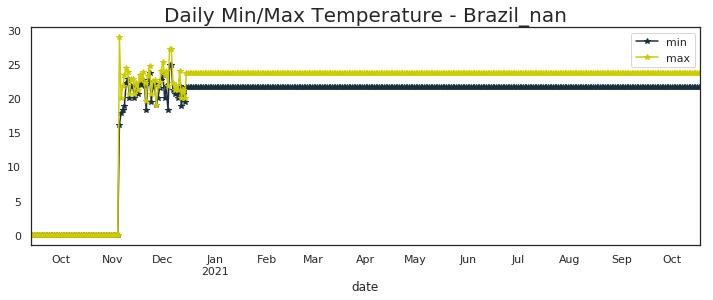

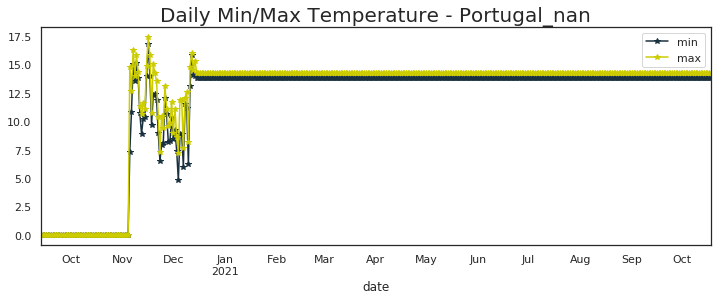

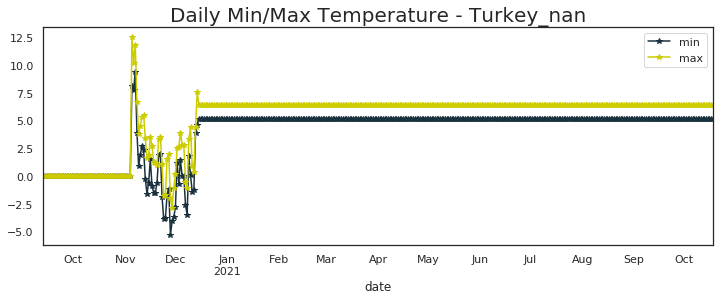

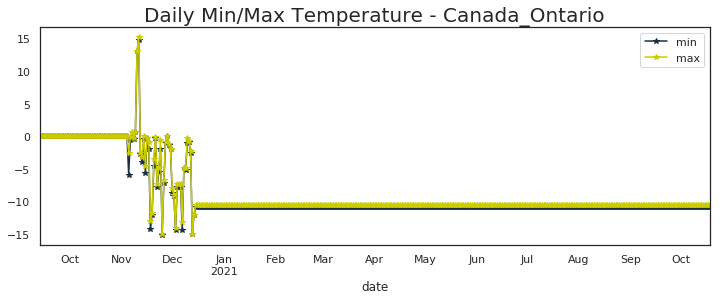

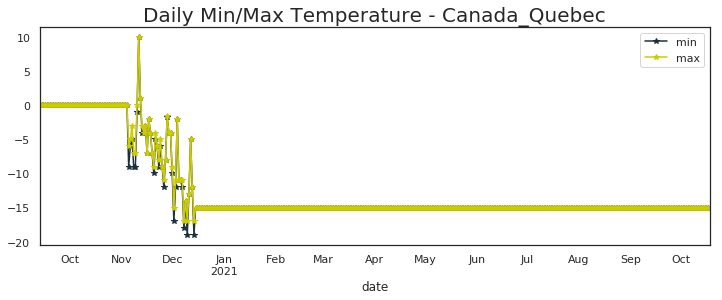

In [60]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [61]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.8  17.8
India_nan                   22.0  31.0
Brazil_nan                  24.8  28.9
United Kingdom_nan          12.2  13.3
Russia_nan                   0.0   4.0
Turkey_nan                   9.4  12.5
France_nan                  12.1  13.3
Iran_nan                    11.0  27.0
Argentina_nan                0.0   0.0
Spain_nan                   12.6  14.0
Colombia_nan                 0.0   0.0
Italy_nan                   12.9  19.1
Germany_nan                 10.0  12.0
Indonesia_nan                0.0   0.0
Mexico_nan                  15.1  15.1
Poland_nan                   8.9  10.6
South Africa_nan             0.0   0.0
Ukraine_nan                  0.0   0.0
Philippines_nan             26.1  31.1
Malaysia_nan                25.0  33.0
Peru_nan                    24.6  29.9
Netherlands_nan             14.4  16.1
Iraq_nan                    

### Kalman X Days Ahead Prediction

In [62]:
%%R

#install.packages('reshape')

NULL


In [63]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [64]:
all_new=%R all_new

In [65]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

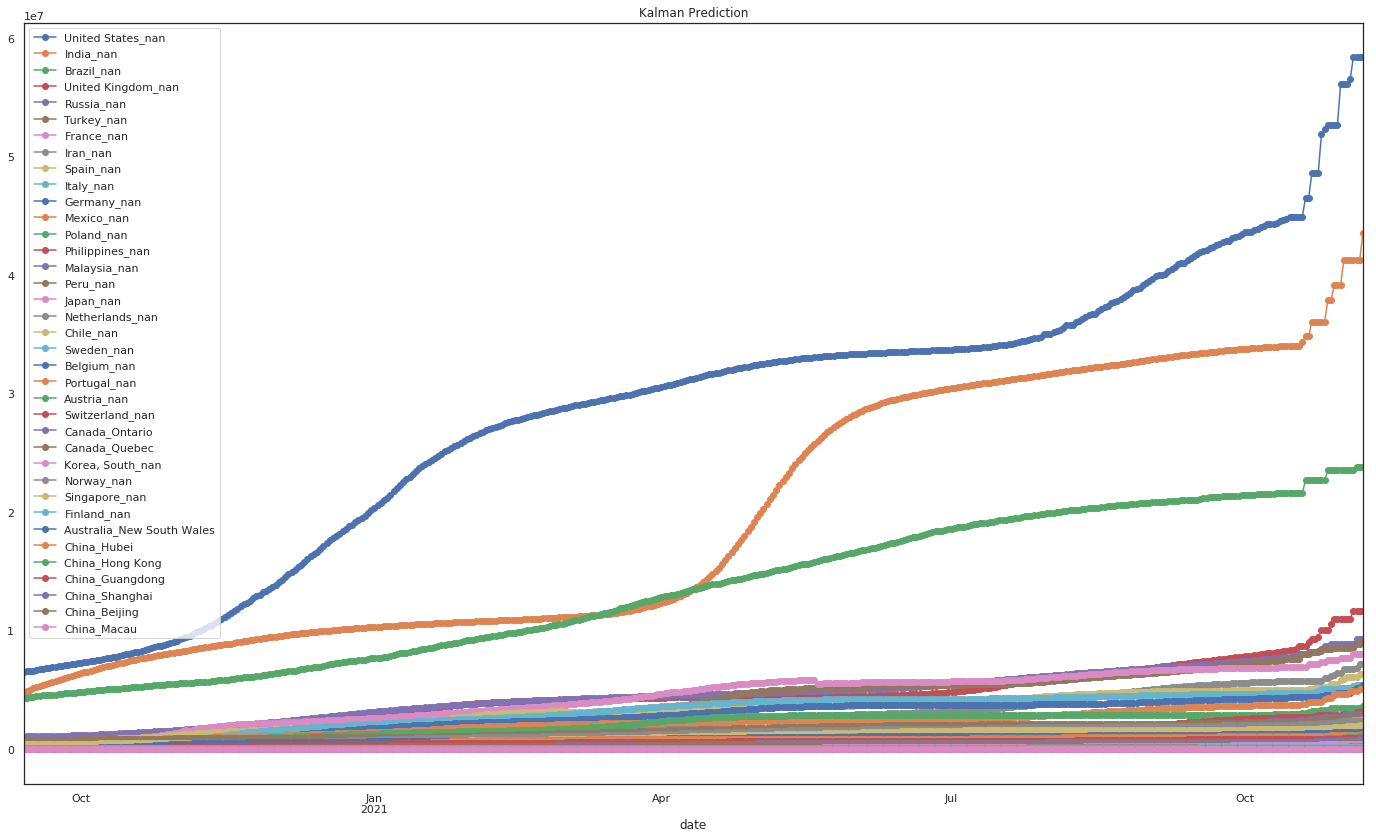

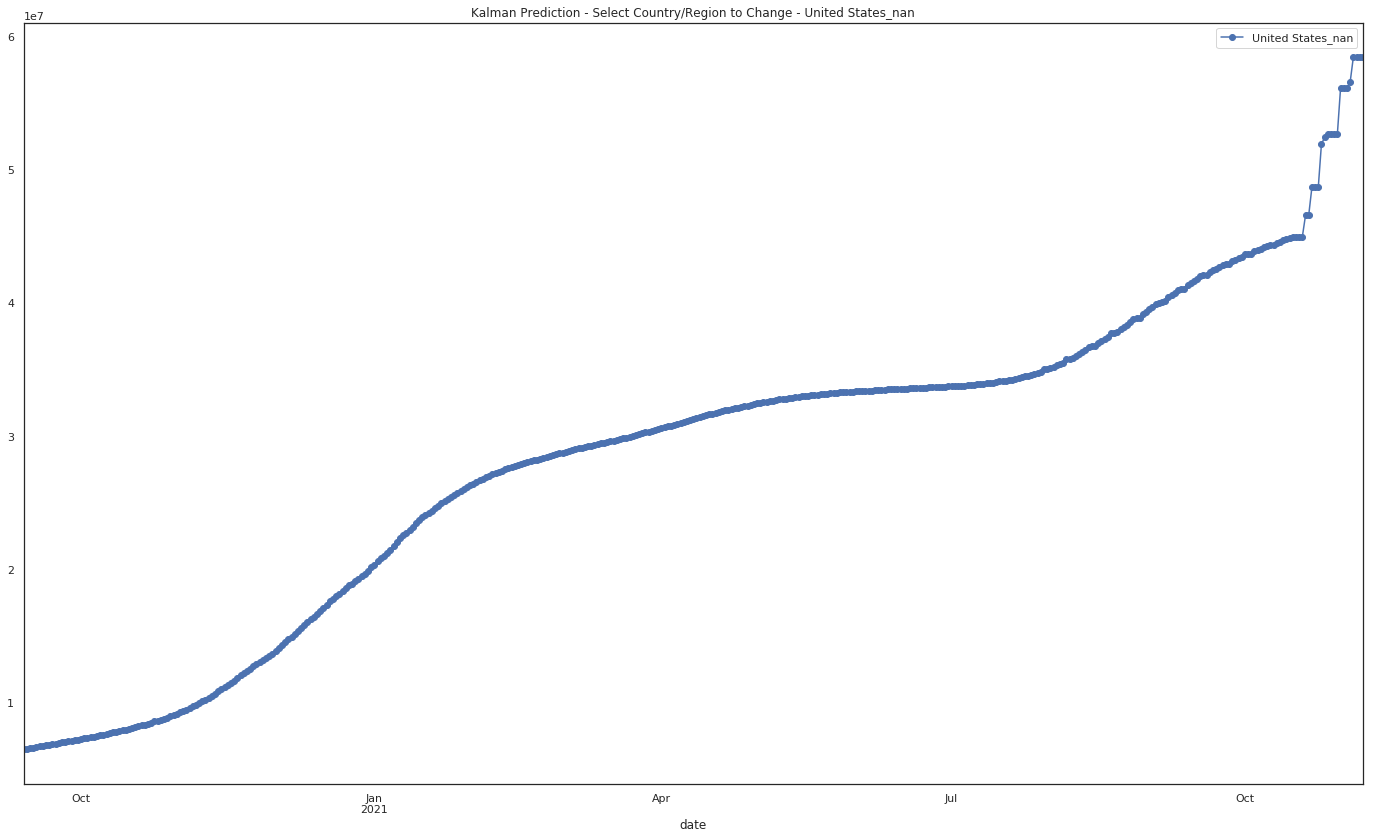

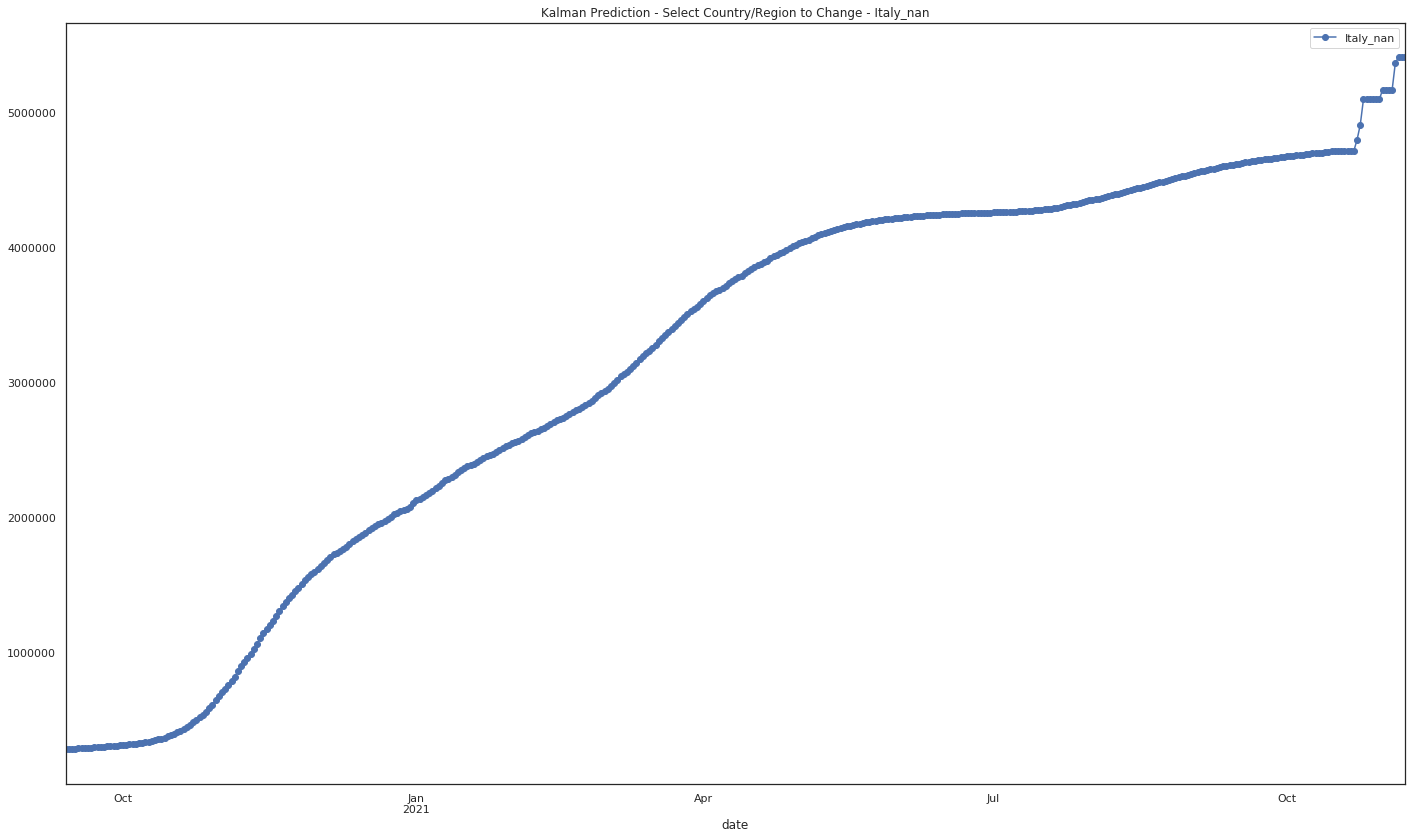

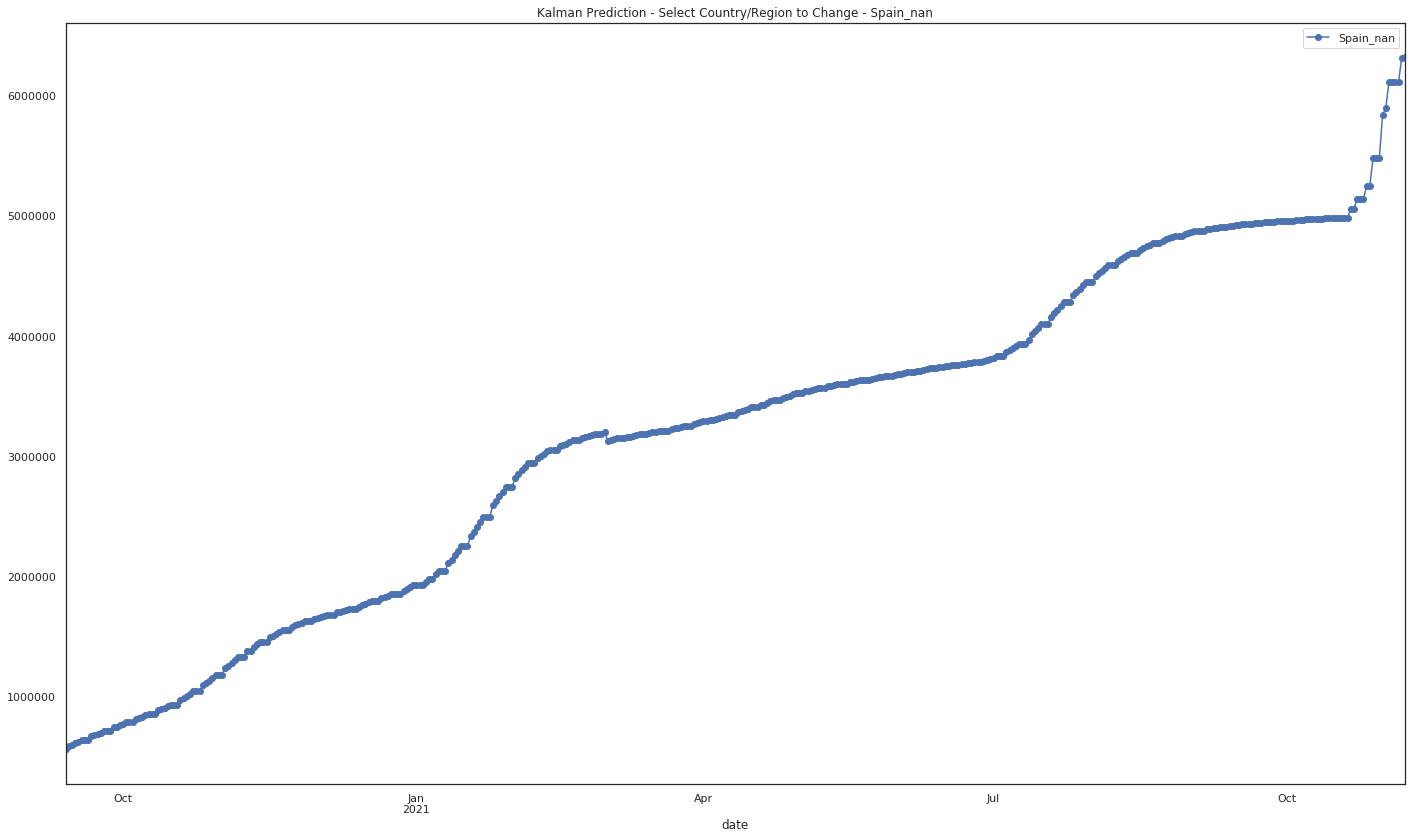

In [66]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


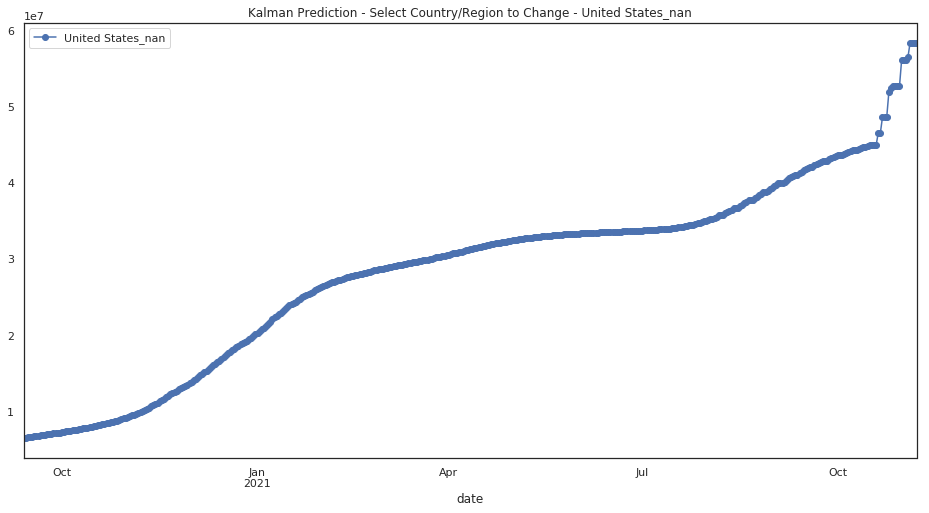

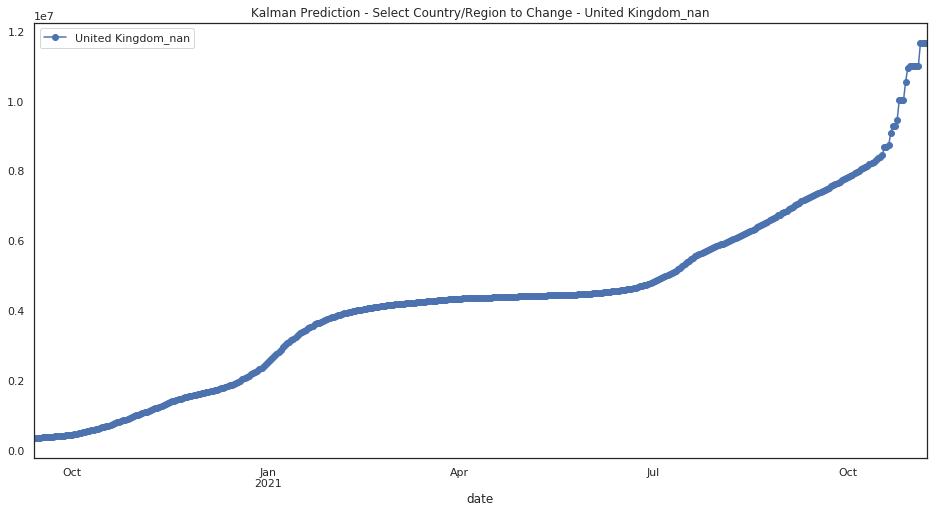

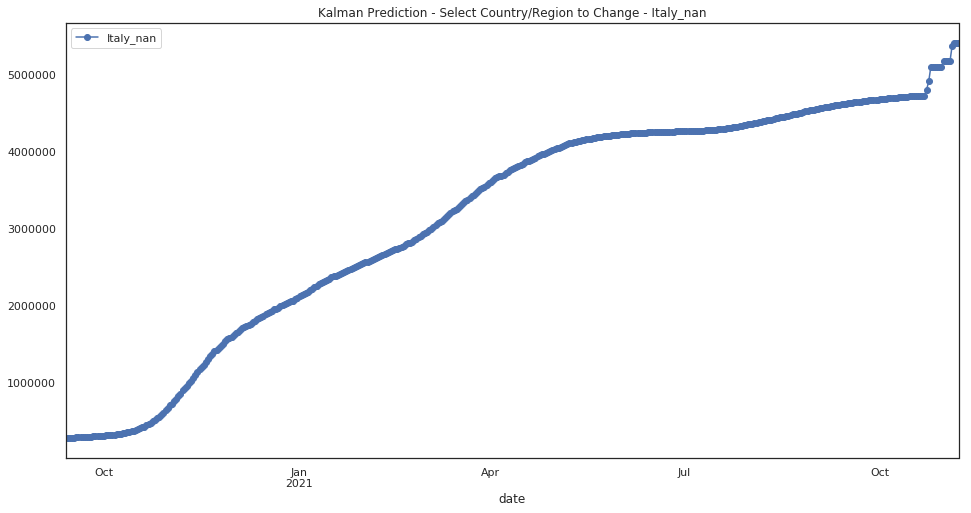

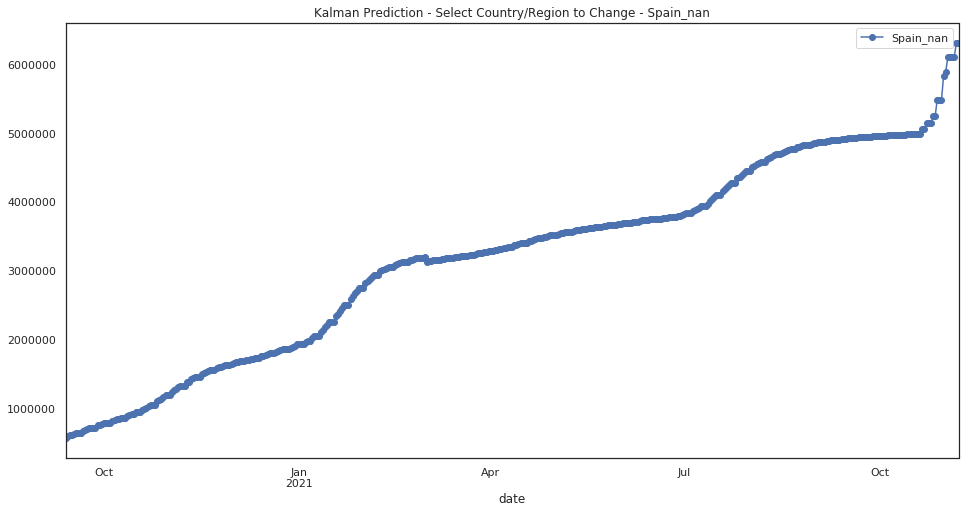

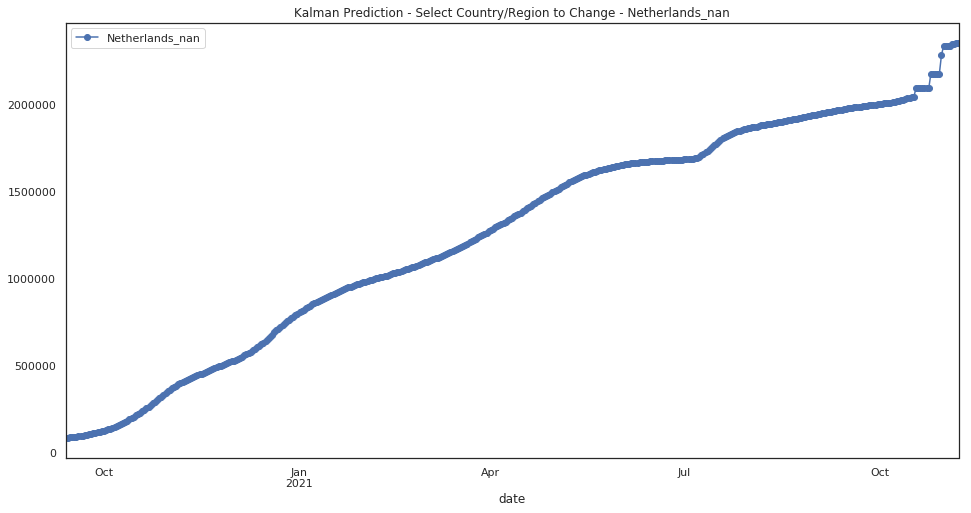

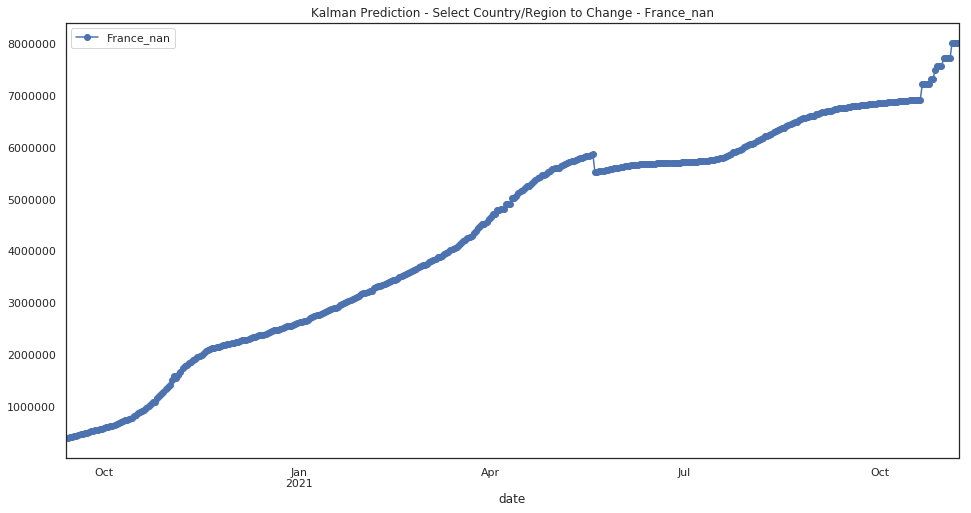

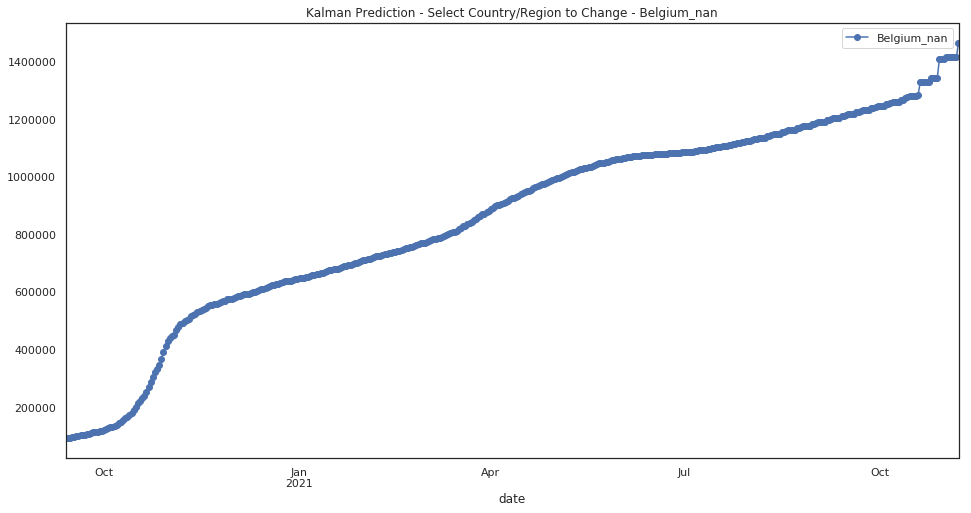

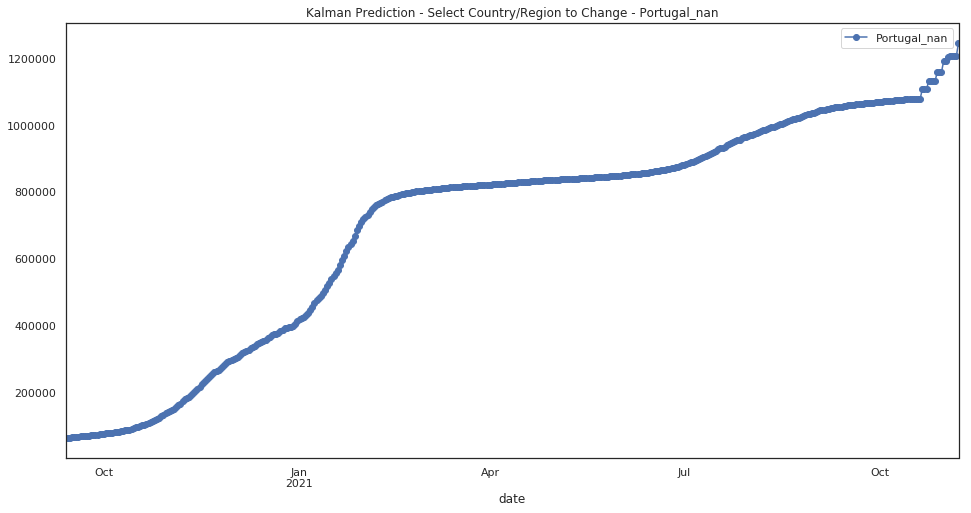

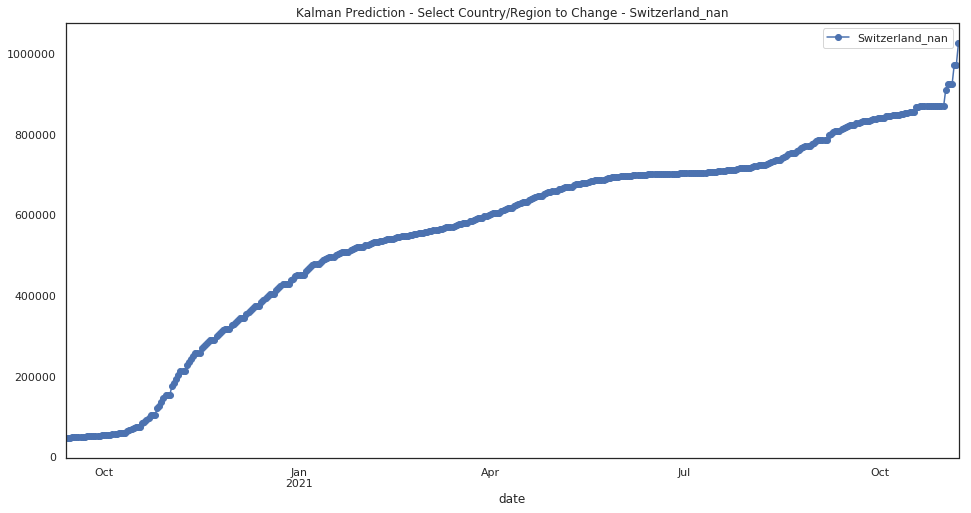

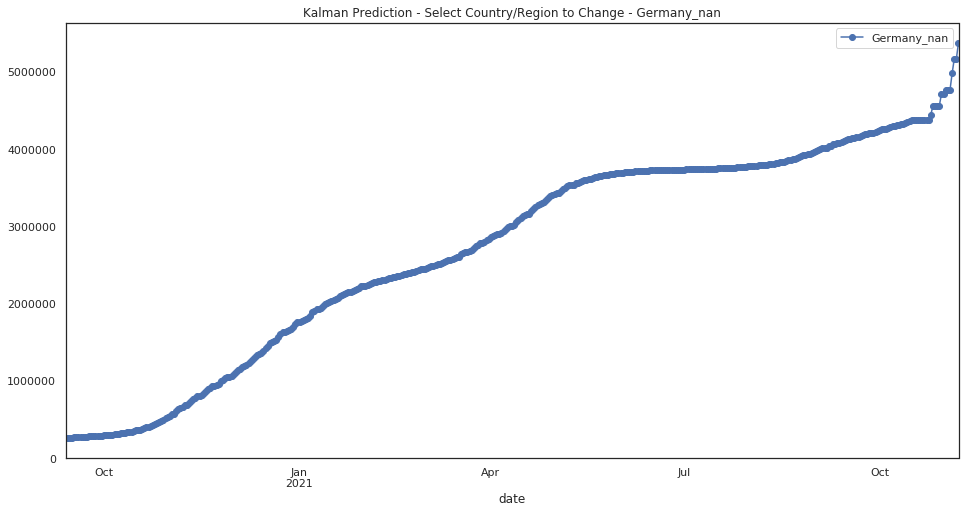

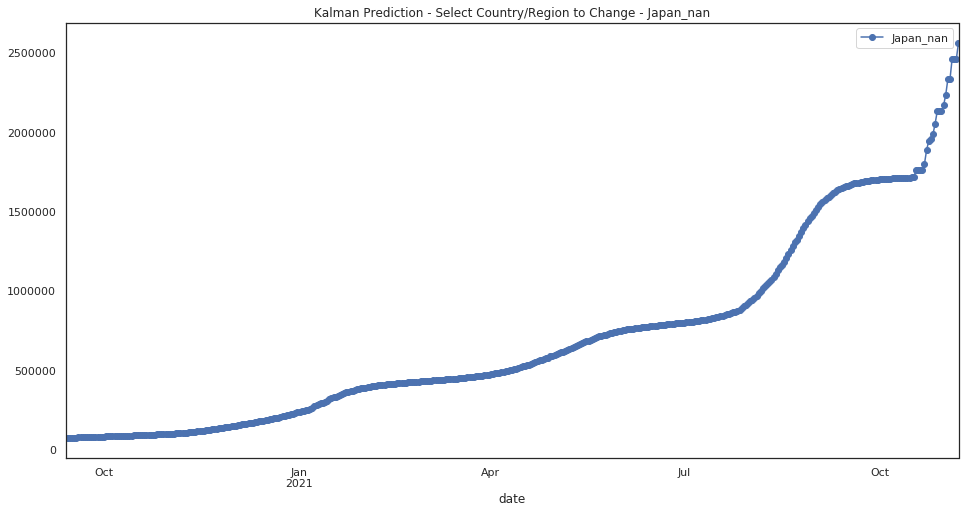

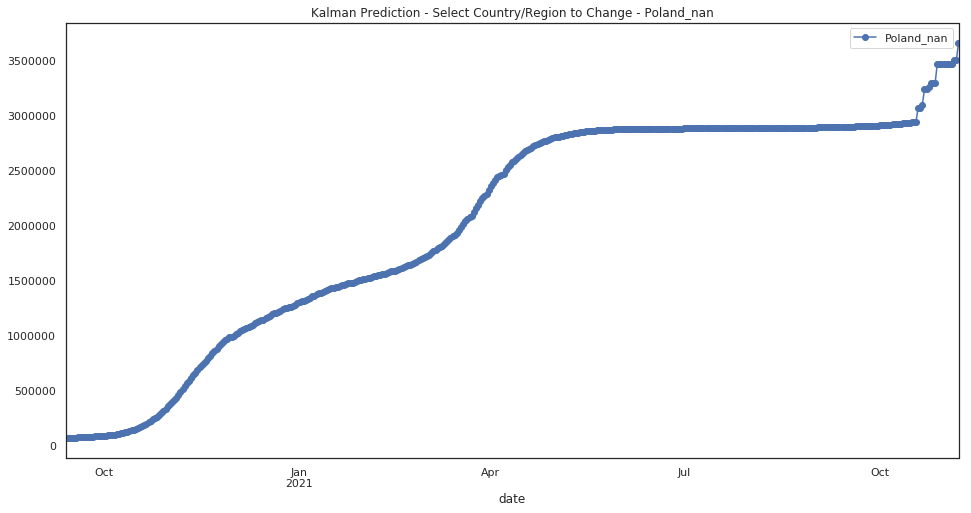

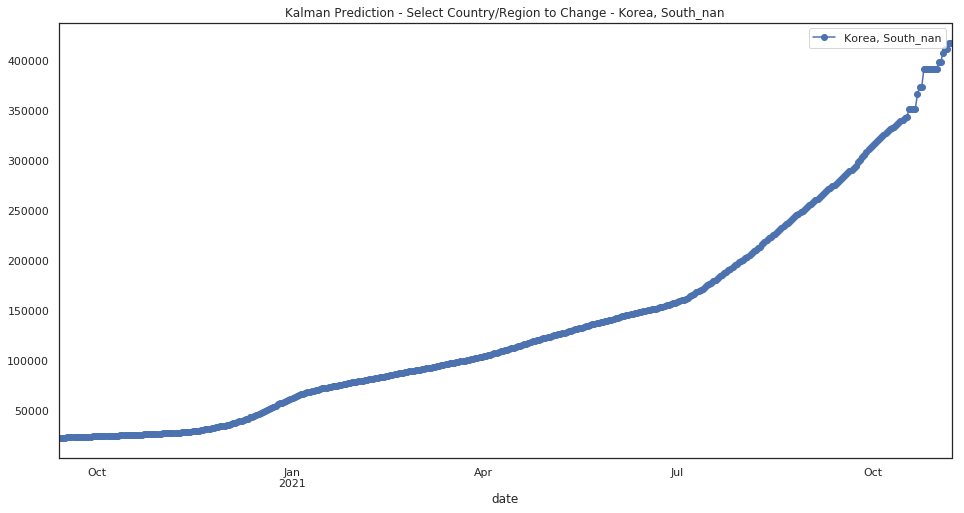

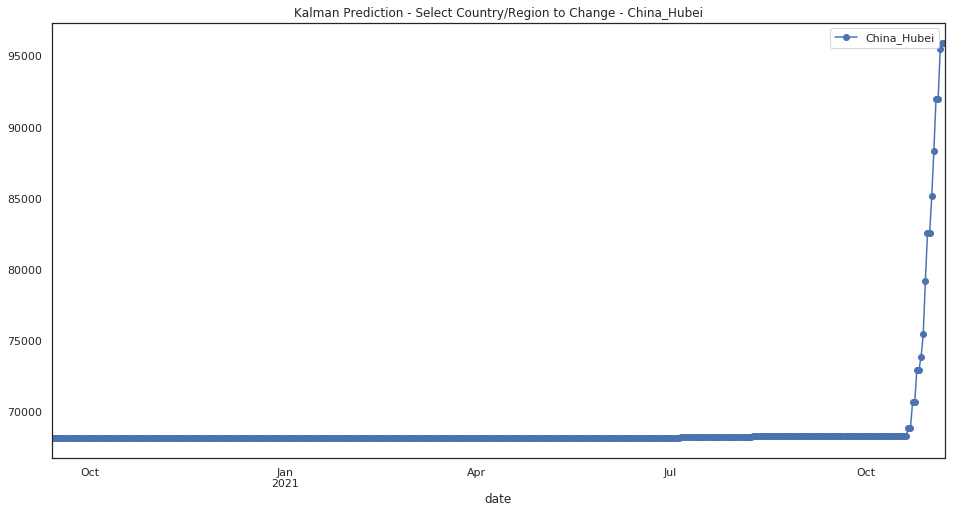

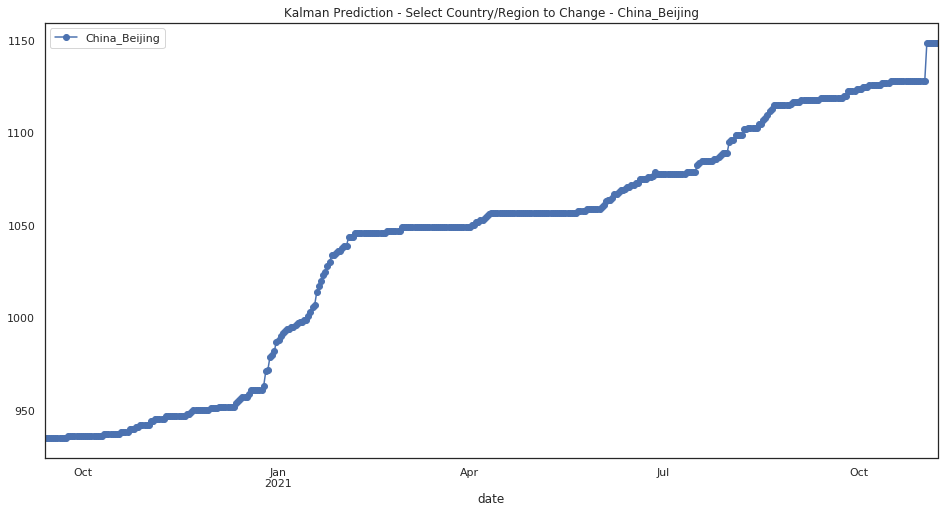

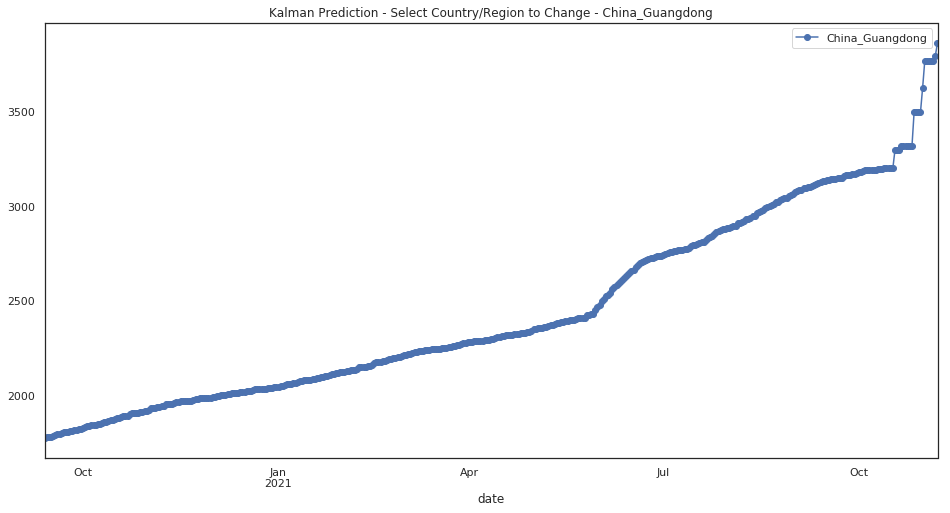

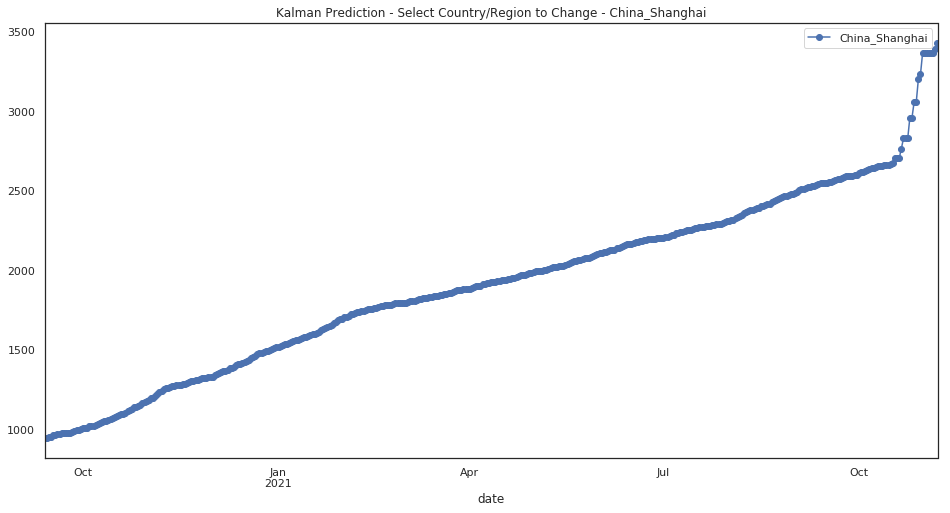

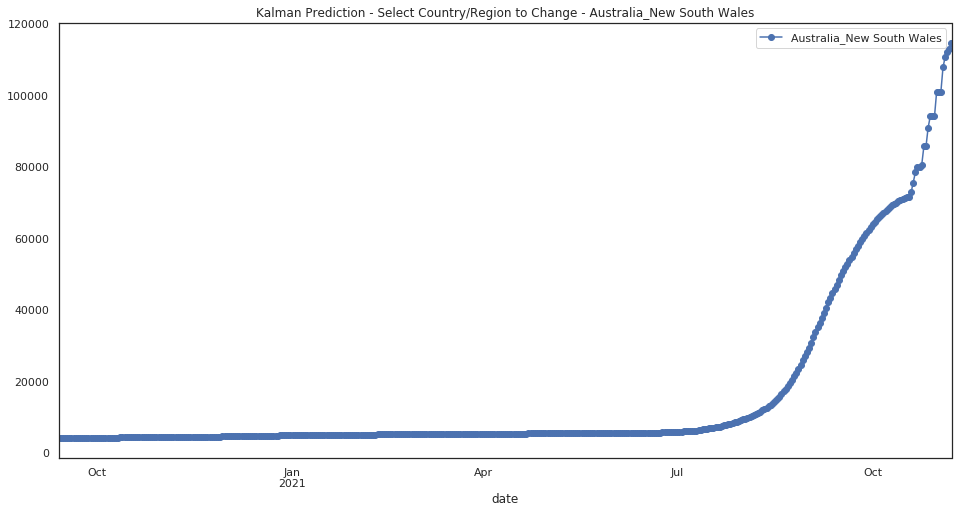

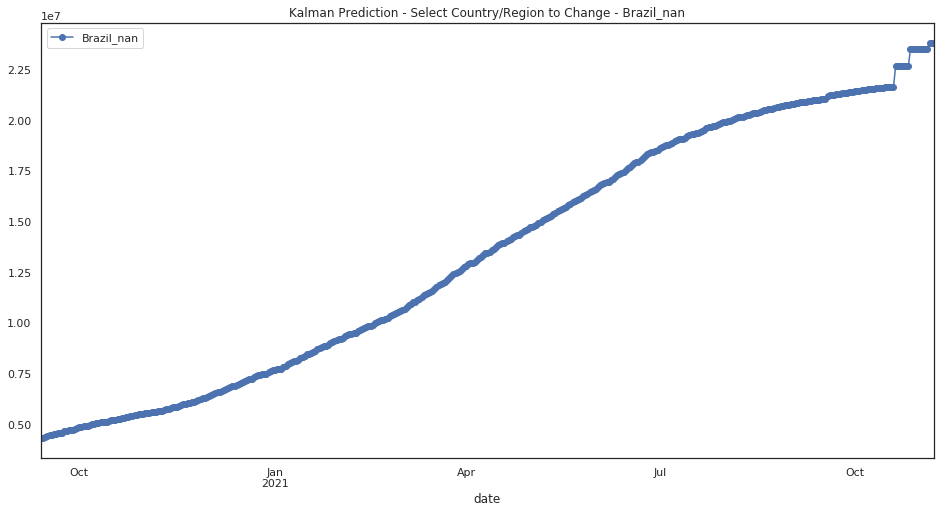

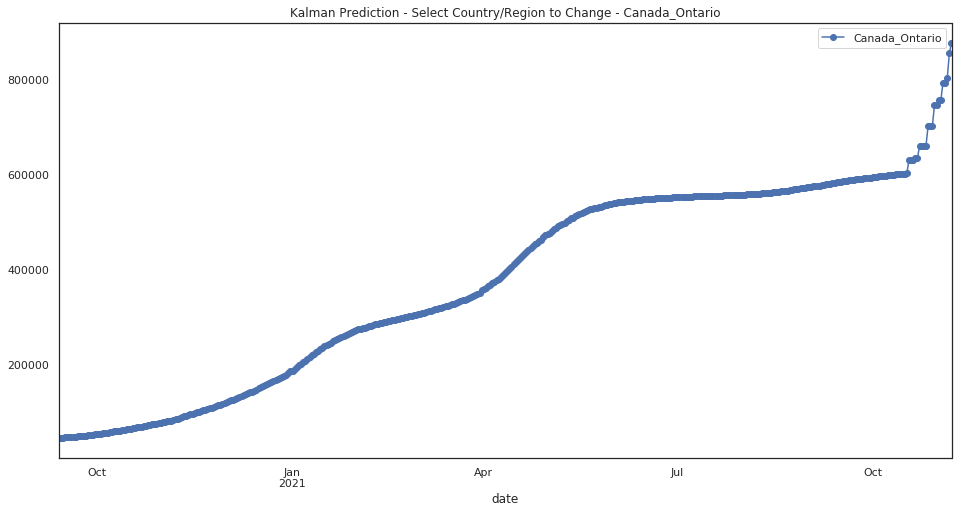

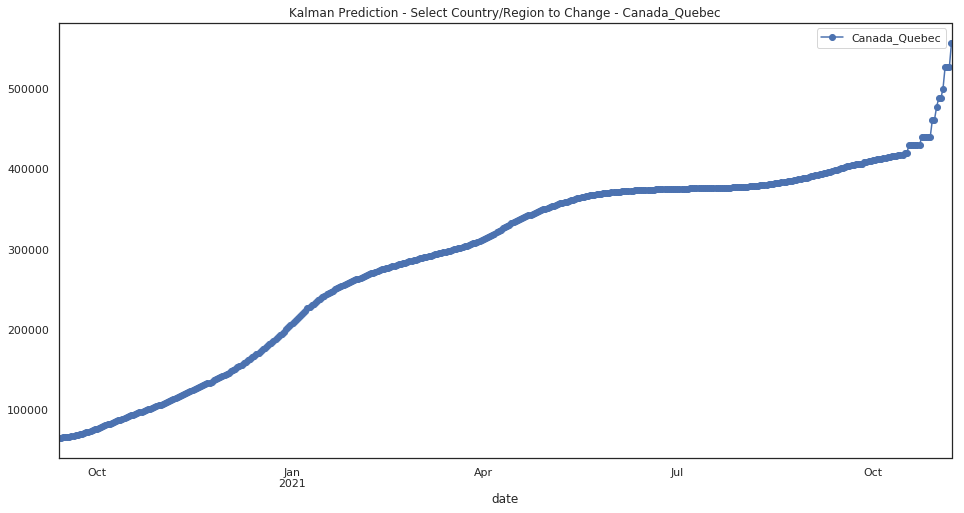

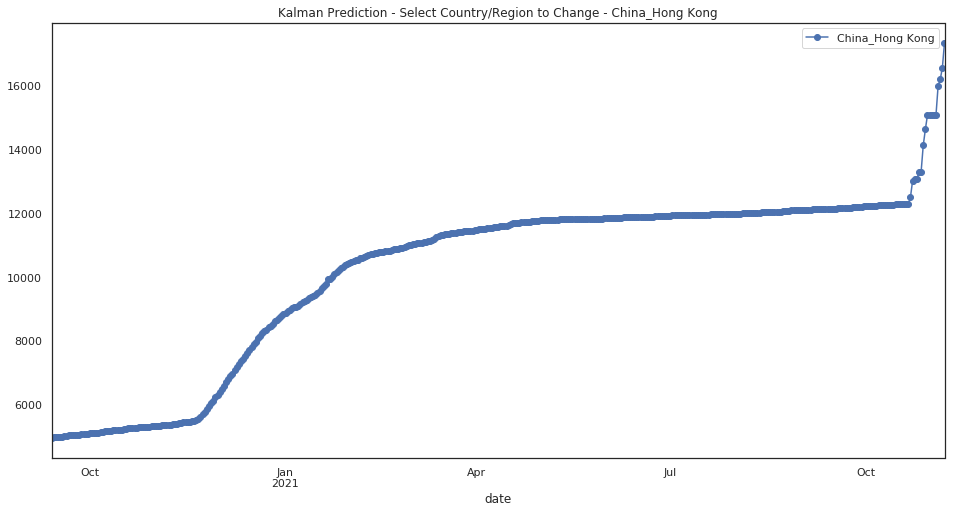

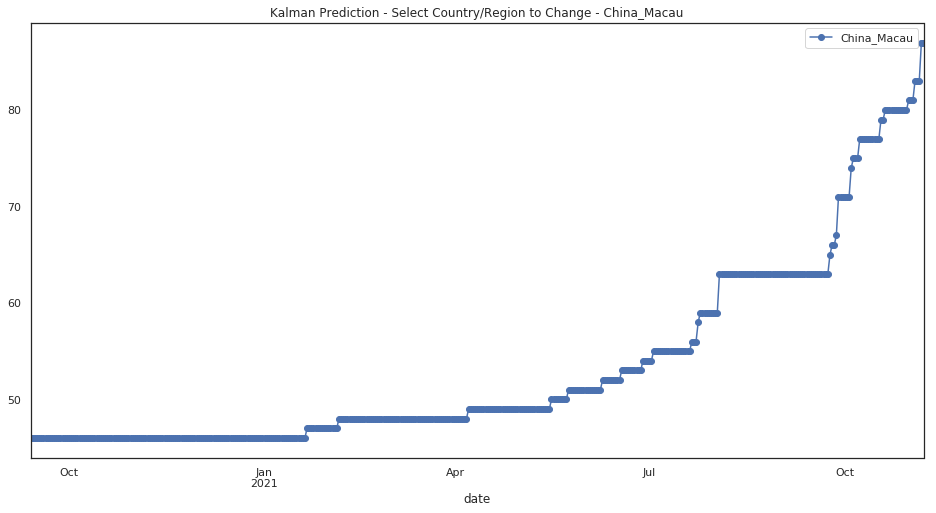

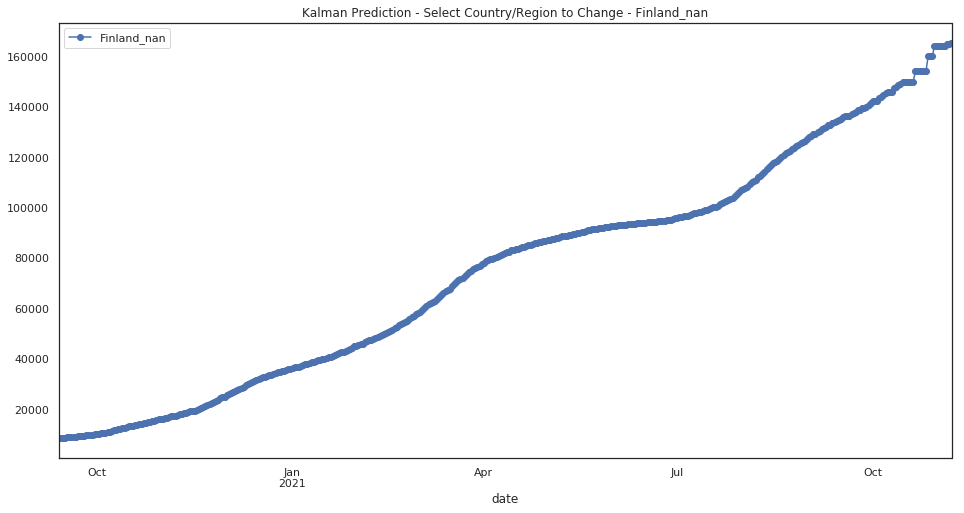

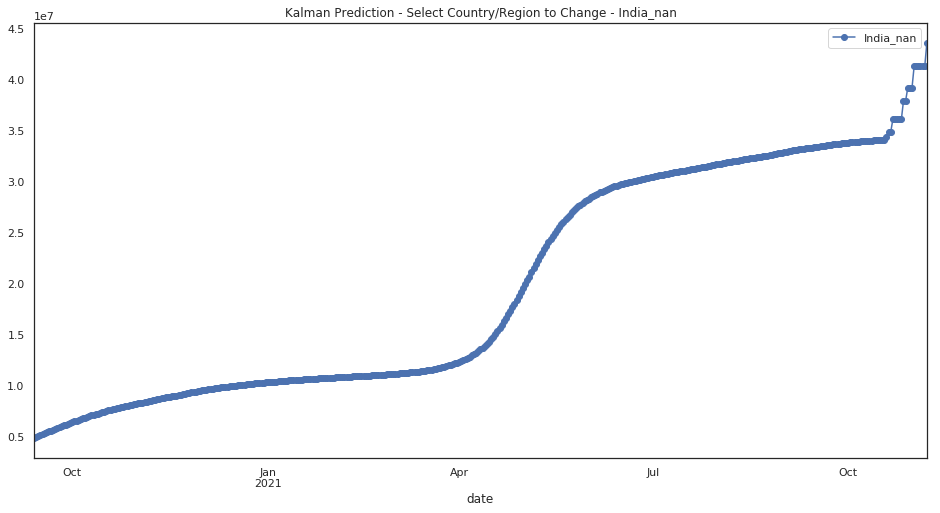

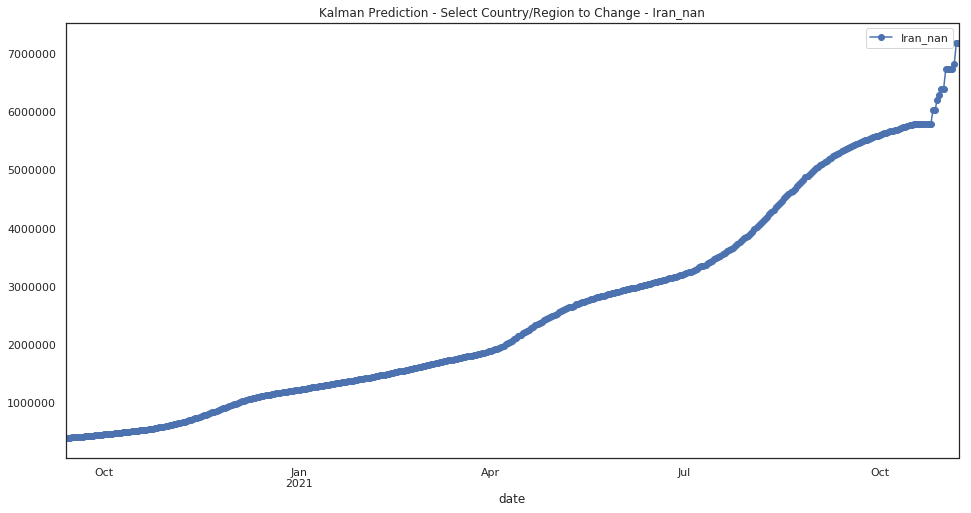

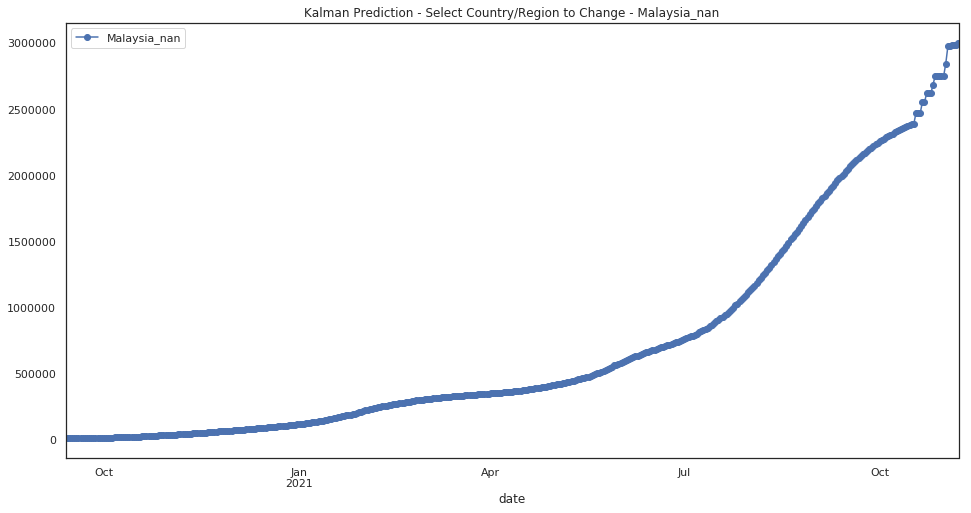

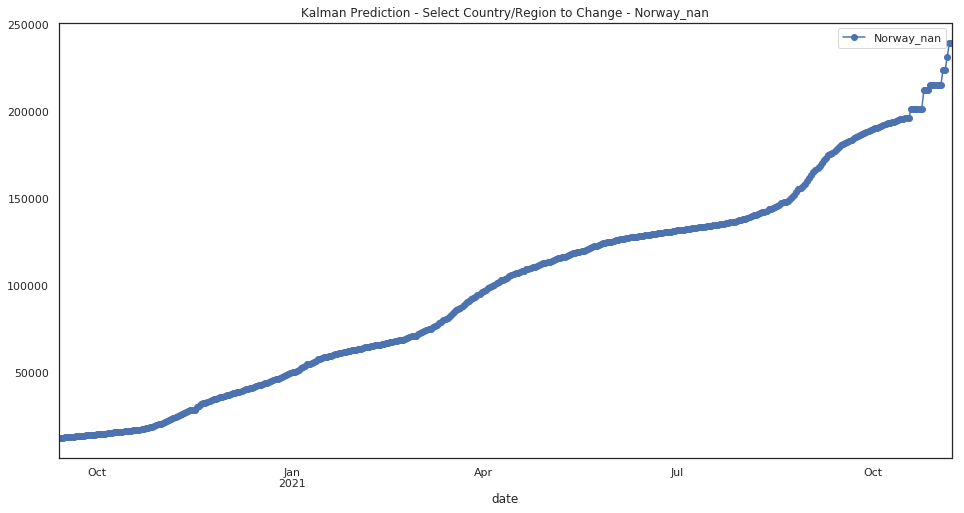

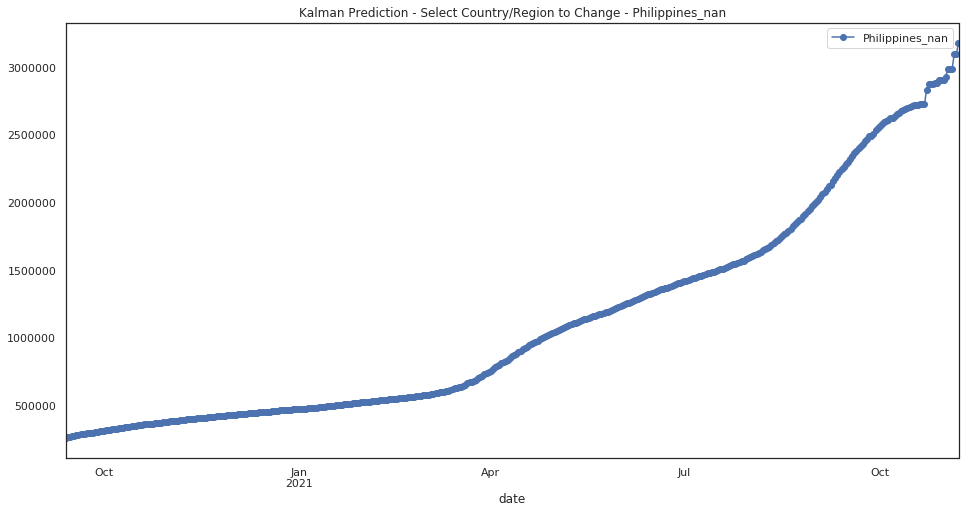

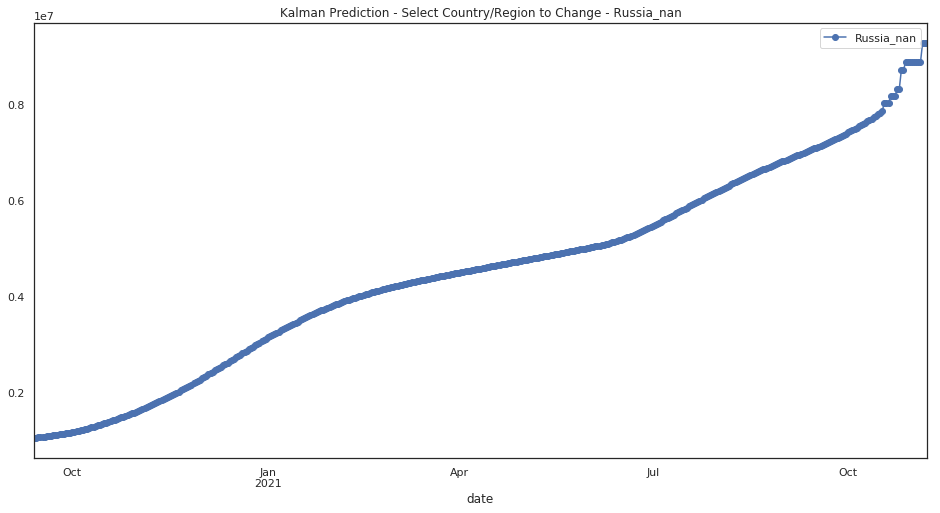

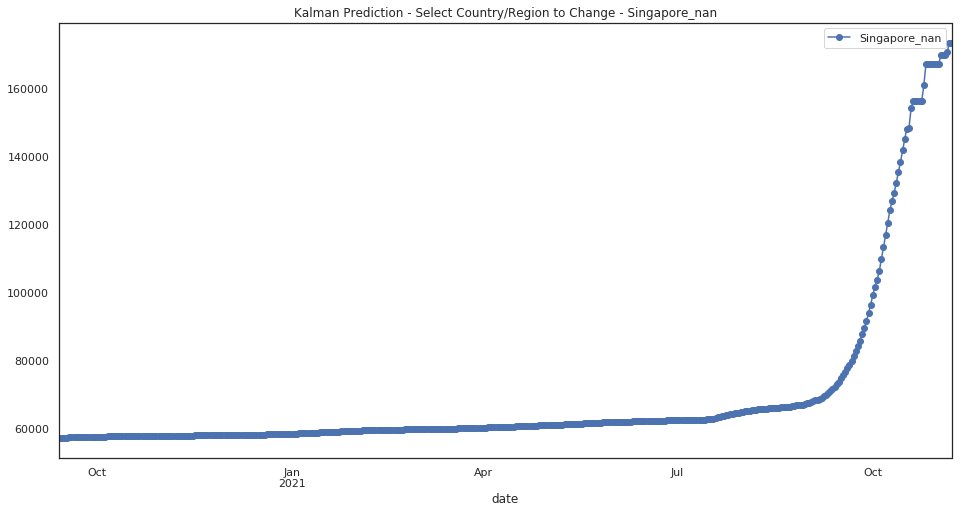

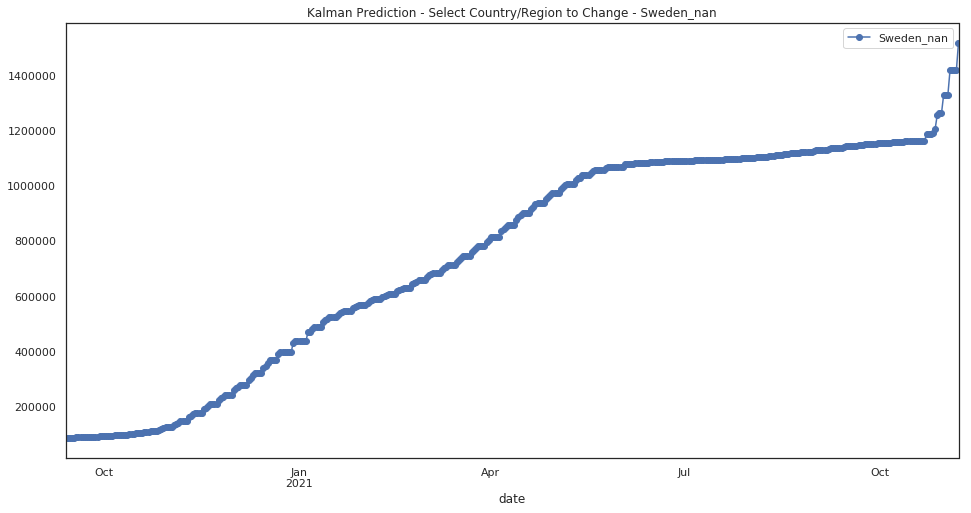

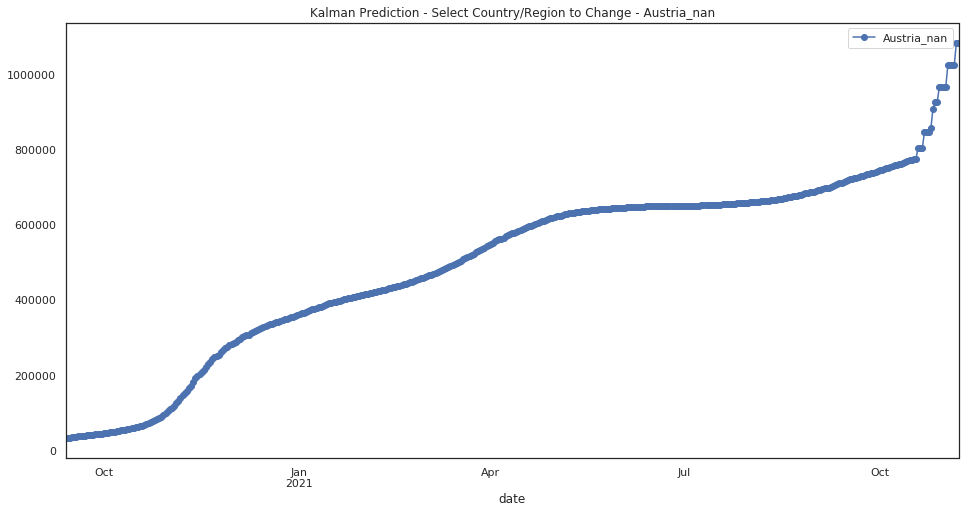

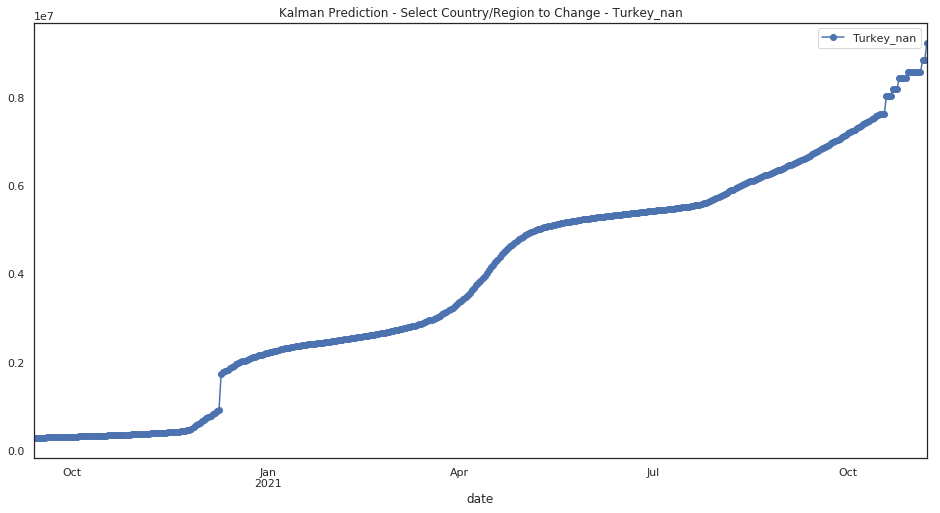

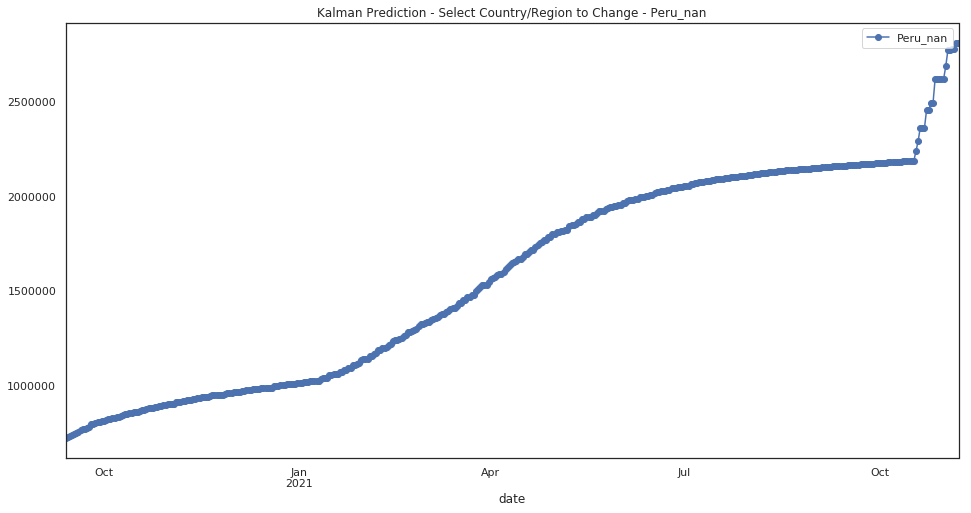

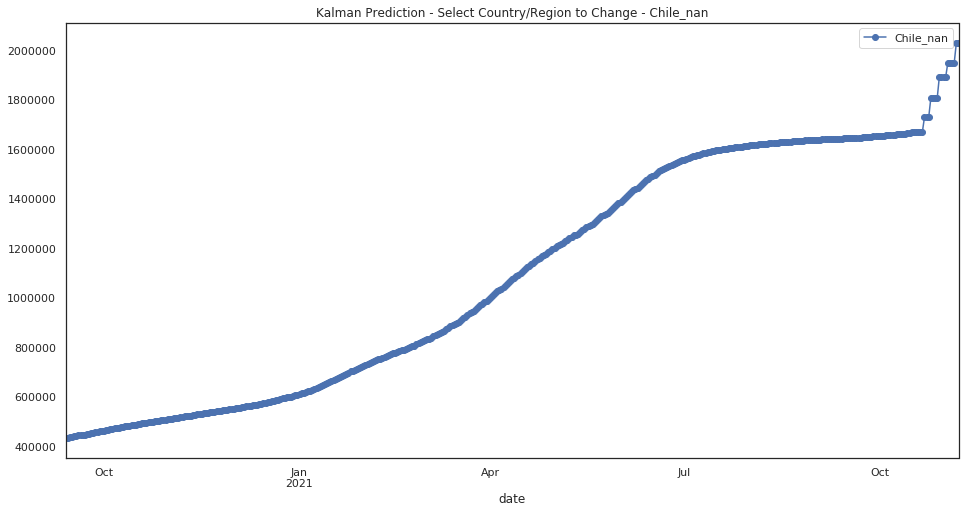

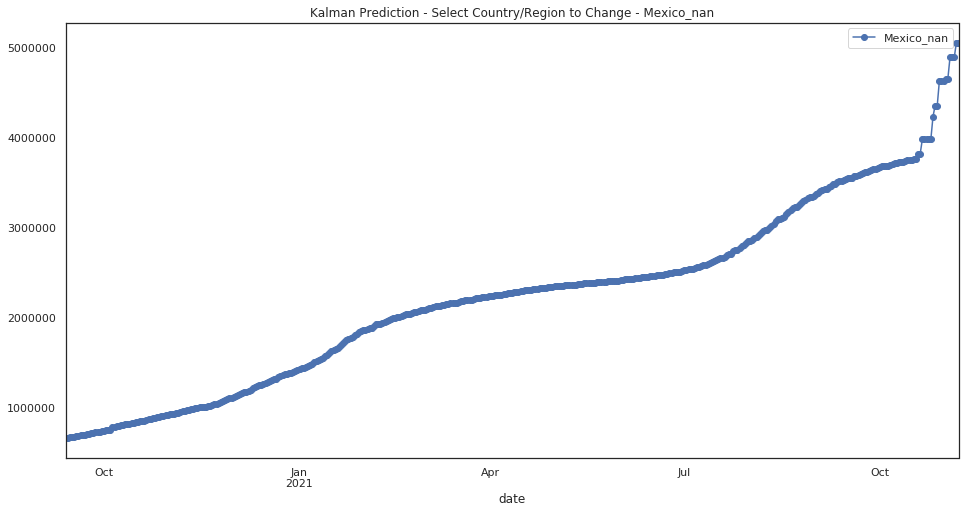

In [67]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [68]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2021-11-07 00:00:00
dtype: object


0  pred_confirmed
United States_nan                                   NaN      58409230.0
India_nan                                           NaN      43607692.0
Brazil_nan                                          NaN      23842836.0
United Kingdom_nan                                  NaN      11675990.0
Russia_nan                                          NaN       9296979.0
Turkey_nan                                          NaN       9240350.0
France_nan                                          NaN       8016154.0
Iran_nan                                            NaN       7183601.0
Argentina_nan                                       NaN       6773810.0
Spain_nan                                           NaN       6318701.0
Colombia_nan                                        NaN       6185077.0
Indonesia_nan                                       NaN       5542770.0
Italy_nan                                           NaN       5410025.0
Germany_nan                                         NaN       5380884.0
Mexico_nan                                          NaN       5051425.0
Poland_nan                                          NaN       3659025.0
Ukraine_nan                                         NaN       3637680.0
South Africa_nan                                    NaN       3561351.0
Philippines_nan                                     NaN       3183441.0
Malaysia_nan                                        NaN       3004018.0
Peru_nan                                            NaN       2813751.0
Japan_nan                                           NaN       2564298.0
Thailand_nan                                        NaN       2543812.0
Netherlands_nan                                     NaN       2358528.0
Bangladesh_nan                                      NaN       2349902.0
Iraq_nan                                            NaN       2315292.0
Czechia_nan                                         NaN       2039075.0
Chile_nan                                           NaN       2032111.0
Romania_nan                                         NaN       1914662.0
Israel_nan                                          NaN       1788496.0
...                                                 ...             ...
China_Shanxi                                        NaN           406.0
China_Guangxi                                       NaN           401.0
Canada_Prince Edward Island                         NaN           384.0
Australia_Tasmania                                  NaN           313.0
China_Hainan                                        NaN           300.0
Australia_Northern Territory                        NaN           292.0
China_Gansu                                         NaN           231.0
China_Guizhou                                       NaN           188.0
China_Ningxia                                       NaN           128.0
China_Macau                                         NaN            87.0
United Kingdom_Falkland Islands (Malvinas)          NaN            83.0
United Kingdom_Montserrat                           NaN            51.0
France_Saint Pierre and Miquelon                    NaN            38.0
China_Unknown                                       NaN            37.0
Holy See_nan                                        NaN            32.0
Solomon Islands_nan                                 NaN            22.0
China_Qinghai                                       NaN            20.0
Canada_Repatriated Travellers                       NaN            15.0
Palau_nan                                           NaN            14.0
Canada_Grand Princess                               NaN            13.0
MS Zaandam_nan                                      NaN             9.0
United Kingdom_Saint Helena, Ascension and Tris...  NaN             4.0
Marshall Islands_nan                                NaN             4.0
Vanuatu_nan                                         NaN             4.0
Samoa_nan             

In [69]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [70]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [71]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [72]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [73]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [74]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-09-13          42055.0      18325.0      50226.0       9672.0   
2020-09-14          42103.0      18469.0      50435.0       9753.0   
2020-09-15          38858.0      11520.0      48496.0       1438.0   
2020-09-16          38901.0      11672.0      48734.0       1438.0   
2020-09-17          38941.0      11867.0      49206.0       1483.0   
2020-09-18          38958.0      11994.0      49424.0       1498.0   
2020-09-19          38969.0      12143.0      49631.0       1564.0   
2020-09-20          39056.0      12295.0      49831.0       1564.0   
2020-09-21          39285.0      12568.0      50097.0       1819.0   
2020-09-22          39286.0      12709.0      50289.0       1681.0   
2020-09-23          39330.0      12835.0      50475.0       1912.0   
2020-09-24          39360.0      12968.0      50656.0       1753.0   
2020-09-25          39370.0      13089.0      50832.0       1968.0   
2020-09-26          39374.0      13201.0      50995.0       1836.0   
2020-09-27          39402.0      13313.0      51146.0       1981.0   
2020-09-28          39431.0      13442.0      51292.0       2093.0   
2020-09-29          39441.0      13566.0      51446.0       1966.0   
2020-09-30          39457.0      13700.0      51612.0       2200.0   
2020-10-01          39474.0      13856.0      51777.0       2050.0   
2020-10-02          39482.0      14011.0      51935.0       2239.0   
2020-10-03          39486.0      14166.0      52085.0       2110.0   
2020-10-04          39525.0      14317.0      52224.0       2233.0   
2020-10-05          39612.0      14459.0      52357.0       2458.0   
2020-10-06          39688.0      14615.0      52484.0       2370.0   
2020-10-07          39746.0      14773.0      52605.0       2741.0   
2020-10-08          39811.0      14941.0      52740.0       2568.0   
2020-10-09          39884.0      15110.0      52892.0       2845.0   
2020-10-10          39901.0      15276.0      53033.0       2696.0   
2020-10-11          39964.0      15444.0      53164.0       2833.0   
2020-10-12          40060.0      15614.0      53400.0       3091.0   
...                     ...          ...          ...          ...   
2021-10-10         155593.0     175030.0     204680.0      15291.0   
2021-10-11         155634.0     175175.0     204783.0      15291.0   
2021-10-12         155690.0     175551.0     204876.0      15307.0   
2021-10-13         155733.0     176219.0     204984.0      15307.0   
2021-10-14         155773.0     176732.0     205098.0      15314.0   
2021-10-15         155798.0     177191.0     205198.0      15326.0   
2021-10-16         155820.0     177594.0     205291.0      15338.0   
2021-10-17         155867.0     178022.0     205375.0      15338.0   
2021-10-18         155859.0     178073.0     211871.0      15338.0   
2021-10-19         155850.0     183940.0     216087.0      15338.0   
2021-10-20         162347.0     187889.0     216664.0      15338.0   
2021-10-21         169928.0     184991.0     226441.0      15338.0   
2021-10-22         168817.0     187691.0     228694.0      15564.0   
2021-10-23         173937.0     190268.0     225676.0      15630.0   
2021-10-24         185260.0     192431.0     225676.0      15872.0   
2021-10-25         186223.0     200800.0     231685.0      16458.0   
2021-10-26         186807.0     203574.0     237067.0      16588.0   
2021-10-27         193880.0     200941.0     246182.0      17405.0   
2021-10-28         203129.0     200941.0     263742.0      17562.0   
2021-10-29         216148.0     201595.0     263092.0      17562.0   
2021-10-30         217894.0     202961.0     262935.0      17562.0   
2021-10-31         224875.0     204827.0     264835.0      17956.0   
2021-11-01         242869.0     207092.0     264528.0      18938.0   
2021-11-02         248472.0     207514.0     264528.0      19510.0   
2021-11-03

In [75]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [76]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'India_nan',
 'Brazil_nan',
 'United Kingdom_nan',
 'Russia_nan',
 'Turkey_nan',
 'France_nan',
 'Iran_nan',
 'Argentina_nan',
 'Spain_nan',
 'Colombia_nan',
 'Indonesia_nan',
 'Italy_nan',
 'Germany_nan',
 'Mexico_nan',
 'Poland_nan',
 'Ukraine_nan',
 'South Africa_nan',
 'Philippines_nan',
 'Malaysia_nan',
 'Peru_nan',
 'Japan_nan',
 'Thailand_nan',
 'Netherlands_nan',
 'Bangladesh_nan',
 'Iraq_nan',
 'Czechia_nan',
 'Chile_nan',
 'Romania_nan',
 'Israel_nan',
 'Pakistan_nan',
 'Sweden_nan',
 'Belgium_nan',
 'Kazakhstan_nan',
 'Serbia_nan',
 'Portugal_nan',
 'Cuba_nan',
 'Hungary_nan',
 'Vietnam_nan',
 'Morocco_nan',
 'Austria_nan',
 'Switzerland_nan',
 'Nepal_nan',
 'United Arab Emirates_nan',
 'Jordan_nan',
 'Georgia_nan',
 'Canada_Ontario',
 'Tunisia_nan',
 'Lebanon_nan',
 'Greece_nan',
 'Belarus_nan',
 'Guatemala_nan',
 'Bulgaria_nan',
 'Burma_nan',
 'Bolivia_nan',
 'Saudi Arabia_nan',
 'Costa Rica_nan',
 'Ecuador_nan',
 'Slovakia_nan',
 'Sri Lanka_nan',
 '

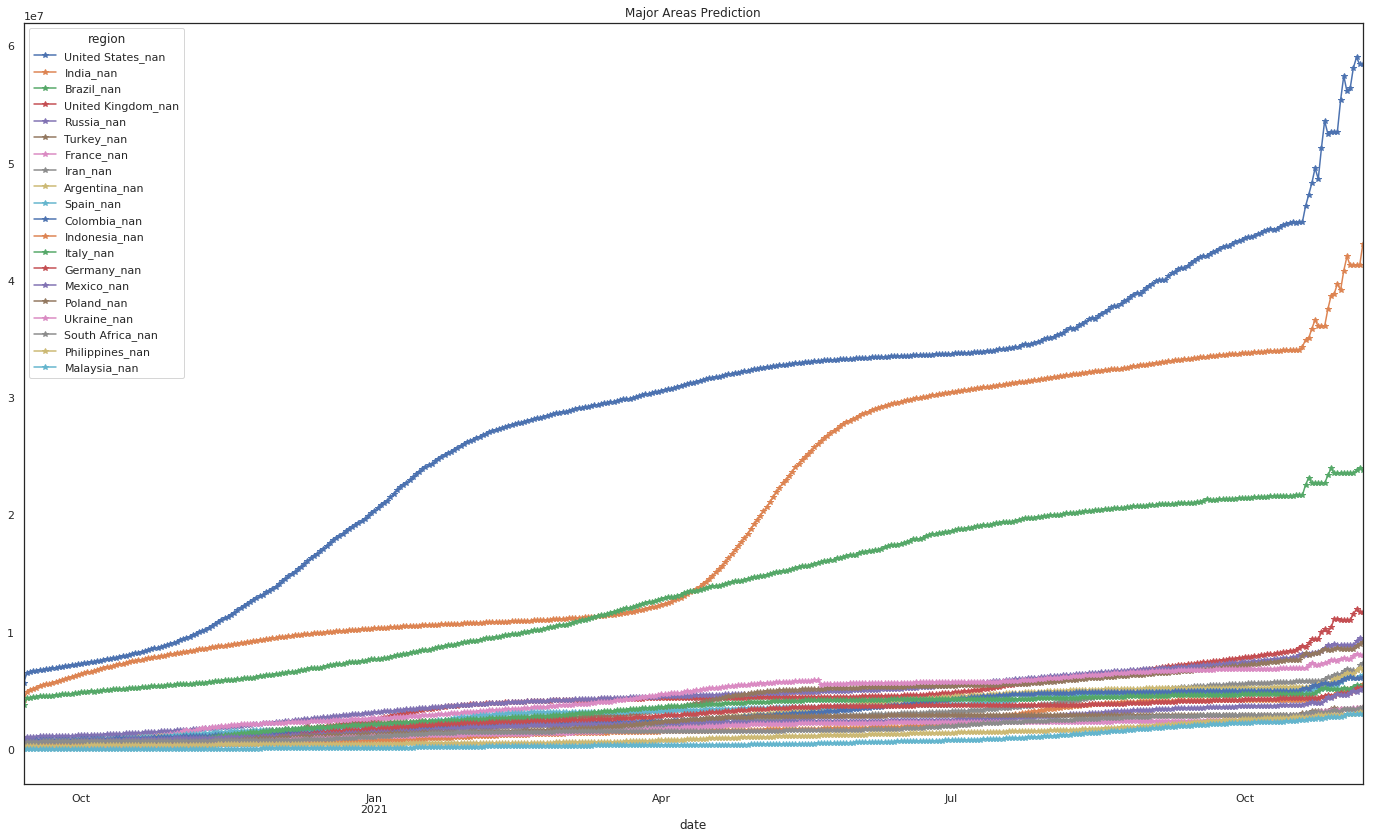

In [77]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

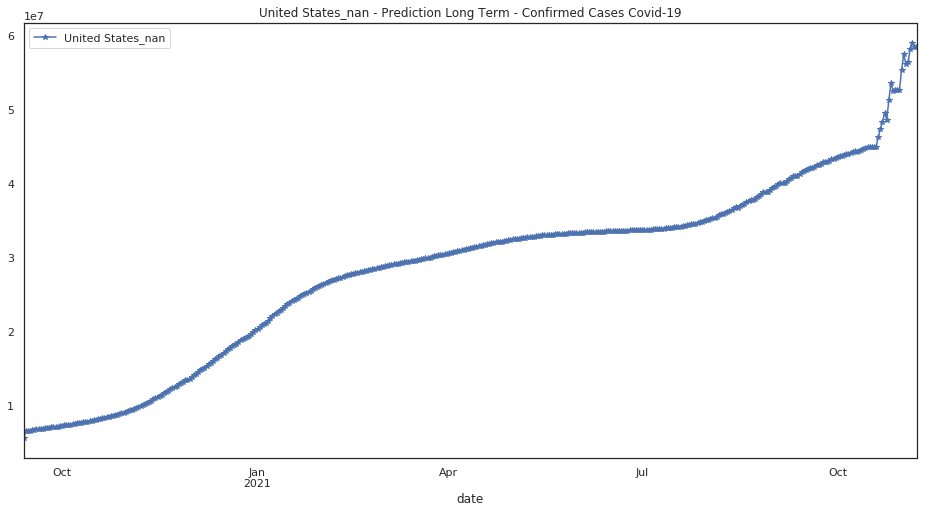

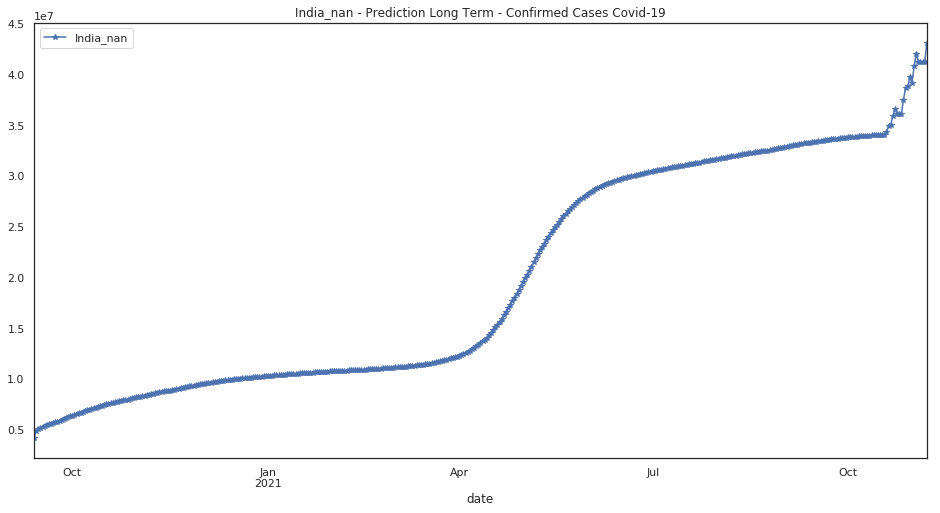

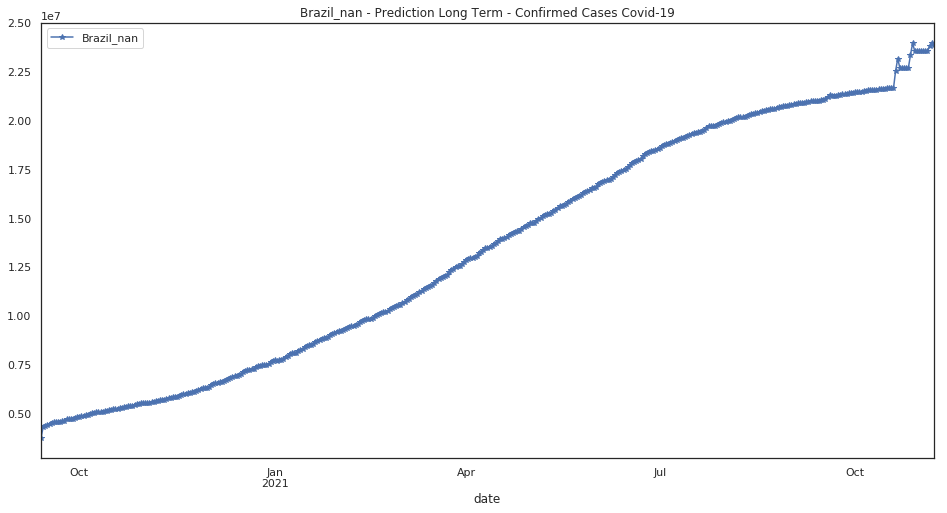

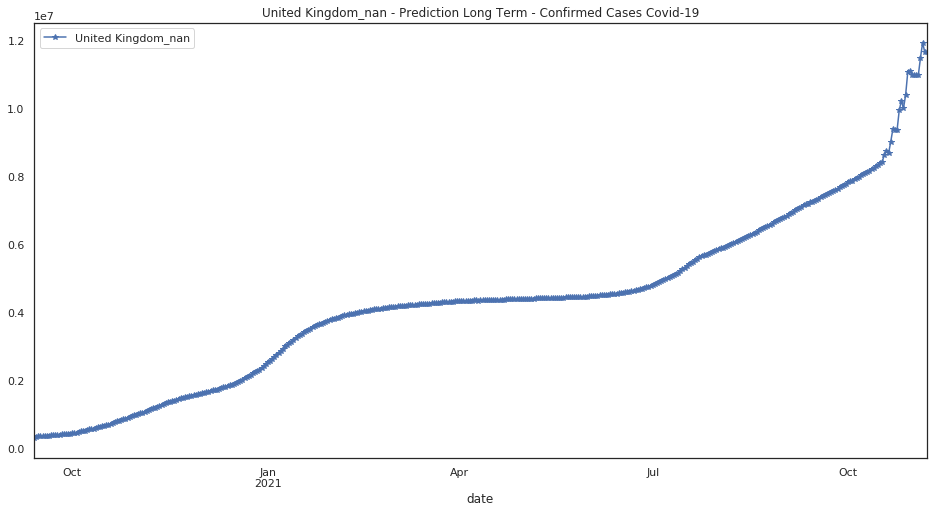

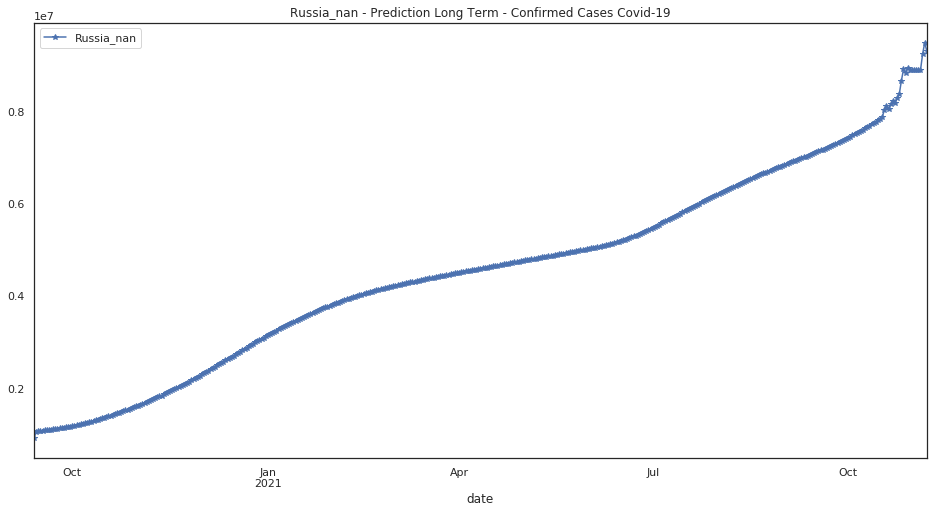

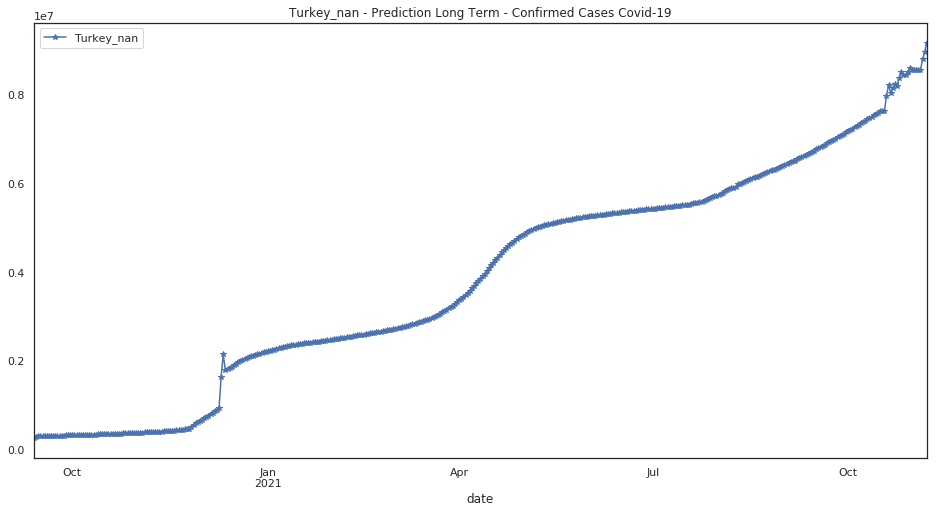

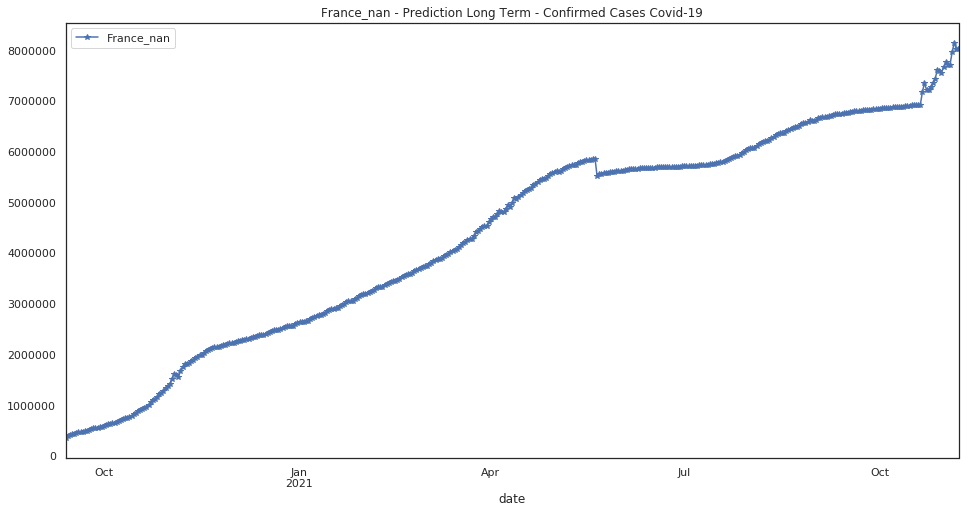

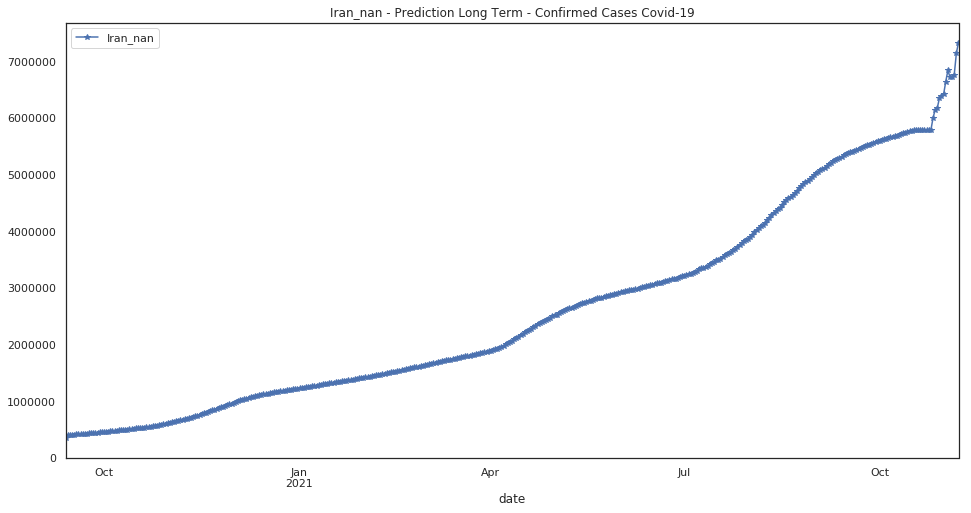

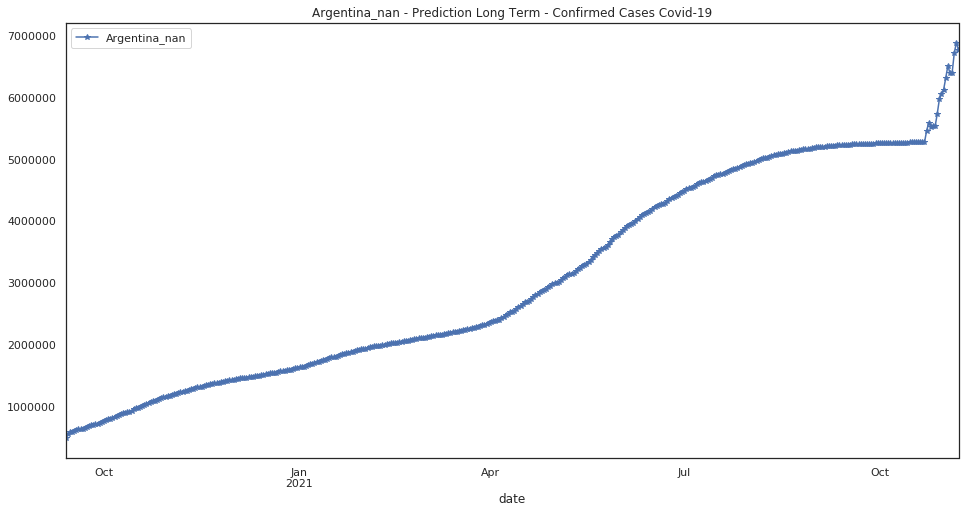

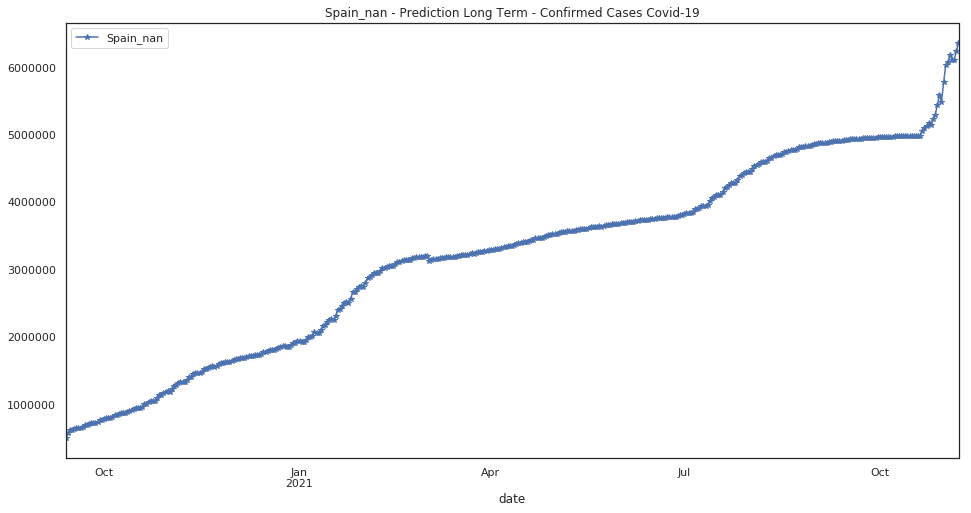

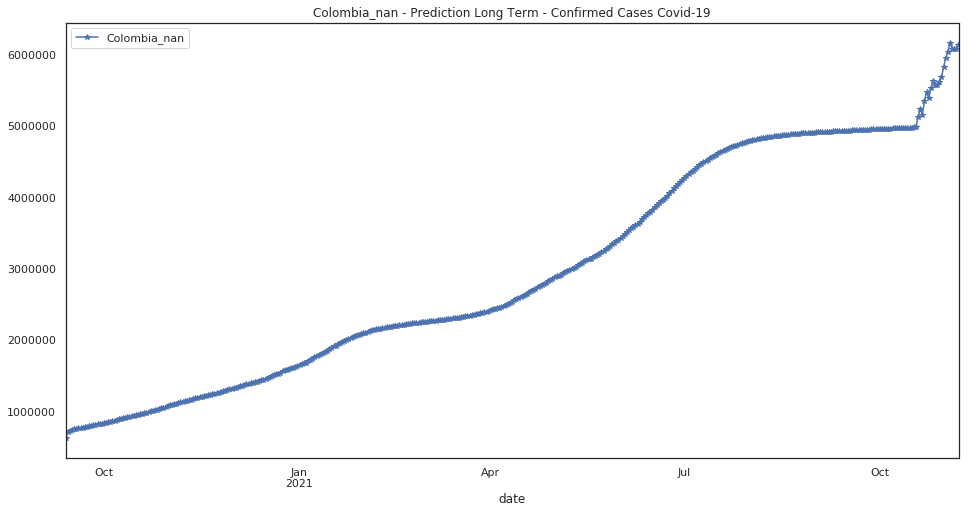

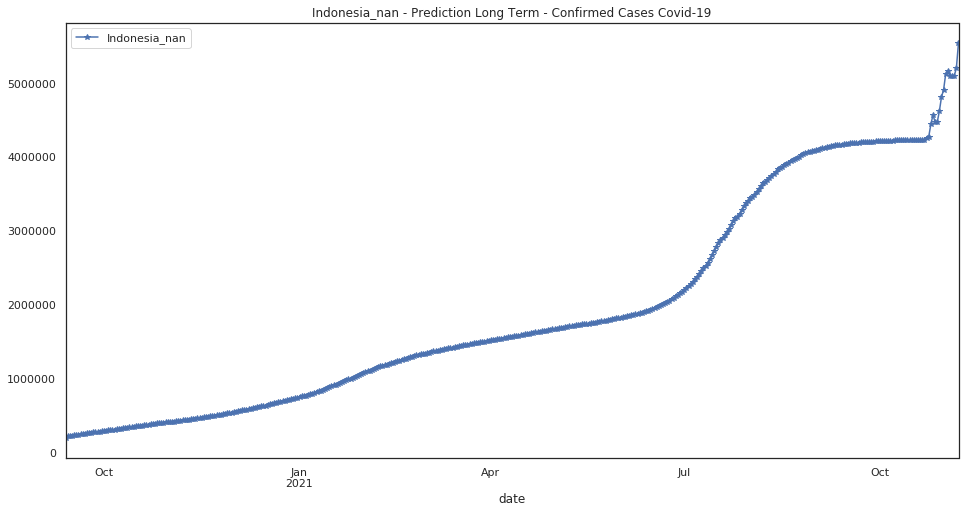

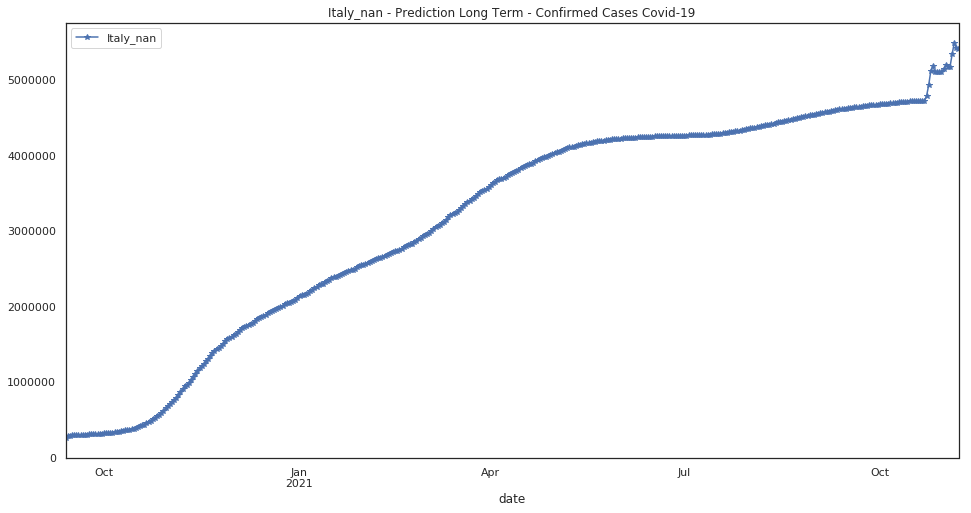

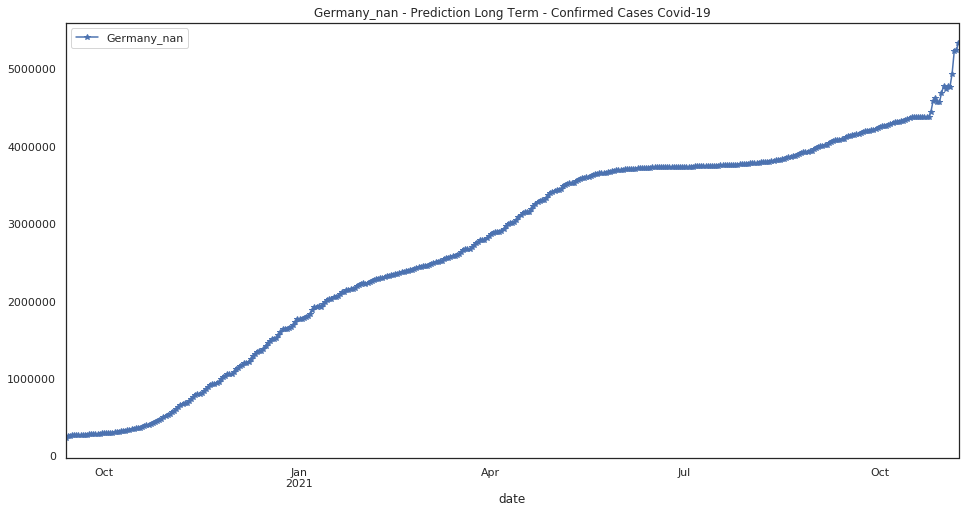

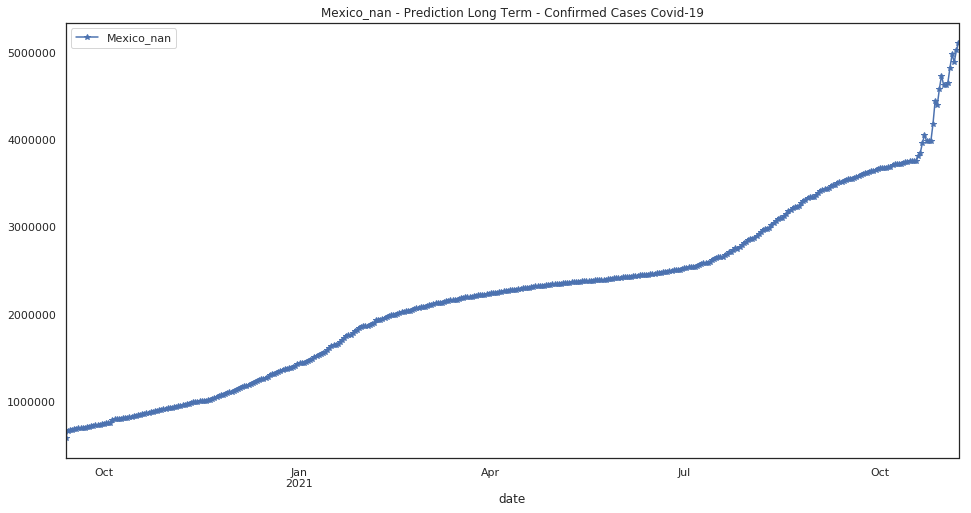

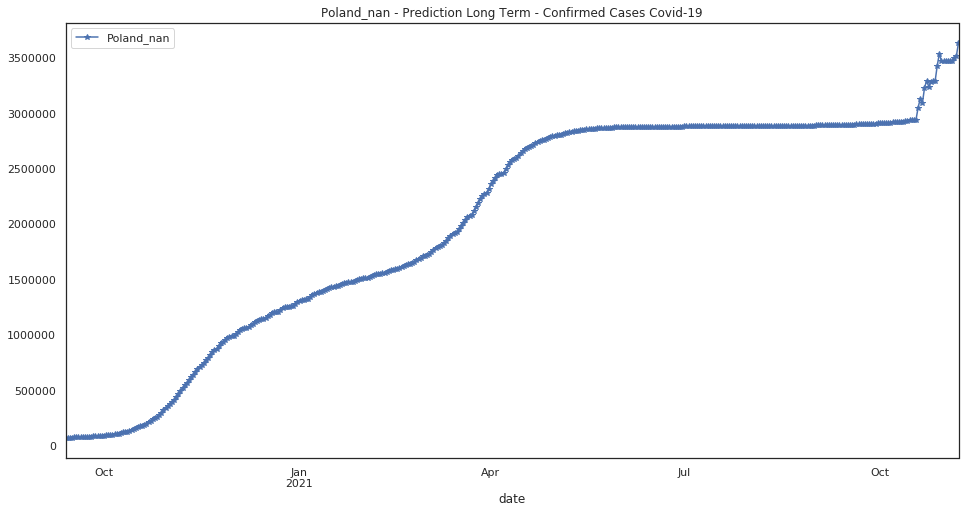

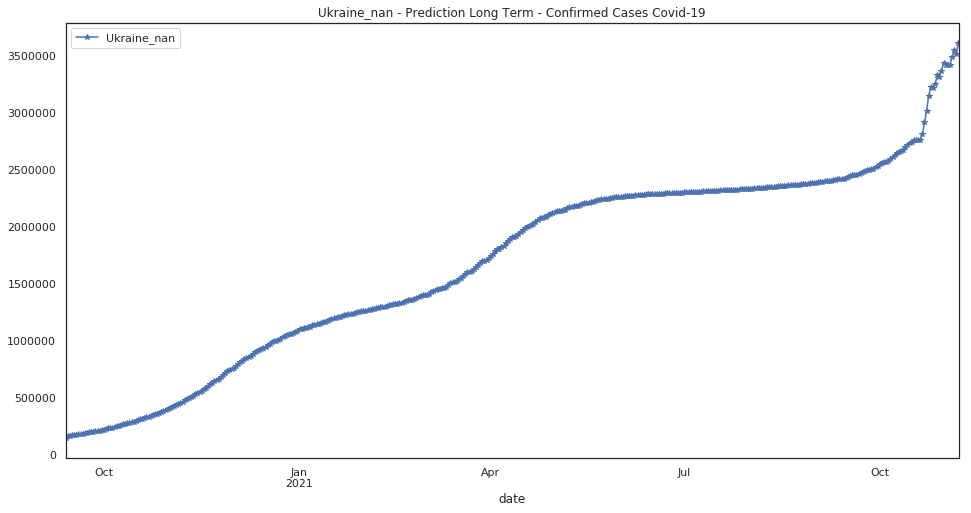

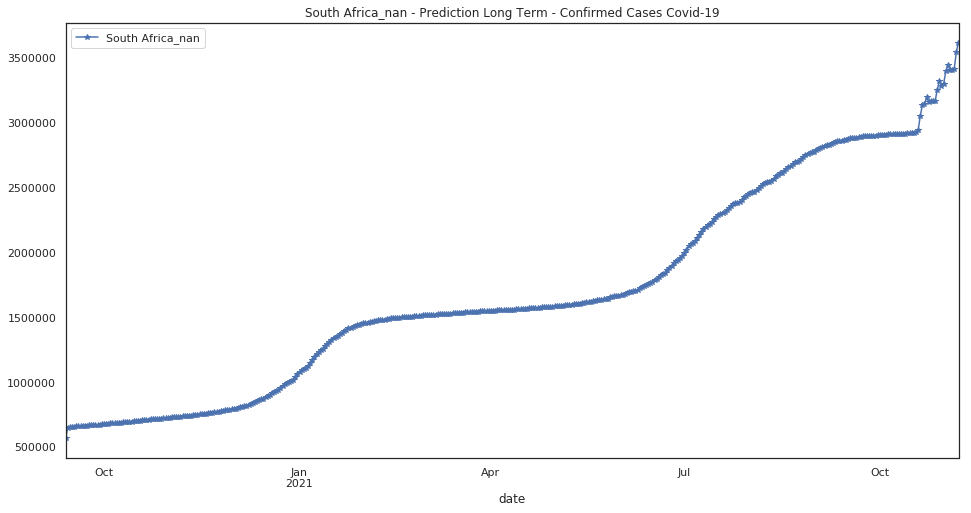

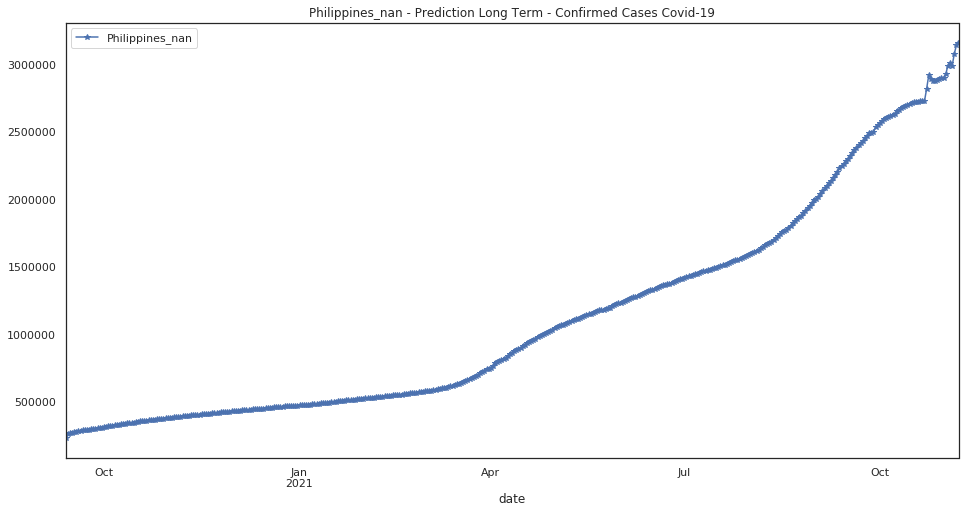

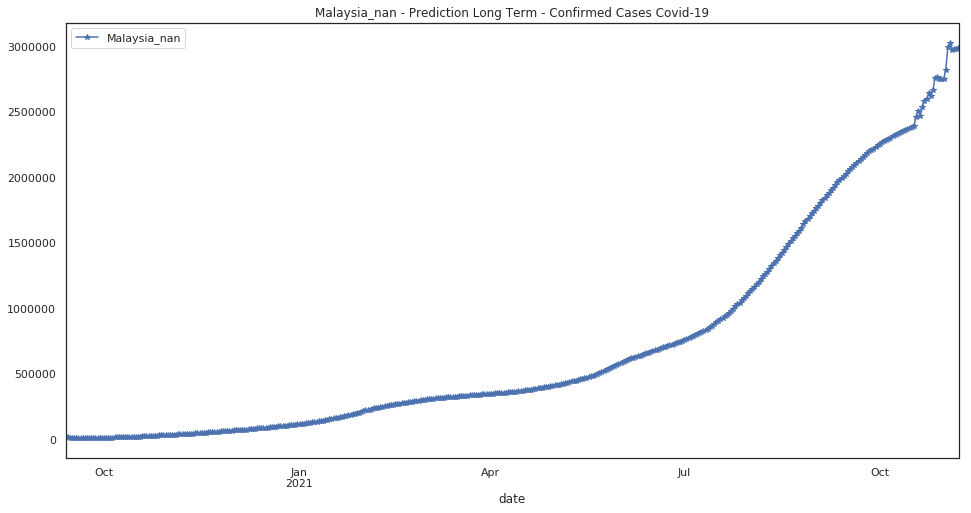

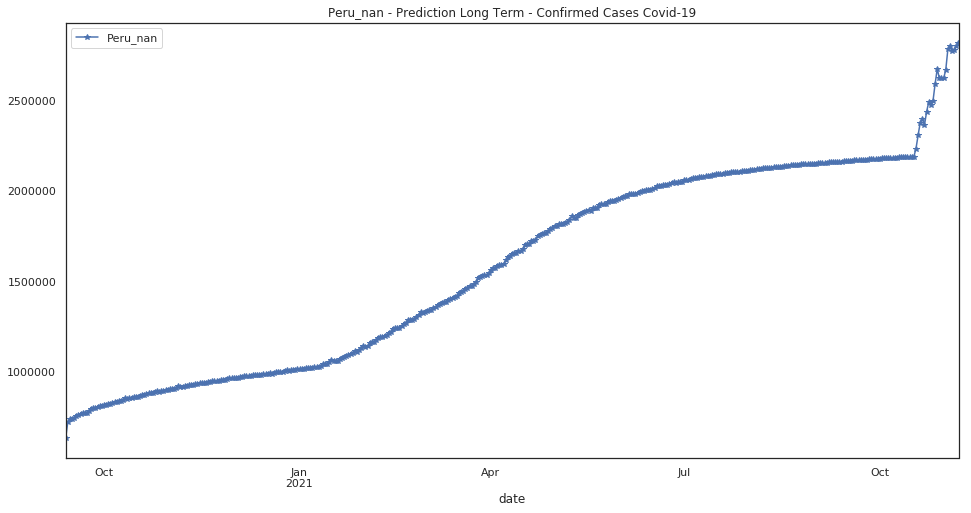

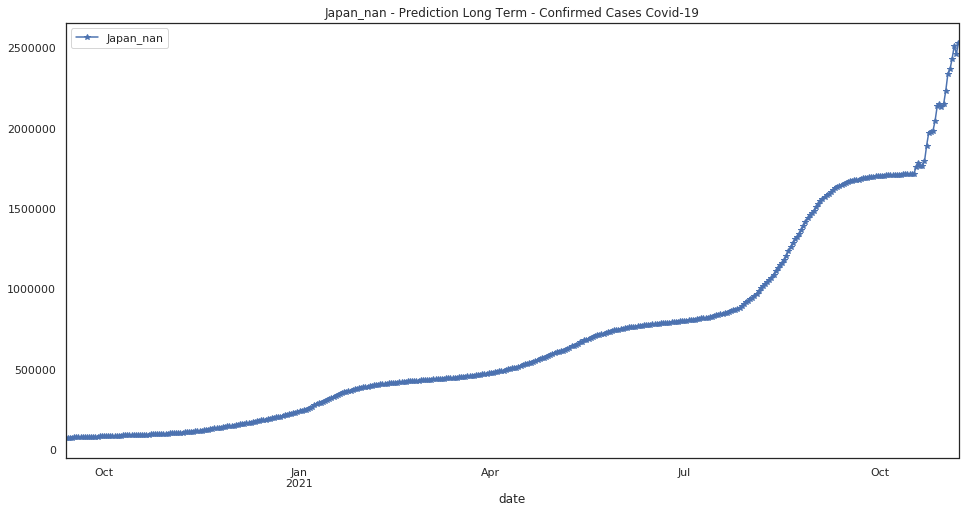

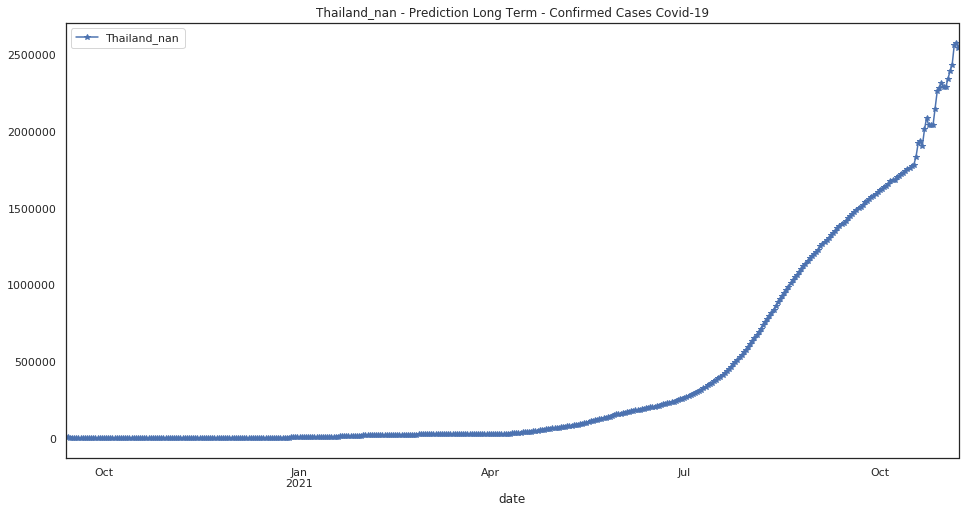

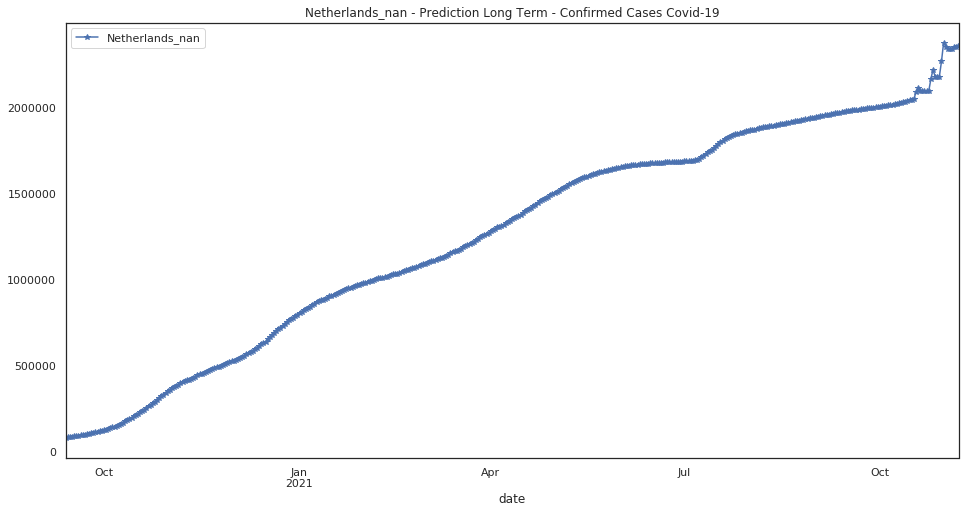

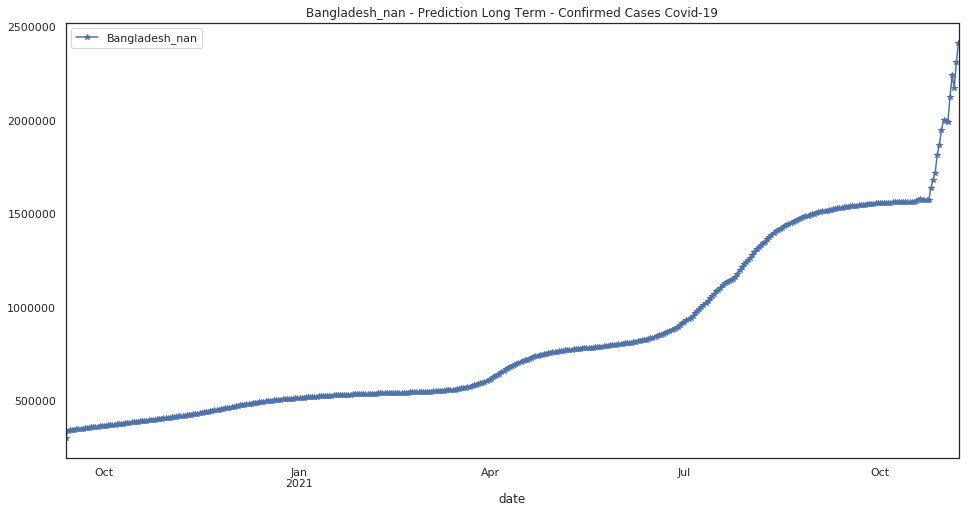

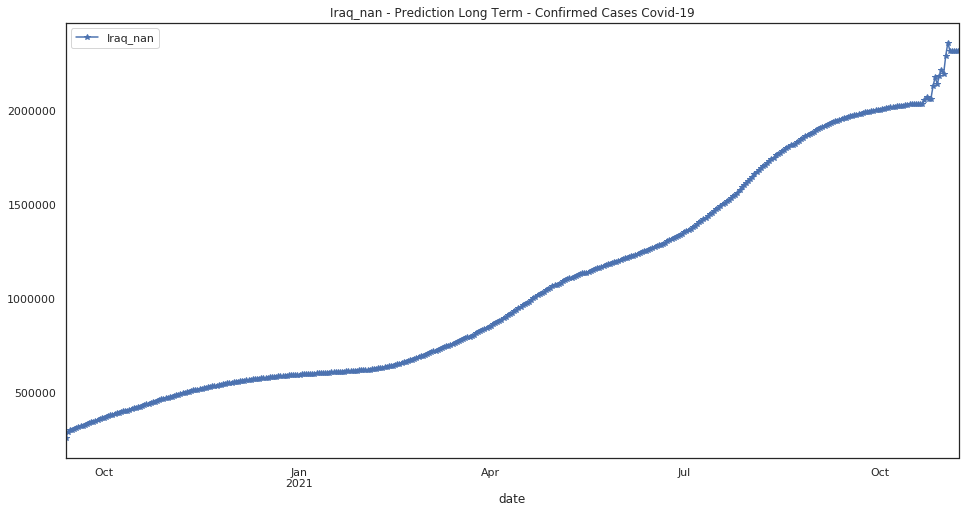

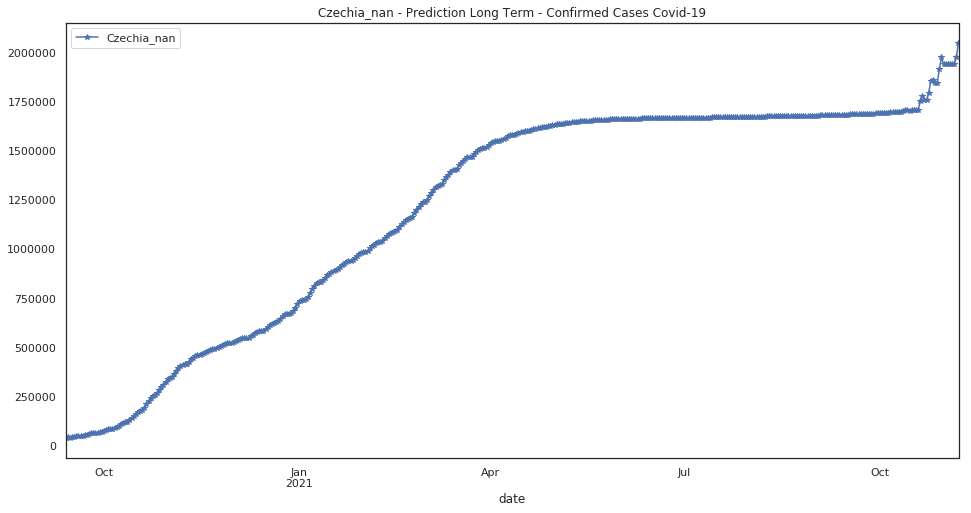

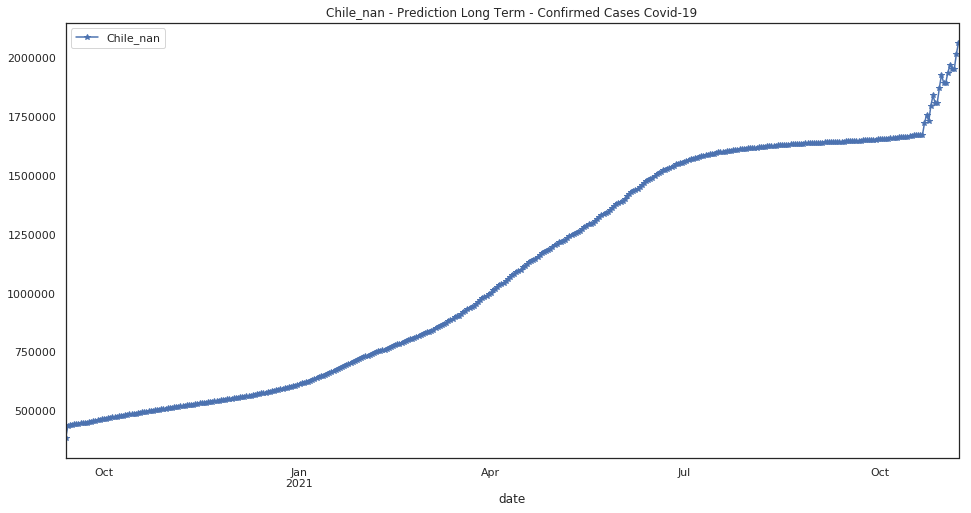

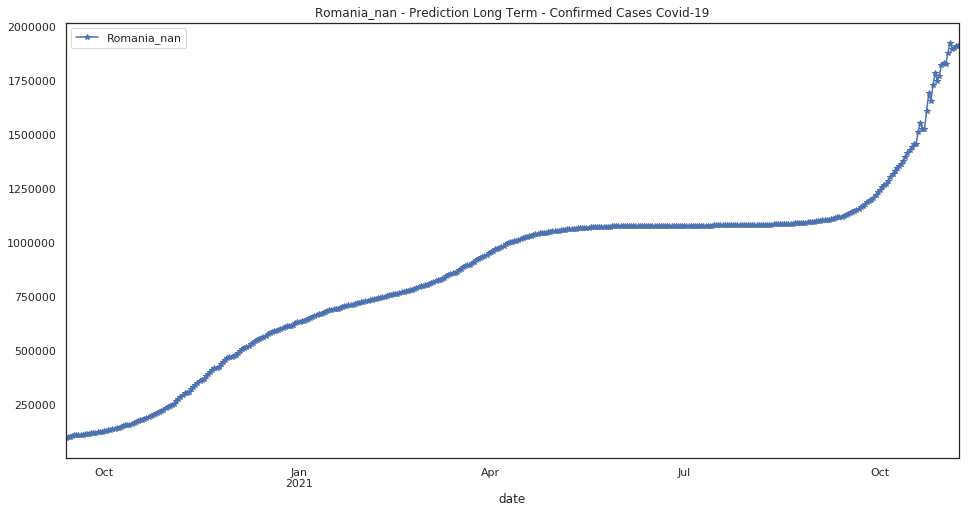

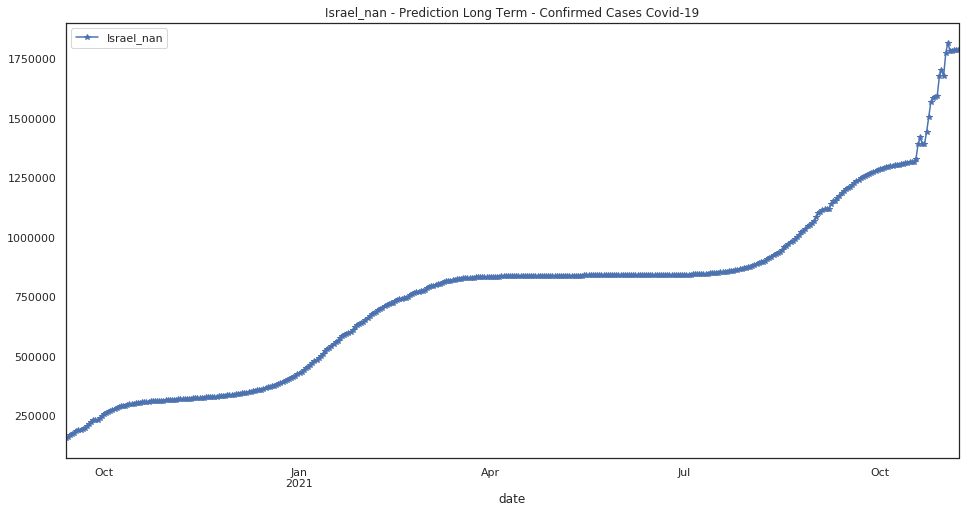

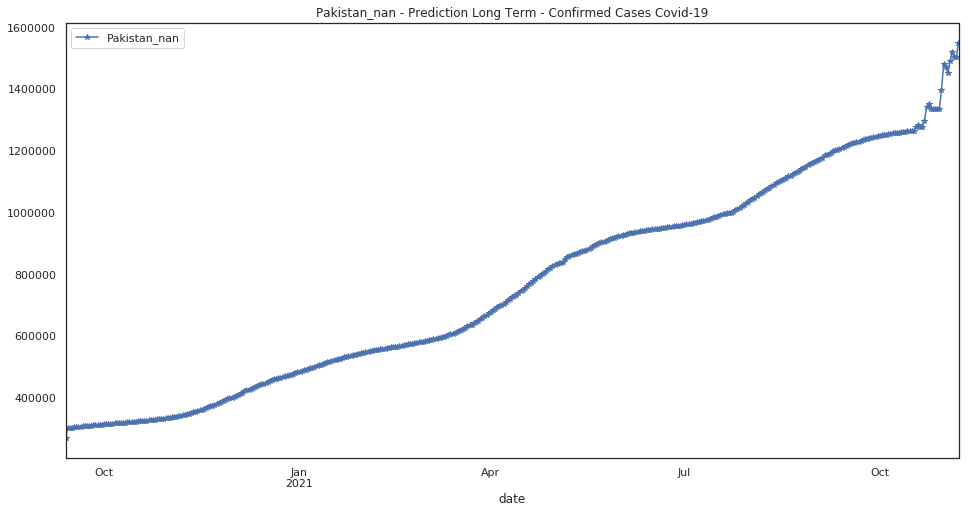

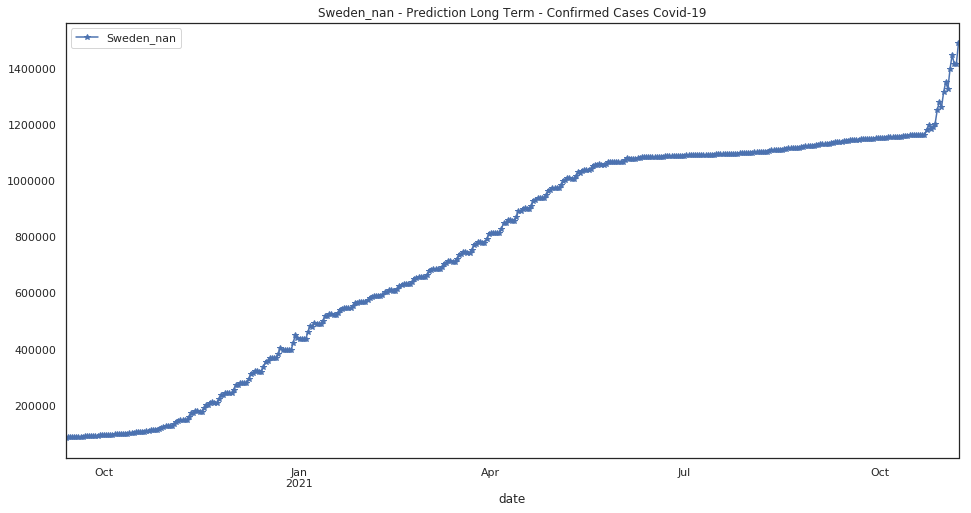

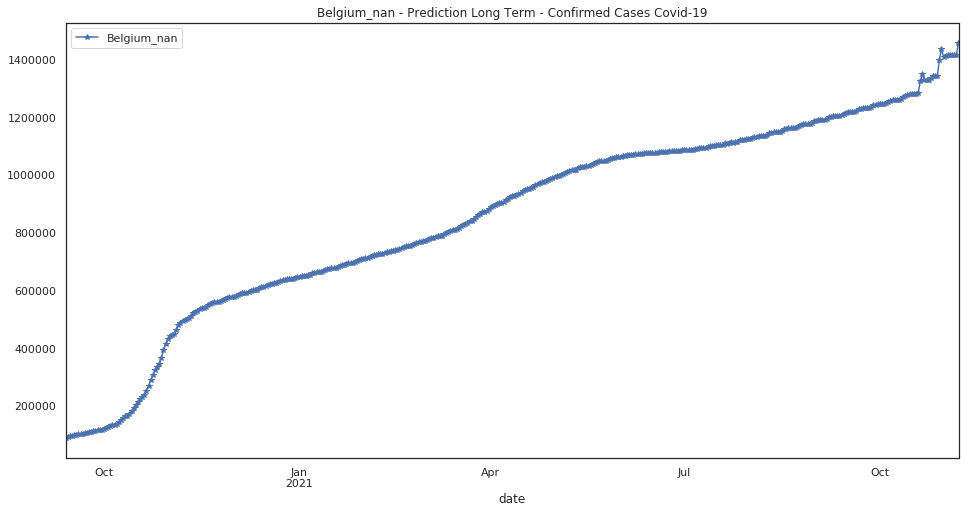

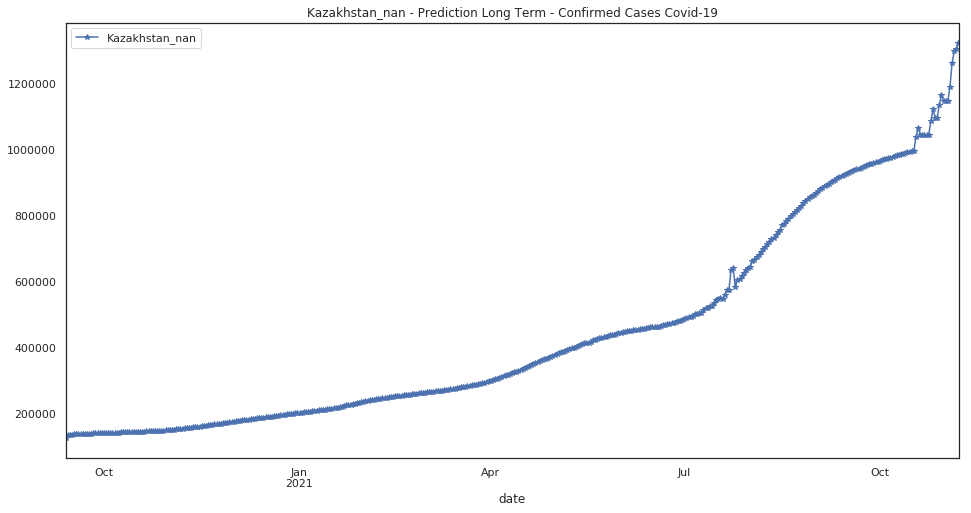

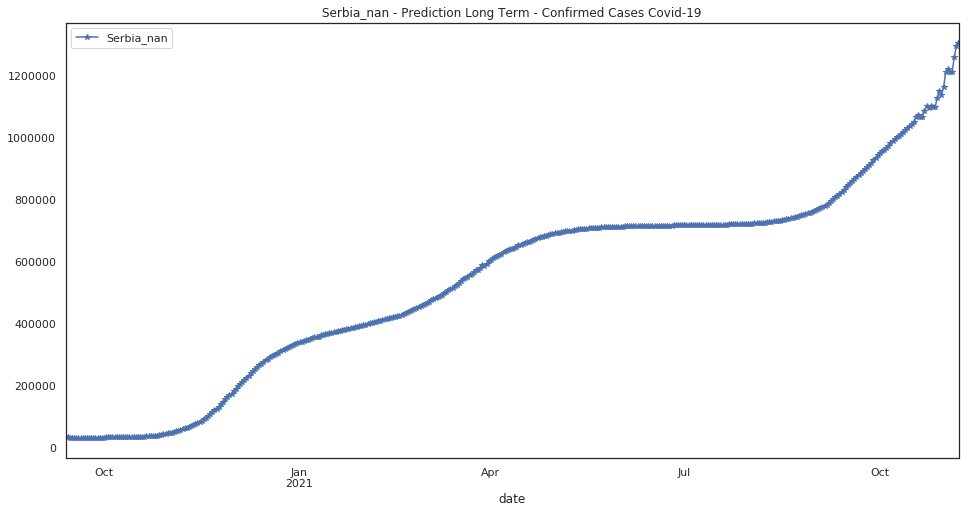

In [78]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

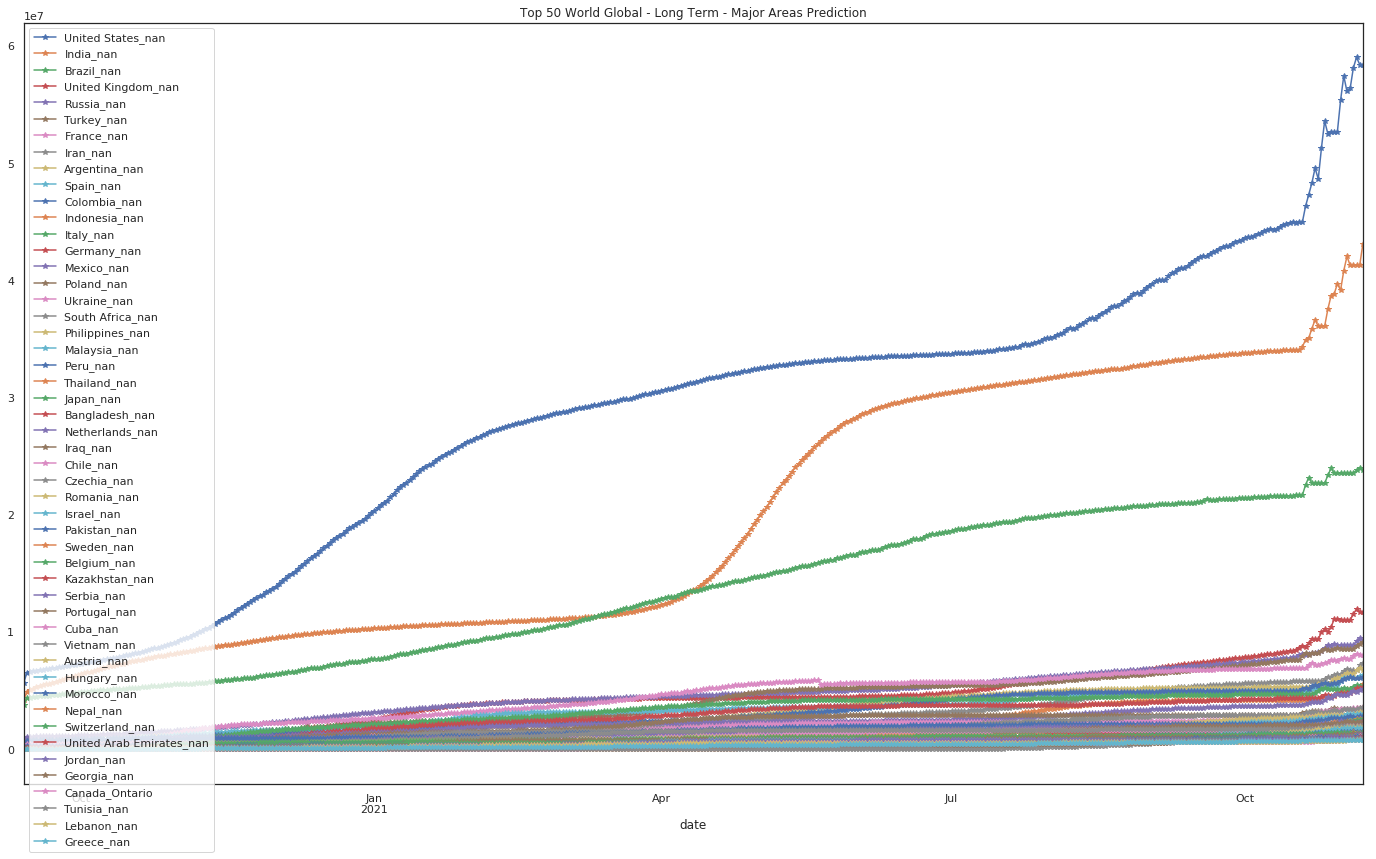

In [79]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

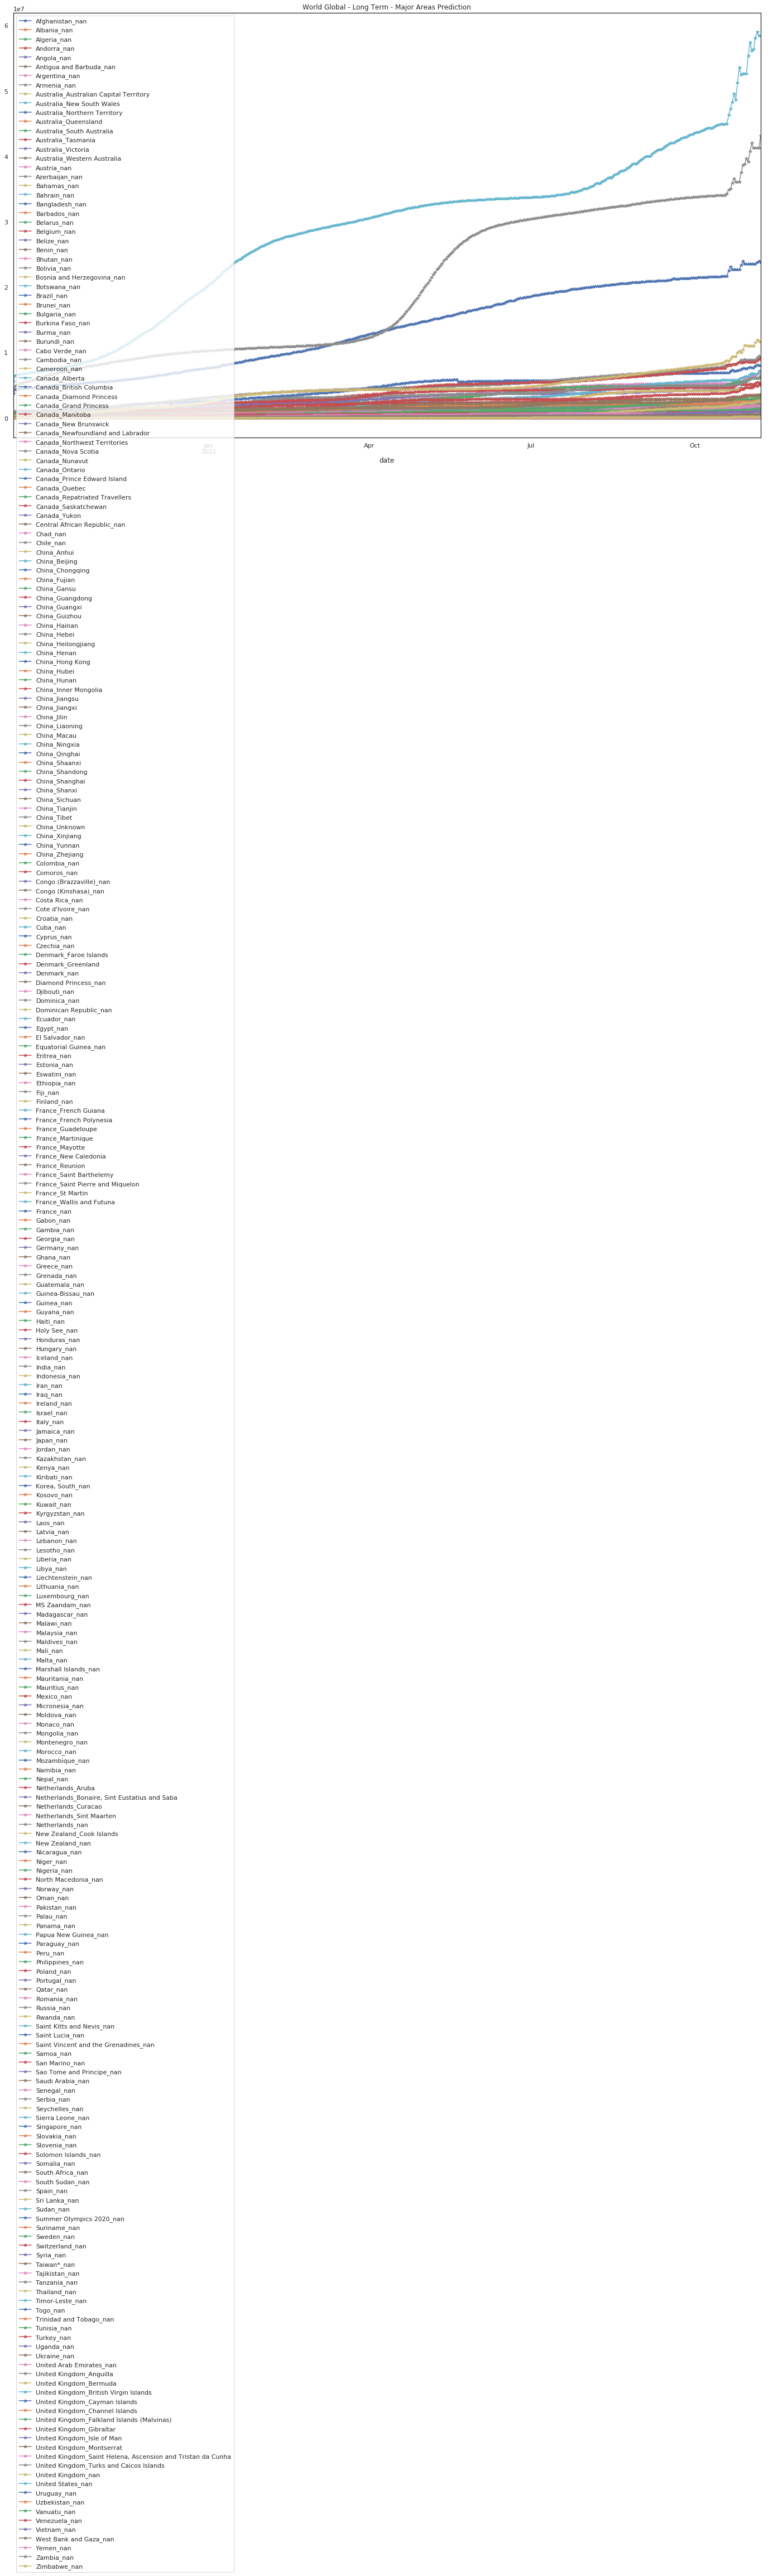

In [80]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [81]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [82]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-10-28          41138.0      20053.0      57104.0       4500.0   
2020-10-29          41241.0      20335.0      57421.0       4549.0   
2020-10-30          41366.0      20648.0      57734.0       4677.0   
2020-10-31          41443.0      20905.0      58032.0       4699.0   
2020-11-01          41513.0      21216.0      58343.0       4778.0   
2020-11-02          41596.0      21545.0      58659.0       4878.0   
2020-11-03          41713.0      21917.0      59037.0       4912.0   
2020-11-04          41830.0      22321.0      59600.0       5078.0   
2020-11-05          41908.0      22742.0      60275.0       5045.0   
2020-11-06          42024.0      23224.0      60936.0       5135.0   
2020-11-07          42084.0      23724.0      61512.0       5387.0   
2020-11-08          42116.0      24220.0      62135.0       5319.0   
2020-11-09          42238.0      24740.0      62791.0       5440.0   
2020-11-10          42390.0      25293.0      63497.0       5505.0   
2020-11-11          42561.0      25809.0      64326.0       5577.0   
2020-11-12          42720.0      26221.0      65183.0       5577.0   
2020-11-13          42892.0      26681.0      66060.0       5728.0   
2020-11-14          43077.0      27214.0      66904.0       5725.0   
2020-11-15          43146.0      27810.0      67738.0       5924.0   
2020-11-16          43296.0      28431.0      68635.0       5872.0   
2020-11-17          43501.0      29119.0      69628.0       5973.0   
2020-11-18          43703.0      29849.0      70687.0       6047.0   
2020-11-19          43950.0      30626.0      71721.0       6052.0   
2020-11-20          44301.0      31461.0      72803.0       6146.0   
2020-11-21          44583.0      32213.0      73853.0       6191.0   
2020-11-22          44614.0      32774.0      74889.0       6251.0   
2020-11-23          44743.0      33491.0      75920.0       6319.0   
2020-11-24          45046.0      34277.0      76994.0       6362.0   
2020-11-25          45354.0      34924.0      78079.0       6433.0   
2020-11-26          45588.0      35568.0      79114.0       6509.0   
...                     ...          ...          ...          ...   
2021-10-09         155558.0     174671.0     204576.0      15291.0   
2021-10-10         155593.0     175030.0     204680.0      15291.0   
2021-10-11         155634.0     175175.0     204783.0      15291.0   
2021-10-12         155690.0     175551.0     204876.0      15307.0   
2021-10-13         155733.0     176219.0     204984.0      15307.0   
2021-10-14         155773.0     176732.0     205098.0      15314.0   
2021-10-15         155798.0     177191.0     205198.0      15326.0   
2021-10-16         155820.0     177594.0     205291.0      15338.0   
2021-10-17         155867.0     178022.0     205375.0      15338.0   
2021-10-18         155859.0     178073.0     211871.0      15338.0   
2021-10-19         155850.0     183940.0     216087.0      15338.0   
2021-10-20         162347.0     187889.0     216664.0      15338.0   
2021-10-21         169928.0     184991.0     226441.0      15338.0   
2021-10-22         168817.0     187691.0     228694.0      15564.0   
2021-10-23         173937.0     190268.0     225676.0      15630.0   
2021-10-24         185260.0     192431.0     225676.0      15872.0   
2021-10-25         186223.0     200800.0     231685.0      16458.0   
2021-10-26         186807.0     203574.0     237067.0      16588.0   
2021-10-27         193880.0     200941.0     246182.0      17405.0   
2021-10-28         203129.0     200941.0     263742.0      17562.0   
2021-10-29         216148.0     201595.0     263092.0      17562.0   
2021-10-30         217894.0     202961.0     262935.0      17562.0   
2021-10-31         224875.0     204827.0     264835.0      17956.0   
2021-11-01         242869.0     207092.0     264528.0      18938.0   
2021-11-02

In [83]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [84]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [85]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [86]:
heatmap_m[:]

region        Lat        Long  \
0                                      Afghanistan_nan  33.939110   67.709953   
1                                          Albania_nan  41.153300   20.168300   
2                                          Algeria_nan  28.033900    1.659600   
3                                          Andorra_nan  42.506300    1.521800   
4                                           Angola_nan -11.202700   17.873900   
5                              Antigua and Barbuda_nan  17.060800  -61.796400   
6                                        Argentina_nan -38.416100  -63.616700   
7                                          Armenia_nan  40.069100   45.038200   
8               Australia_Australian Capital Territory -35.473500  149.012400   
9                            Australia_New South Wales -33.868800  151.209300   
10                        Australia_Northern Territory -12.463400  130.845600   
11                                Australia_Queensland -27.469800  153.025100   
12                           Australia_South Australia -34.928500  138.600700   
13                                  Australia_Tasmania -42.882100  147.327200   
14                                  Australia_Victoria -37.813600  144.963100   
15                         Australia_Western Australia -31.950500  115.860500   
16                                         Austria_nan  47.516200   14.550100   
17                                      Azerbaijan_nan  40.143100   47.576900   
18                                         Bahamas_nan  25.025885  -78.035889   
19                                         Bahrain_nan  26.027500   50.550000   
20                                      Bangladesh_nan  23.685000   90.356300   
21                                        Barbados_nan  13.193900  -59.543200   
22                                         Belarus_nan  53.709800   27.953400   
23                                         Belgium_nan  50.833300    4.469936   
24                                          Belize_nan  17.189900  -88.497600   
25                                           Benin_nan   9.307700    2.315800   
26                                          Bhutan_nan  27.514200   90.433600   
27                                         Bolivia_nan -16.290200  -63.588700   
28                          Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                        Botswana_nan -22.328500   24.684900   
..                                                 ...        ...         ...   
255                                    Timor-Leste_nan  -8.874217  125.727539   
256                                           Togo_nan   8.619500    0.824800   
257                            Trinidad and Tobago_nan  10.691800  -61.222500   
258                                        Tunisia_nan  33.886917    9.537499   
259                                         Turkey_nan  38.963700   35.243300   
260                                  United States_nan  40.000000 -100.000000   
261                                         Uganda_nan   1.373333   32.290275   
262                                        Ukraine_nan  48.379400   31.165600   
263                           United Arab Emirates_nan  23.424076   53.847818   
264                            United Kingdom_Anguilla  18.220600  -63.068600   
265                             United Kingdom_Bermuda  32.307800  -64.750500   
266              United Kingdom_British Virgin Islands  18.420700  -64.640000   
267                      United Kingdom_Cayman Islands  19.313300  -81.254600   
268                     United Kingdom_Channel Islands  49.372300   -2.364400   
269         United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
270                           United Kingdom_Gibraltar  36.140800   -5.353600   
271                         United Kingdom_Isle of Man  54.236100   -4.548100   
272                          United Kingdom_Montserrat  16.742498  -62.187366  

In [87]:
# Fill empty lat,long with 0
heatmap_m['Lat']=heatmap_m['Lat'].fillna(0)
heatmap_m['Long']=heatmap_m['Long'].fillna(0)
#
heatmap_m_fn="heatmap_m_"+str(num_days_R_prediction)+".csv"
heatmap_m.to_csv(r'data/'+heatmap_m_fn, index = False, header=True)

In [88]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
backday=num_BackTrack_Days
ndayarray=-1-backday-num_days_R_prediction
n2dayarray=-1-backday-(num_days_R_prediction*2)

for lat,lng,num,totpred,lastday7DayAvg,today7DayAvg in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]], \
                                                           (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg, \
                                                           (heatmap_m[heatmap_m.columns[ndayarray]]-heatmap_m[heatmap_m.columns[n2dayarray]])/ndaysavg):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' Current7DayAVG='+str(round(today7DayAvg))+' Predicted7DayAVG='+str(round(lastday7DayAvg))+' ConfTotPred='+str(round(totpred))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [89]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      16               Austria_nan  47.516200   14.550100   
2      20            Bangladesh_nan  23.685000   90.356300   
3      23               Belgium_nan  50.833300    4.469936   
4      30                Brazil_nan -14.235000  -51.925300   
5      51            Canada_Ontario  51.253800  -85.323200   
6      59                 Chile_nan -35.675100  -71.543000   
7      94              Colombia_nan   4.570900  -74.297300   
8     101                  Cuba_nan  21.521757  -77.781167   
9     103               Czechia_nan  49.817500   15.473000   
10    132                France_nan  46.227600    2.213700   
11    135               Georgia_nan  42.315400   43.356900   
12    136               Georgia_nan  42.315400   43.356900   
13    137               Germany_nan  51.165691   10.451526   
14    139                Greece_nan  39.074200   21.824300   
15    149               Hungary_nan  47.162500   19.503300   
16    151                 India_nan  20.593684   78.962880   
17    152             Indonesia_nan  -0.789300  113.921300   
18    153                  Iran_nan  32.427908   53.688046   
19    154                  Iraq_nan  33.223191   43.679291   
20    156                Israel_nan  31.046051   34.851612   
21    157                Israel_nan  31.046051   34.851612   
22    158                 Italy_nan  41.871940   12.567380   
23    160                 Japan_nan  36.204824  138.252924   
24    161                Jordan_nan  31.240000   36.510000   
25    162            Kazakhstan_nan  48.019600   66.923700   
26    171               Lebanon_nan  33.854700   35.862300   
27    172               Lebanon_nan  33.854700   35.862300   
28    182              Malaysia_nan   4.210484  101.975766   
29    189                Mexico_nan  23.634500 -102.552800   
30    195               Morocco_nan  31.791700   -7.092600   
31    198                 Nepal_nan  28.166700   84.250000   
32    203           Netherlands_nan  52.132600    5.291300   
33    212              Pakistan_nan  30.375300   69.345100   
34    217                  Peru_nan  -9.190000  -75.015200   
35    218           Philippines_nan  12.879721  121.774017   
36    219                Poland_nan  51.919400   19.145100   
37    220              Portugal_nan  39.399900   -8.224500   
38    222               Romania_nan  45.943200   24.966800   
39    223                Russia_nan  61.524010  105.318756   
40    233                Serbia_nan  44.016500   21.005900   
41    241          South Africa_nan -30.559500   22.937500   
42    243                 Spain_nan  40.463667   -3.749220   
43    248                Sweden_nan  60.128161   18.643501   
44    249           Switzerland_nan  46.818200    8.227500   
45    254              Thailand_nan  15.870032  100.992541   
46    258               Tunisia_nan  33.886917    9.537499   
47    259                Turkey_nan  38.963700   35.243300   
48    260         United States_nan  40.000000 -100.000000   
49    262               Ukraine_nan  48.379400   31.165600   
50    263  United Arab Emirates_nan  23.424076   53.847818   
51    275        United Kingdom_nan  55.378100   -3.436000   
52    280               Vietnam_nan  14.058324  108.277199   

    2020-09-13 00:00:00  2020-09-14 00:00:00  2020-09-15 00:00:00  \
0              488775.0             555537.0             579671.0   
1               37176.0              37506.0              33541.0   
2              300298.0             337520.0             340846.0   
3               89302.0              93455.0              94306.0   
4             3752211.0            4330455.0            4383763.0   
5               48696.0              49060.0              46905.0   
6              384352.0             434748.0             437727.0   
7              627771.0             716319.0             729537.0   
8               12559.0           

In [90]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
backday=num_BackTrack_Days
ndayarray=-1-backday-num_days_R_prediction
n2dayarray=-1-backday-(num_days_R_prediction*2)

for lat2,lng2,num2,totpred2,lastday7DayAvg2,today7DayAvg2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], \
                                                                (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg, \
                                                                (heatmap_m2[heatmap_m2.columns[ndayarray]]-heatmap_m2[heatmap_m2.columns[n2dayarray]])/ndaysavg):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' Current7DayAvg='+str(round(today7DayAvg2))+' Predicted7DayAvg='+str(round(lastday7DayAvg2))+' ConfTotPred='+str(round(totpred2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [91]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [92]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [93]:
exit()